<a href="https://colab.research.google.com/github/sylwiazieba/bank-customer-segmentation/blob/main/MIT_Capstone_Project_Marketing_Campaign_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Marketing Campaign Analysis**

## **Problem Definition**

### **The Context:**

 - Why is this problem important to solve?

 This problem is important to solve so that the company gets to know their customer better, not only growing potential sales and revenue but also improving customer satisfaction. Solving this problem could also open up new revenue streams for the company as they learn more about the customer's needs and wants in terms of products. They will also be able to offer more discounts for the populations (e.g., lower income groups) that need it.

### **The objective:**

 - What is the intended goal?

 The intended goal is to create Customer Segmentation for a targeted Marketing campaign and sales strategy. Segmented campaigns see a better response rate and thereby higher revenue growth and sales profits.

### **The key questions:**

- What are the key questions that need to be answered?

The key questions to answer are whether the categorical data (e.g., education, marital status, age) have any impact on consumer spending habits. We can suspect that those with a higher income might be spending more money, but if so - what are they spending their money on? Is there a preferred way to shop across the customer segments - catalog, online, or in store? Who uses discounts? What is the success rate of the current offer campaigns? Are there any complaints from customers that could indicate dissatisfaction?`


### **The problem formulation**:

- What is it that we are trying to solve using data science?

We are trying to use clustering methods to figure out the various customer clusters to segment the customers for the appropriate marketing campaigns.

------------------------------
## **Data Dictionary**
------------------------------

The dataset contains the following features:

1. ID: Unique ID of each customer
2. Year_Birth: Customer’s year of birth
3. Education: Customer's level of education
4. Marital_Status: Customer's marital status
5. Kidhome: Number of small children in customer's household
6. Teenhome: Number of teenagers in customer's household
7. Income: Customer's yearly household income in USD
8. Recency: Number of days since the last purchase
9. Dt_Customer: Date of customer's enrollment with the company
10. MntFishProducts: The amount spent on fish products in the last 2 years
11. MntMeatProducts: The amount spent on meat products in the last 2 years
12. MntFruits: The amount spent on fruits products in the last 2 years
13. MntSweetProducts: Amount spent on sweet products in the last 2 years
14. MntWines: The amount spent on wine products in the last 2 years
15. MntGoldProds: The amount spent on gold products in the last 2 years
16. NumDealsPurchases: Number of purchases made with discount
17. NumCatalogPurchases: Number of purchases made using a catalog (buying goods to be shipped through the mail)
18. NumStorePurchases: Number of purchases made directly in stores
19. NumWebPurchases: Number of purchases made through the company's website
20. NumWebVisitsMonth: Number of visits to the company's website in the last month
21. AcceptedCmp1: 1 if customer accepted the offer in the first campaign, 0 otherwise
22. AcceptedCmp2: 1 if customer accepted the offer in the second campaign, 0 otherwise
23. AcceptedCmp3: 1 if customer accepted the offer in the third campaign, 0 otherwise
24. AcceptedCmp4: 1 if customer accepted the offer in the fourth campaign, 0 otherwise
25. AcceptedCmp5: 1 if customer accepted the offer in the fifth campaign, 0 otherwise
26. Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
27. Complain: 1 If the customer complained in the last 2 years, 0 otherwise

**Note:** You can assume that the data is collected in the year 2016.

## **Import the necessary libraries and load the data**

In [ ]:
!pip install scikit-learn-extra

In [ ]:
# Libraries for reading and manipulating data
import numpy as np
import pandas as pd

# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

# To compute distances
from scipy.spatial.distance import cdist

# To perform K-means clustering and compute Silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# To visualize the elbow curve and Silhouette scores
from yellowbrick.cluster import SilhouetteVisualizer

# Importing PCA
from sklearn.decomposition import PCA

# To encode the variable
from sklearn.preprocessing import LabelEncoder

# Importing TSNE
from sklearn.manifold import TSNE

# To perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# To compute distances
from scipy.spatial.distance import pdist

# To import K-Medoids
from sklearn_extra.cluster import KMedoids

# To import Gaussian Mixture
from sklearn.mixture import GaussianMixture

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

In [ ]:
# To mount drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Data Overview**

- Reading the dataset
- Understanding the shape of the dataset
- Checking the data types
- Checking for missing values
- Checking for duplicated values
- Drop the column which has no null values

***Loading the data***

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/MIT Capstone Marketing Campaign/marketing_campaign.csv')

In [ ]:
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumCatalogPurchases  NumStorePurchases  \
0  04-09-2012       58       635  ...                   10                  4   
1  08-03-2014       38        11  ...                    1                  2   
2  21-08-2013       26       426  ...                    2                 10   
3  10-02-2014       26        11  ...                    0                  4   
4  19-01-2014       94       173  ...                    3                  6   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  7             0             0             0             0   
1                  5             0             0             0             0   
2                  4             0             0             0             0   
3                  6             0             0             0             0   
4                  5             0             0             0             0   

   AcceptedCmp2  Complain  Response  
0             0         0         1  
1             0         0         0  
2             0         0         0  
3             0         0         0  
4             0         0         0  

[5 rows x 27 columns]

***Determining shape and data types***

In [ ]:
df.shape

(2240, 27)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
# Checking for unique values
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Response                  2
dtype: int64

**Observations and Insights from Data Overview:**
*   Most of the variables are of integer type.
*   Dt_Customer is an object but contains a date and generally would be converted to a datetime type.
*   There are two object data types including Education and Marital_Status
*   There are 2,240 rows with no nulls and 27 columns.
*   There are also 2,240 values for ID meaning that it is a unique variable and will not be additive to our analysis.
*   The last 7 rows (e.g., AcceptedCmp, Complain, Response) have only 2 possible values as expected - a 1 for positive if the customer accepted an offer and a 0 otherwise.

*Dropping ID column as it is a unique variable with no nulls and thereby no duplicates and will not be additive to our analysis.*

In [ ]:
df.drop(columns = ['ID'], inplace = True)

## **Exploratory Data Analysis (EDA)**


- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions:**

1. What is the summary statistics of the data? Explore summary statistics for numerical variables and the categorical variables
2. Find out number of unique observations in each category of categorical columns? Write your findings/observations/insights
3. Are all categories different from each other or can we combine some categories? Is 2n Cycle different from Master?
4. There are 8 categories in Marital_Status with some categories having very low count of less than 5. Can we combine these categories with other categories?

In [ ]:
# Explore summary statistics
df.describe().T

count          mean           std     min       25%  \
Year_Birth           2240.0   1968.805804     11.984069  1893.0   1959.00   
Income               2216.0  52247.251354  25173.076661  1730.0  35303.00   
Kidhome              2240.0      0.444196      0.538398     0.0      0.00   
Teenhome             2240.0      0.506250      0.544538     0.0      0.00   
Recency              2240.0     49.109375     28.962453     0.0     24.00   
MntWines             2240.0    303.935714    336.597393     0.0     23.75   
MntFruits            2240.0     26.302232     39.773434     0.0      1.00   
MntMeatProducts      2240.0    166.950000    225.715373     0.0     16.00   
MntFishProducts      2240.0     37.525446     54.628979     0.0      3.00   
MntSweetProducts     2240.0     27.062946     41.280498     0.0      1.00   
MntGoldProds         2240.0     44.021875     52.167439     0.0      9.00   
NumDealsPurchases    2240.0      2.325000      1.932238     0.0      1.00   
NumWebPurchases      2240.0      4.084821      2.778714     0.0      2.00   
NumCatalogPurchases  2240.0      2.662054      2.923101     0.0      0.00   
NumStorePurchases    2240.0      5.790179      3.250958     0.0      3.00   
NumWebVisitsMonth    2240.0      5.316518      2.426645     0.0      3.00   
AcceptedCmp3         2240.0      0.072768      0.259813     0.0      0.00   
AcceptedCmp4         2240.0      0.074554      0.262728     0.0      0.00   
AcceptedCmp5         2240.0      0.072768      0.259813     0.0      0.00   
AcceptedCmp1         2240.0      0.064286      0.245316     0.0      0.00   
AcceptedCmp2         2240.0      0.012946      0.113069     0.0      0.00   
Complain             2240.0      0.009375      0.096391     0.0      0.00   
Response             2240.0      0.149107      0.356274     0.0      0.00   

                         50%       75%       max  
Year_Birth            1970.0   1977.00    1996.0  
Income               51381.5  68522.00  666666.0  
Kidhome                  0.0      1.00       2.0  
Teenhome                 0.0      1.00       2.0  
Recency                 49.0     74.00      99.0  
MntWines               173.5    504.25    1493.0  
MntFruits                8.0     33.00     199.0  
MntMeatProducts         67.0    232.00    1725.0  
MntFishProducts         12.0     50.00     259.0  
MntSweetProducts         8.0     33.00     263.0  
MntGoldProds            24.0     56.00     362.0  
NumDealsPurchases        2.0      3.00      15.0  
NumWebPurchases          4.0      6.00      27.0  
NumCatalogPurchases      2.0      4.00      28.0  
NumStorePurchases        5.0      8.00      13.0  
NumWebVisitsMonth        6.0      7.00      20.0  
AcceptedCmp3             0.0      0.00       1.0  
AcceptedCmp4             0.0      0.00       1.0  
AcceptedCmp5             0.0      0.00       1.0  
AcceptedCmp1             0.0      0.00       1.0  
AcceptedCmp2             0.0      0.00       1.0  
Complain                 0.0      0.00       1.0  
Response                 0.0      0.00       1.0

**Observations:**

*   Income levels have a large standard deviation, with customer's yearly household income ranging from 1,730 to 666,666 with the mean close to 50,000. There is a huge discrepancy between the 3rd quartile and the max indicating there will be outliers and skewness towards the right.
*   The amount spent of wine and meat products also has a broad range of values which exhibit a right skew.
*   Most customers have a birth year close to 1969, but the oldest was born in 1893 while the younger in 1996.
*   Most people seem to purchase things in store, followed by web and catalog purchases. But it doesn't look like a lot of people purchase using discounts.





In [ ]:
# Explore categorical variables
cols = ["Education", "Marital_Status", "Kidhome", "Teenhome", "Complain", "Response", "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5"]

In [ ]:
# Printing count of unique categorical values in each column
for column in cols:
    print(df[column].value_counts(normalize=True))
    print("*" * 50)

Graduation    0.503125
PhD           0.216964
Master        0.165179
2n Cycle      0.090625
Basic         0.024107
Name: Education, dtype: float64
**************************************************
Married     0.385714
Together    0.258929
Single      0.214286
Divorced    0.103571
Widow       0.034375
Alone       0.001339
Absurd      0.000893
YOLO        0.000893
Name: Marital_Status, dtype: float64
**************************************************
0    0.577232
1    0.401339
2    0.021429
Name: Kidhome, dtype: float64
**************************************************
0    0.516964
1    0.459821
2    0.023214
Name: Teenhome, dtype: float64
**************************************************
0    0.990625
1    0.009375
Name: Complain, dtype: float64
**************************************************
0    0.850893
1    0.149107
Name: Response, dtype: float64
**************************************************
0    0.935714
1    0.064286
Name: AcceptedCmp1, dtype: float64
****************

**Observations:**

*   The **"Education" variable has 5 categories with Graduation making up ~50% of the population. 2n Cycle is likely equivalent to a Master's degree and could be combined with the Master category.**
*   The **"Marital_Status" variable has 8 categories** and a few can likely be combined. Married is the largest population. **Single, Alone, Absurd, and YOLO can likely be combined into one category.** We could also take a different approach and eliminate Absurd altogether because it is an unclear response.
*   Most of the population don't have kids or teens at home, followed by those that only have 1 child. The max amount of kids or teens at home is 2.
*   The **response rate is only 15% and it looks like most customer's are not accepting any of 5 campaigns sent**.



In [ ]:
# Replacing the category "2n Cycle" with  "Master"
df["Education"].replace(to_replace="2n Cycle", value="Master", inplace=True)

# Replacing Alone, Absurd, YOLO and marking as Single
df["Marital_Status"].replace(to_replace=["Alone", "Absurd", "YOLO"], value="Single", inplace=True)

In [ ]:
# Sense check
df.describe(exclude = 'number').T

count unique         top  freq
Education       2240      4  Graduation  1127
Marital_Status  2240      5     Married   864
Dt_Customer     2240    663  31-08-2012    12

### **Univariate Analysis on Numerical and Categorical data**

Univariate analysis is used to explore each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables.

- Plot histogram and box plot for different numerical features and understand how the data looks like.
- Explore the categorical variables like Education, Kidhome, Teenhome, Complain.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. How does the distribution of Income variable vary across the dataset?
2. The histogram and the box plot are showing some extreme value on the right side of the distribution of the 'Income' feature. Can we consider them as outliers and remove or should we analyze these extreme values?
3. There are only a few rows with extreme values for the Income variable. Is that enough information to treat (or not to treat) them? At what percentile the upper whisker lies?


In [ ]:
def histogram_boxplot(feature, figsize=(15, 10), bins="auto"):
    f, (ax_box, ax_hist) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid
        sharex=True,  # The X-axis will be shared among all the subplots
        gridspec_kw={"height_ratios": (.25, .75)},
        figsize=figsize
    )

    # Creating the subplots
    # Boxplot will be created and the mean value of the column will be indicated using some symbol
    sns.boxplot(x=feature, ax=ax_box, showmeans=True, color='red')

    # For histogram
    sns.histplot(x=feature, kde=False, ax=ax_hist, bins=bins)
    ax_hist.axvline(np.mean(feature), color='g', linestyle='-')      # Add mean to the histogram
    ax_hist.axvline(np.median(feature), color='black', linestyle='--') # Add median to the histogram

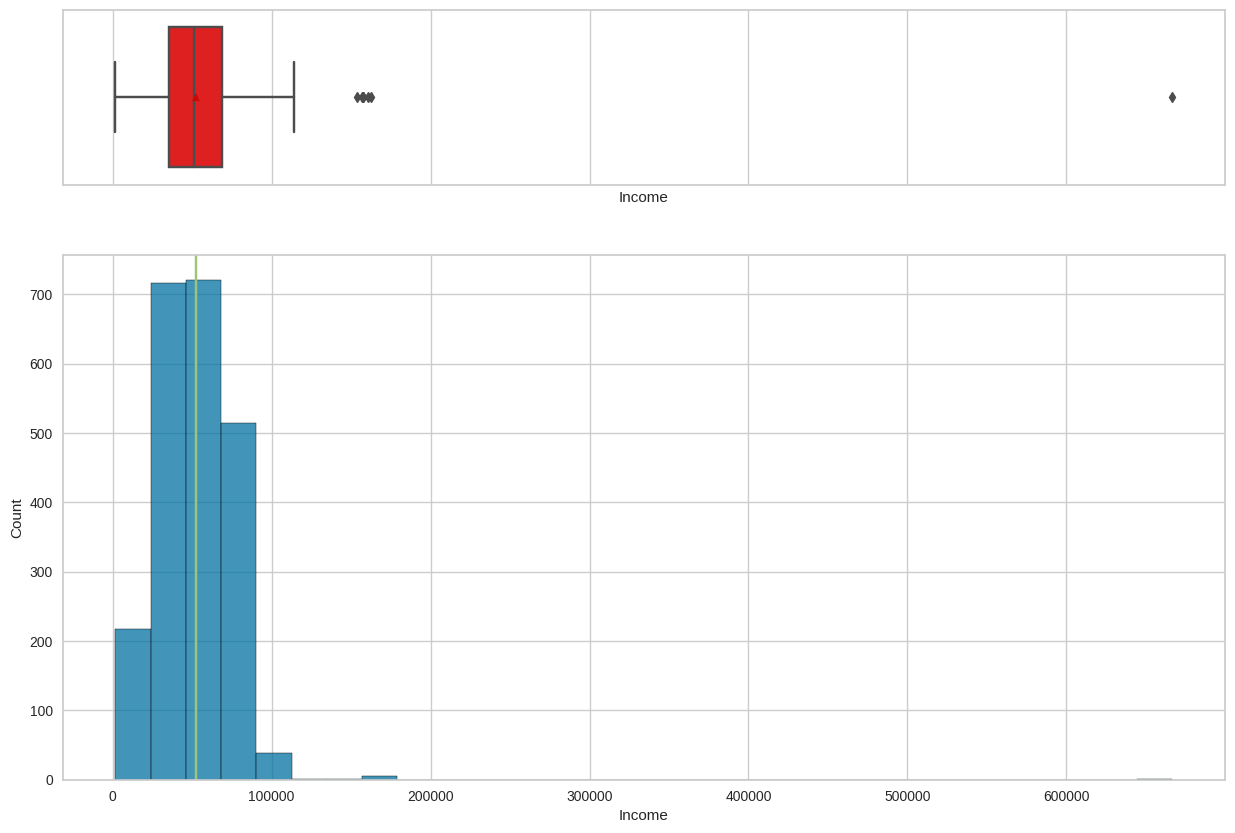

In [ ]:
# Exploring income numerical variable
histogram_boxplot(df.Income, bins = 30)

Observations:

*   The distribution of income is extremely right-skewed. **Most people make anywhere from the minimum ~1370 annually to 100,000 annually with the mean close to 50,000.** There are a number of outliers with one sole outlier making 666,666 annually.



**The customer making 666,666 looks like a huge outlier we can remove. Let's explore further.**

In [ ]:
# Calculating the upper whisker for the Income variable

Q1 = df.quantile(q=0.25)                          # Finding the first quartile

Q3 = df.quantile(q=0.75)                          # Finding the third quartile

IQR = Q3 - Q1                                       # Finding the Inter Quartile Range

upper_whisker = (Q3 + 1.5 * IQR)["Income"]       # Calculating the Upper Whisker for the Income variable

print(upper_whisker)                                # Printing Upper Whisker

118350.5


**The upper whisker is 118,350.5. Now let's check how many outliers fall above that upper whisker.**

In [ ]:
# Checking the 99.5% percentile value for the Income variable
df.quantile(q=0.995)["Income"]

102145.75000000003

In [ ]:
df[df.Income > upper_whisker]

Year_Birth   Education Marital_Status    Income  Kidhome  Teenhome  \
164         1973         PhD        Married  157243.0        0         1   
617         1976         PhD       Together  162397.0        1         1   
655         1975  Graduation       Divorced  153924.0        0         0   
687         1982         PhD        Married  160803.0        0         0   
1300        1971      Master       Together  157733.0        1         0   
1653        1977  Graduation       Together  157146.0        0         0   
2132        1949         PhD        Married  156924.0        0         0   
2233        1977  Graduation       Together  666666.0        1         0   

     Dt_Customer  Recency  MntWines  MntFruits  ...  NumCatalogPurchases  \
164   01-03-2014       98        20          2  ...                   22   
617   03-06-2013       31        85          1  ...                    0   
655   07-02-2014       81         1          1  ...                    0   
687   04-08-2012       21        55         16  ...                   28   
1300  04-06-2013       37        39          1  ...                    0   
1653  29-04-2013       13         1          0  ...                   28   
2132  29-08-2013       85         2          1  ...                    0   
2233  02-06-2013       23         9         14  ...                    1   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
164                   0                  0             0             0   
617                   1                  1             0             0   
655                   0                  0             0             0   
687                   1                  0             0             0   
1300                  1                  1             0             0   
1653                  0                  1             0             0   
2132                  0                  0             0             0   
2233                  3                  6             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
164              0             0             0         0         0  
617              0             0             0         0         0  
655              0             0             0         0         0  
687              0             0             0         0         0  
1300             0             0             0         0         0  
1653             0             0             0         0         0  
2132             0             0             0         0         0  
2233             0             0             0         0         0  

[8 rows x 26 columns]

Observations:

*   There are 8 outliers above the upper whisker. It looks like a customer born in 1977 that has a partner reported the highest income, 666,666. **We can go ahead and remove that one customer from our analysis as it could be an error.**



In [ ]:
# Dropping observations identified as outliers
df.drop(index=[2233], inplace=True)

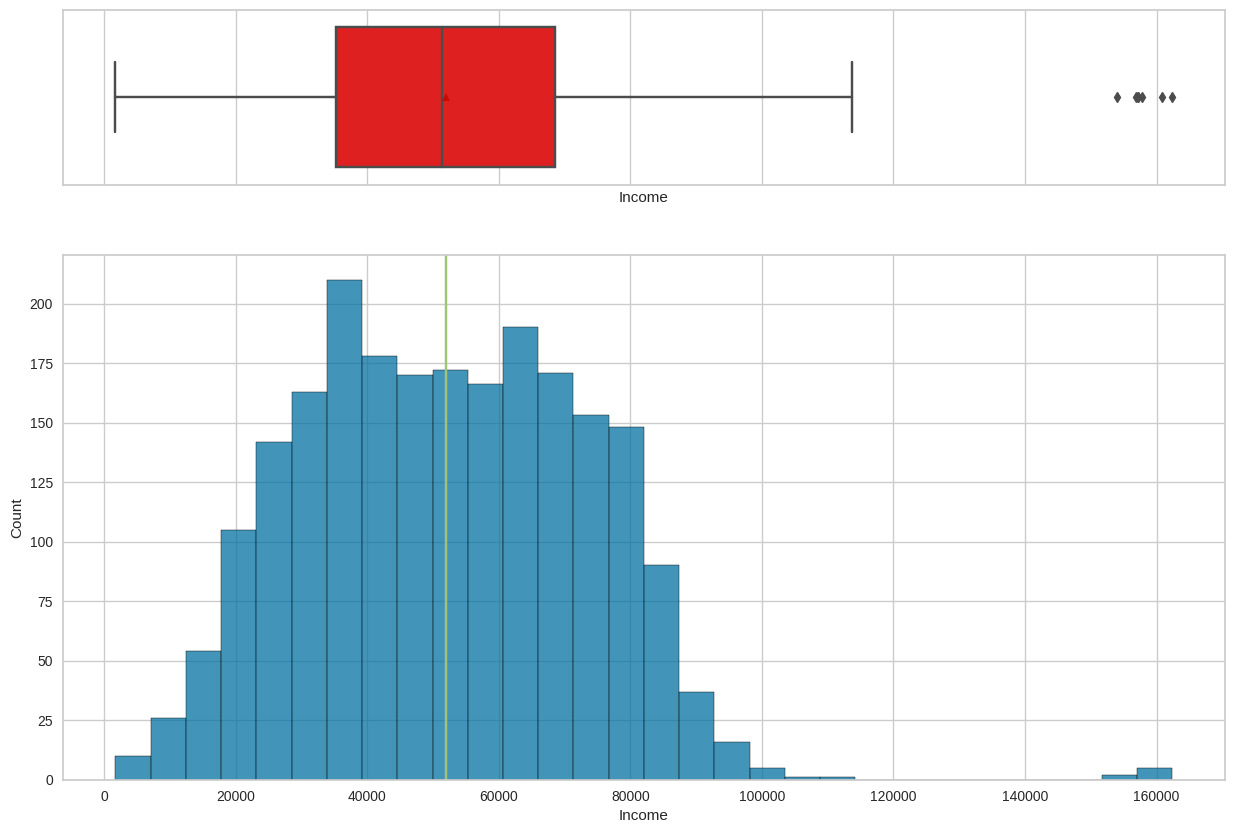

In [ ]:
# Exploring income numerical variable after dropping outliers
histogram_boxplot(df.Income, bins = 30)

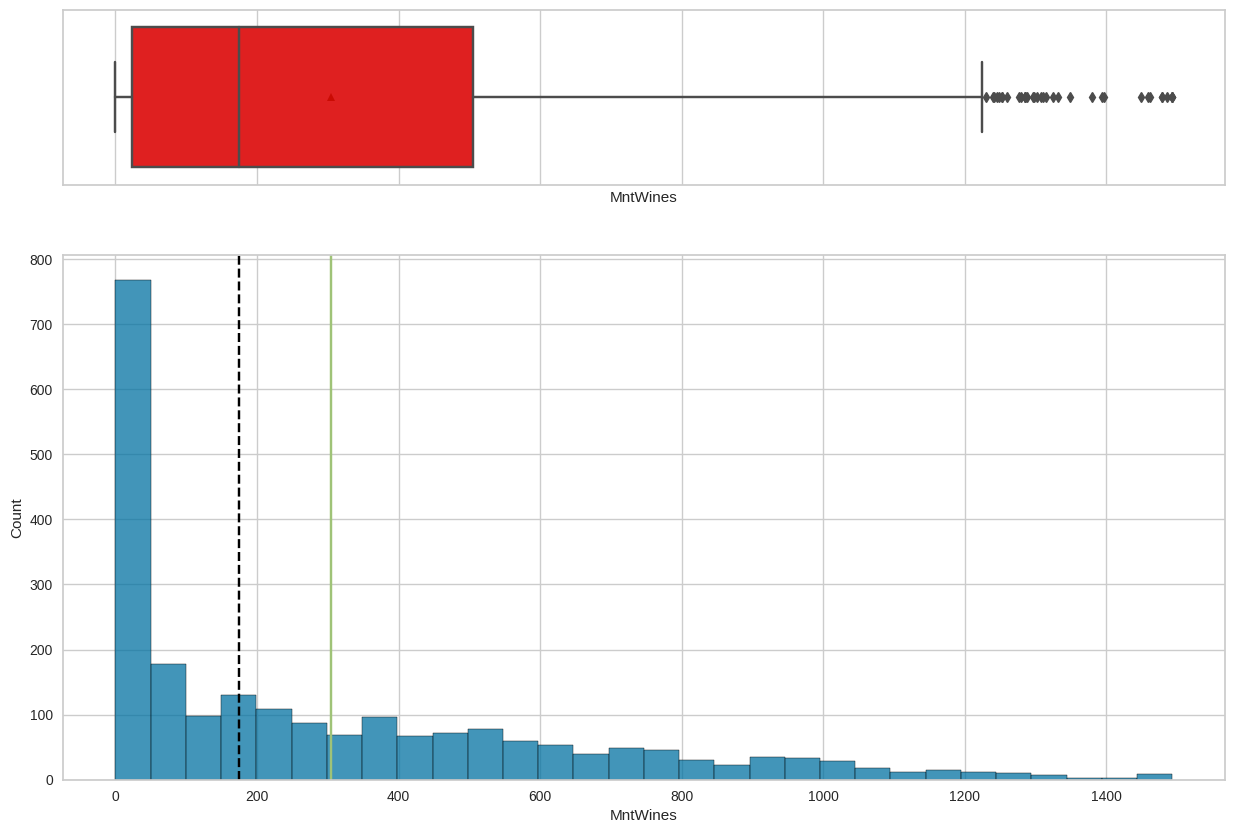

In [ ]:
# Exploring amount spent on wines numerical variable
histogram_boxplot(df.MntWines, bins = 30)

Observations:

*   The wines variable is **right-skewed** with a lot of outliers.
*   **On average, people spend around 300 dollars every 2 years on wine. Out of all the other grocery products, people spend the most on wine.**





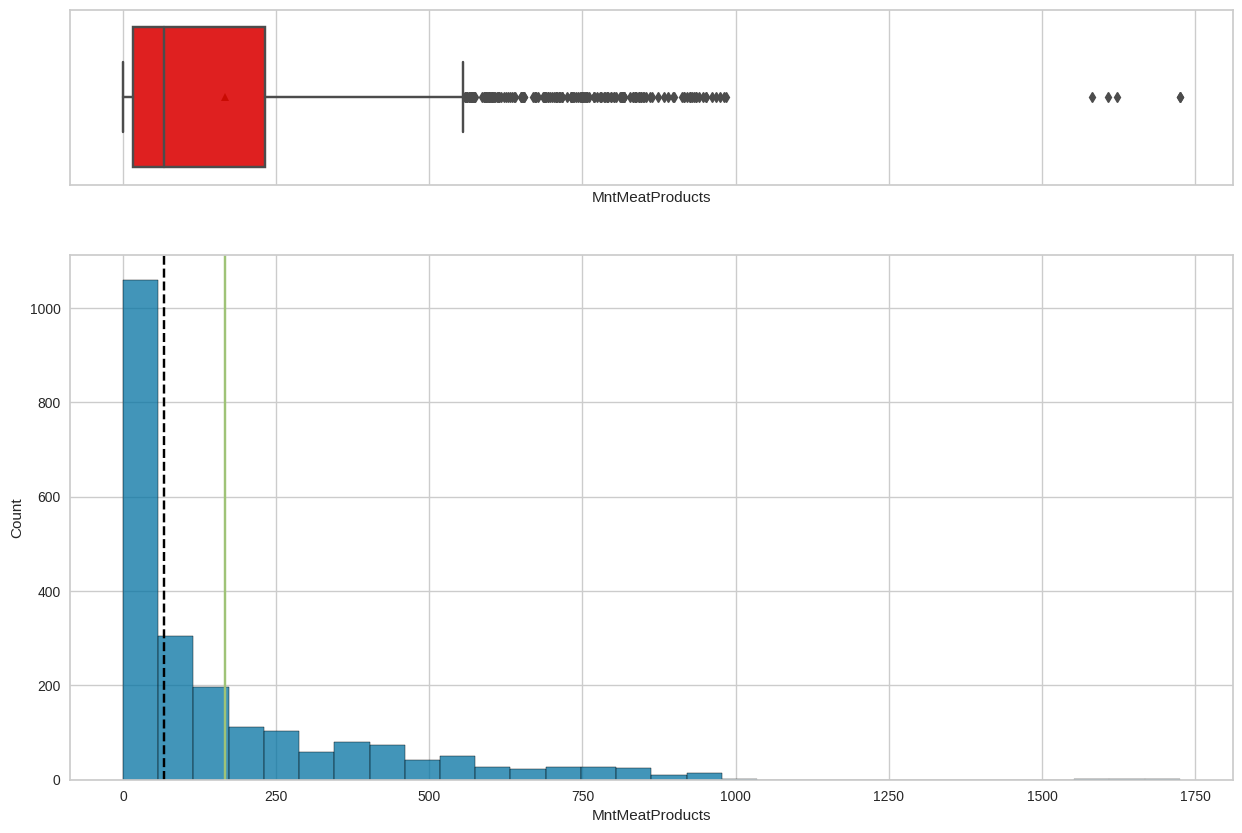

In [ ]:
# Exploring amount spent on wines numerical variable
histogram_boxplot(df.MntMeatProducts, bins = 30)

Observations:

*   THe amount spent on meat products in the last two years is also right-skewed.
*   Customers spend on average 166 dollars on meat products in the last two years with some spending closer to 1,000.



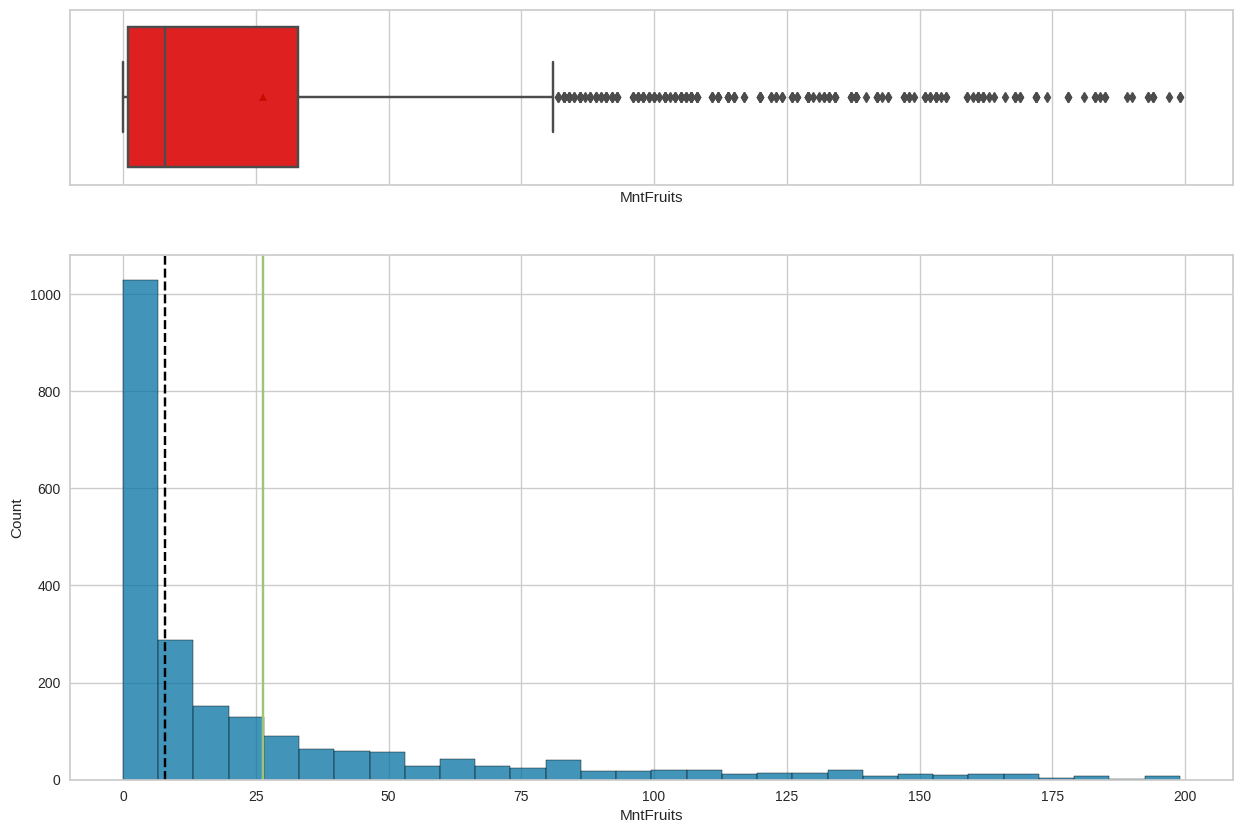

In [ ]:
# Exploring amount spent on wines numerical variable
histogram_boxplot(df.MntFruits, bins = 30)

Observations:

*   The amount spent on fruit is largely right-skewed.
*   Customers spend on average around 25 dollars on fruits in the last 2 years but there are many more healthy customers that spend close to 200.



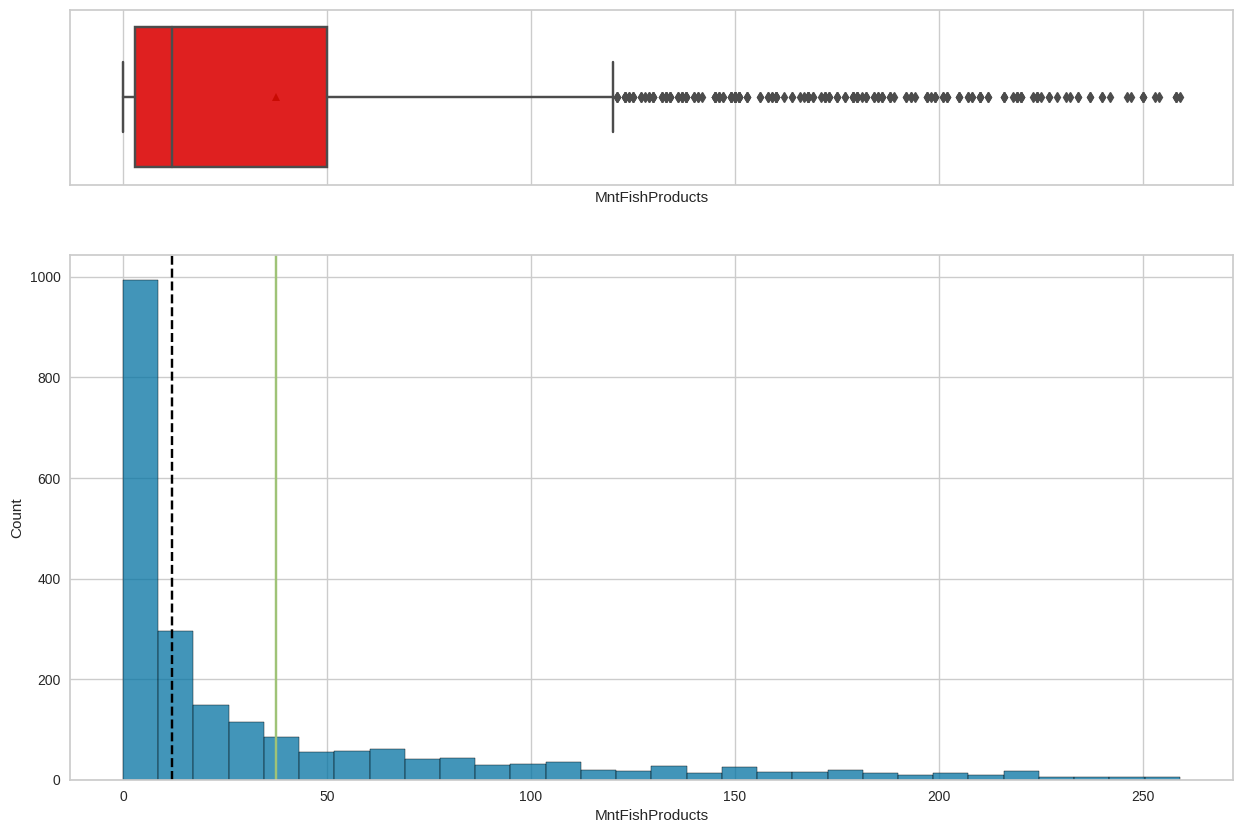

In [ ]:
# Exploring amount spent on wines numerical variable
histogram_boxplot(df.MntFishProducts, bins = 30)

Observations:

*   The amount spent on fish products is right-skewed.
*   Customers spend on average around 40 dollars on fish in the last 2 years but there are many more healthy customers that spend close to 250.



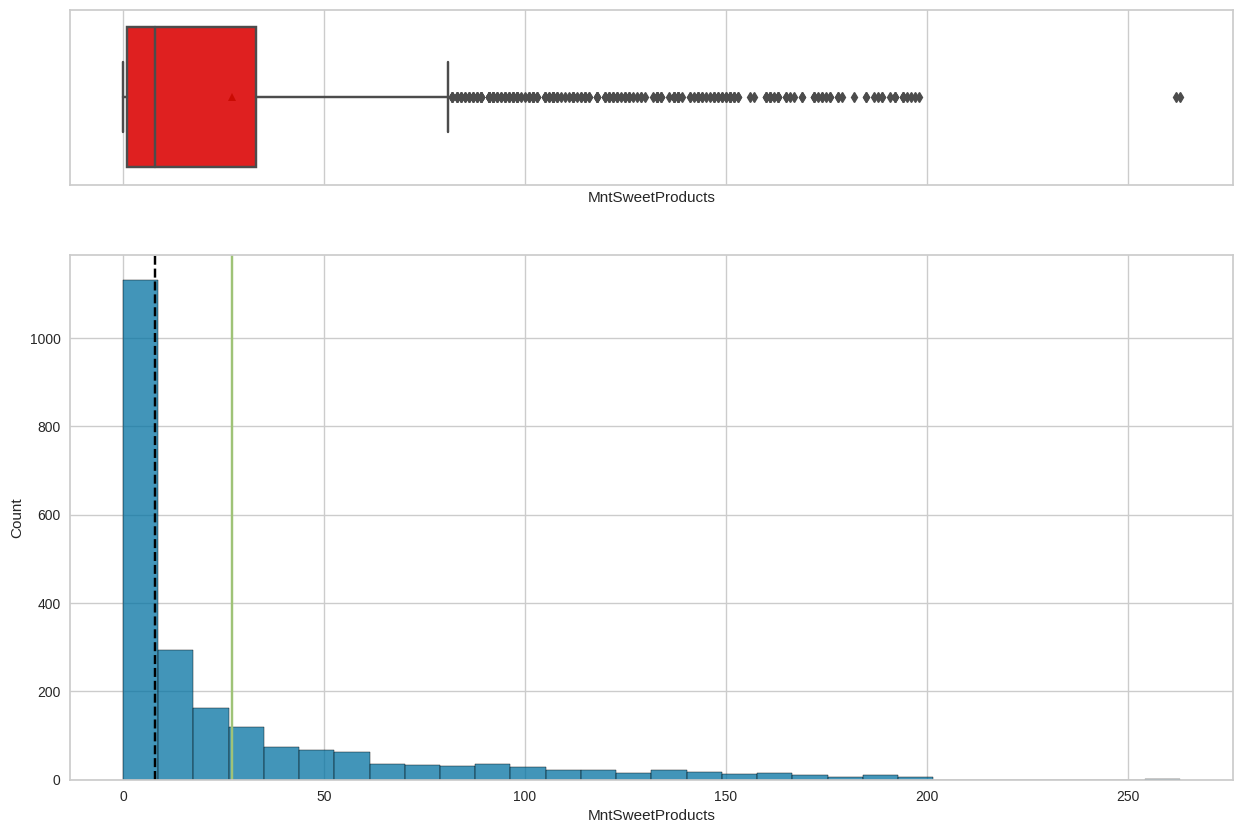

In [ ]:
# Exploring amount spent on wines numerical variable
histogram_boxplot(df.MntSweetProducts, bins = 30)

Observations:

*   The amount spent on fruit is right-skewed.
*   Customers spend on average around 25 dollars on fruits in the last 2 years but there are a few with a sweet tooth that spend close to 200.



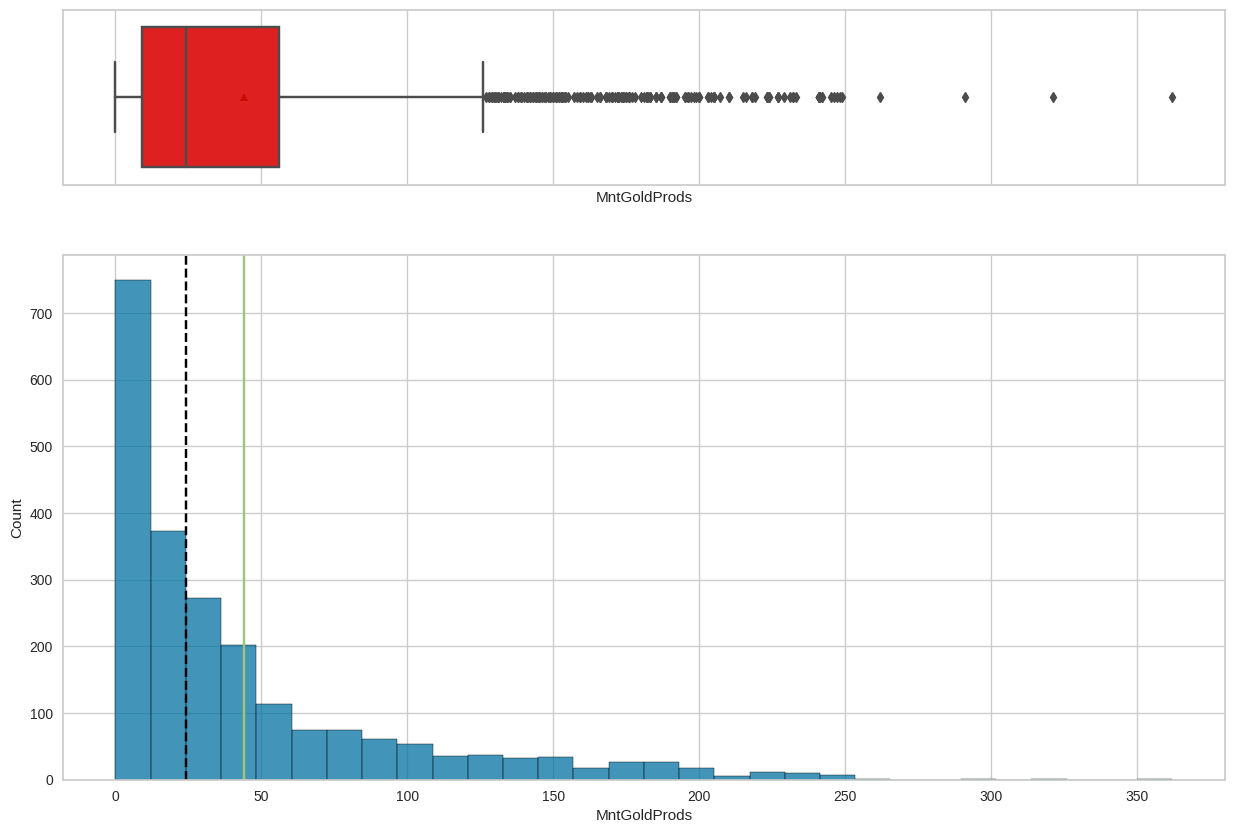

In [ ]:
# Exploring amount spent on wines numerical variable
histogram_boxplot(df.MntGoldProds, bins = 30)

Observations:

*   The amount spent on gold products is right-skewed.
*   Customers spend on average close to 50 dollars on gold products.


**Univariate Analysis with Categorical Variables**

In [ ]:
# Exploring the categorical variables: Marital_Status, Education, Kidhome, Teenhome, Complain, and Response.

def bar_perc(df, z):
    total = len(df[z]) # Length of the column
    plt.figure(figsize = (15, 5))
    plt.xticks(rotation = 90)


    ax = sns.countplot(x=z, data=df, palette='Paired', order=df[z].value_counts().index)

    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total) # Percentage of each class
        x = p.get_x() + p.get_width() / 3.5 - .05                   # Width of the plot
        y = p.get_y() + p.get_height()                              # Height of the plot
        ax.annotate(percentage, (x, y), size = 12)                  # Annotate the percentage

    plt.show()                            # Show the plot

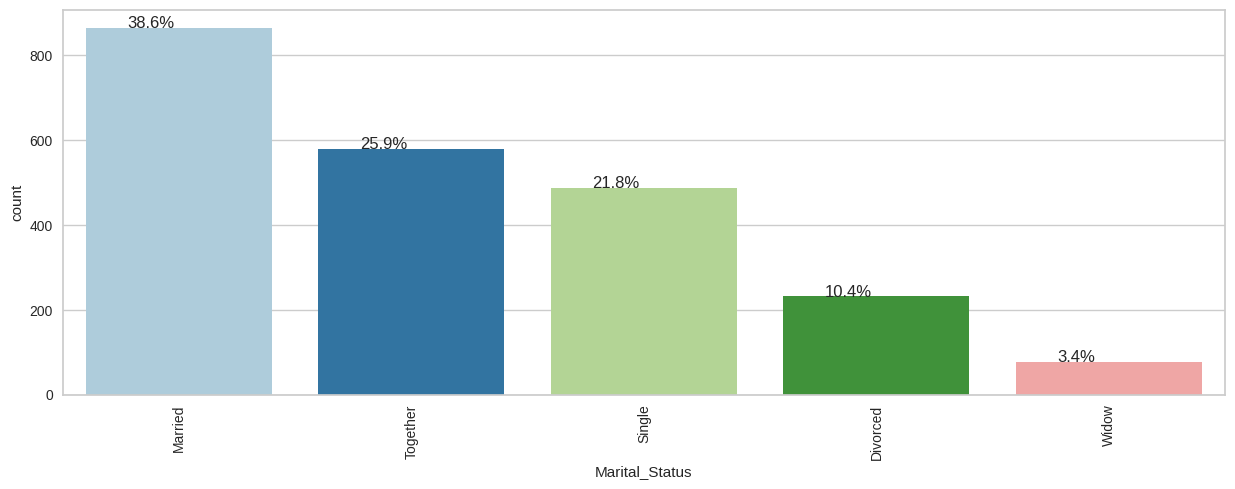

In [ ]:
# Convert the column to a categorical data type
#df['Marital_Status'] = df['Marital_Status'].astype('category')

# Bar plot for 'Marital_Status'
bar_perc(df, 'Marital_Status')

Observations:

*   38.6% of customers are married, 25.9% are together, 21.8% are single, 10.4% are divorced, and 3.4% are widows.


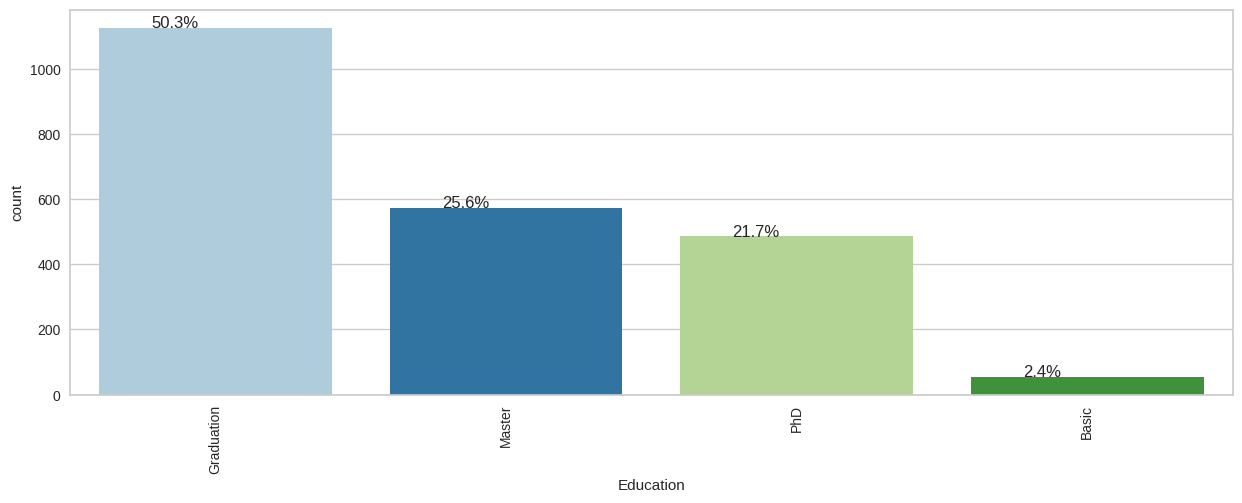

In [ ]:
# Bar plot for 'Education'
bar_perc(df, 'Education')

Observations:

*   Nearly half (50.3%) of the customers have graduated.
*   More customers have a Masters degree (25.6%) than a PhD (21.7%).
*   The smallest amount of people have a basic degree (2.4%).





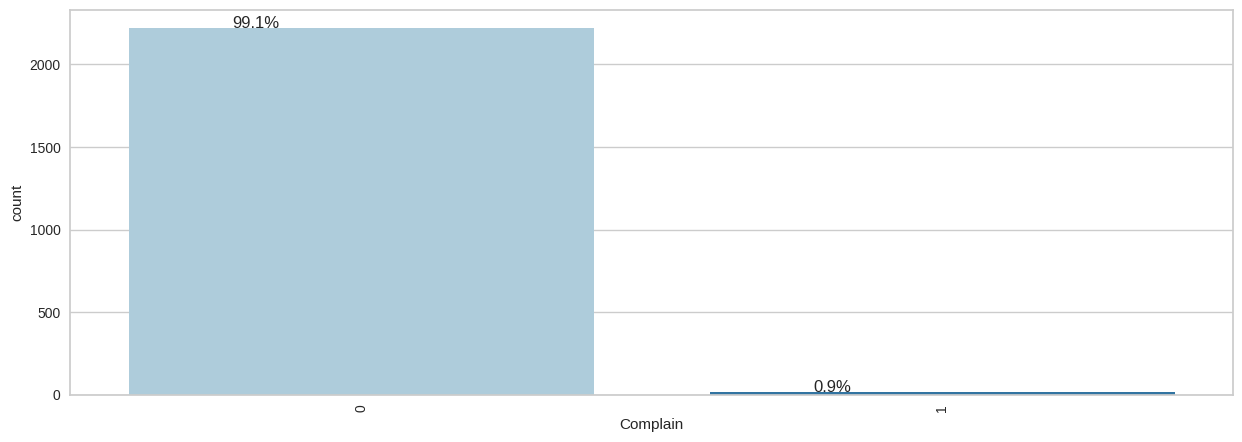

In [ ]:
# Bar plot for 'Complain'
bar_perc(df, 'Complain')

**Most of the customers seem satisfied** and are not complaining.

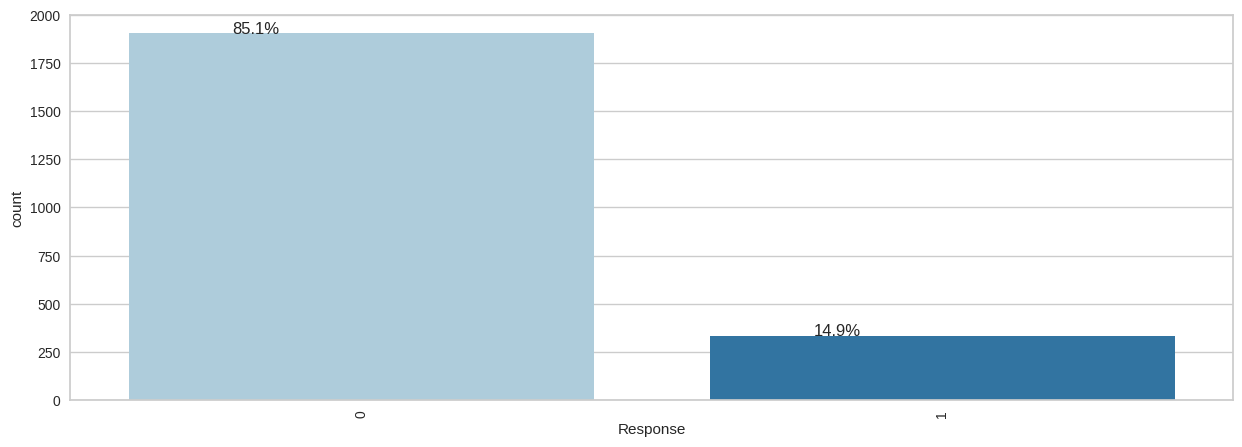

In [ ]:
# Bar plot for 'Response'
bar_perc(df, 'Response')

As noticed before, there is a low response rate - **only 15%**. Perhaps this marketing analysis can help us increase the response rate to marketing campaigns.

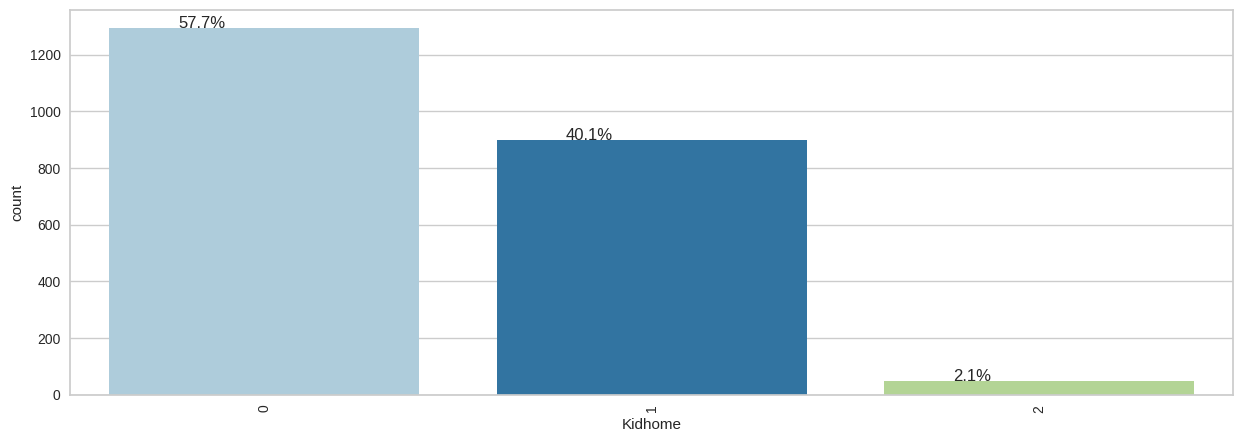

In [ ]:
# Bar plot for 'Kidhome'
bar_perc(df, 'Kidhome')

**Over half of the customers do not have children.** 40.1% have 1 kid at home while only 2.1% have 2 kids.

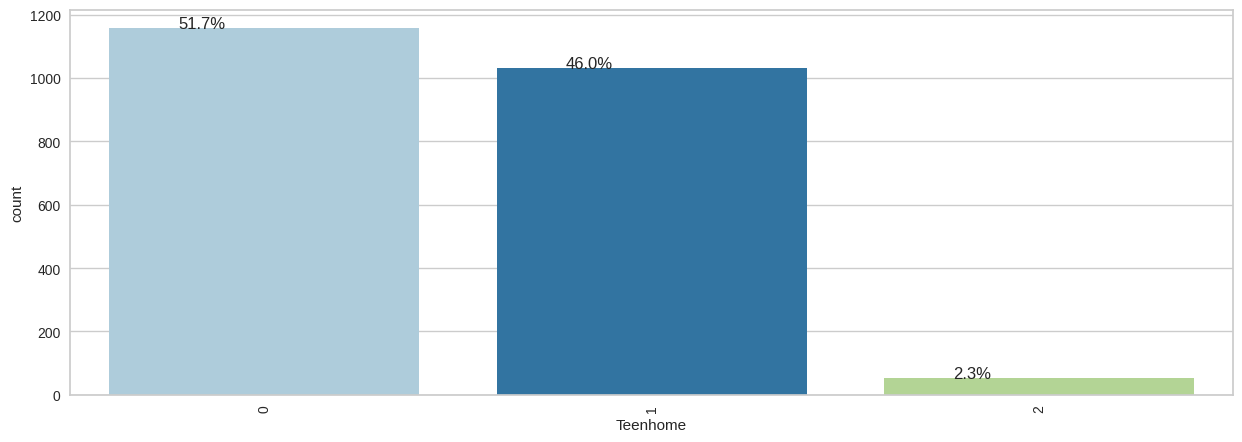

In [ ]:
# Bar plot for 'Teenhome'
bar_perc(df, 'Teenhome')

**Similarly as above, more than half do not have teens at home.** **46% have 1 teen at home** and 2.3% have 2 teens at home.

### **Bivariate Analysis**

 - Analyze different categorical and numerical variables and check how different variables are related to each other.
 - Check the relationship of numerical variables with categorical variables.

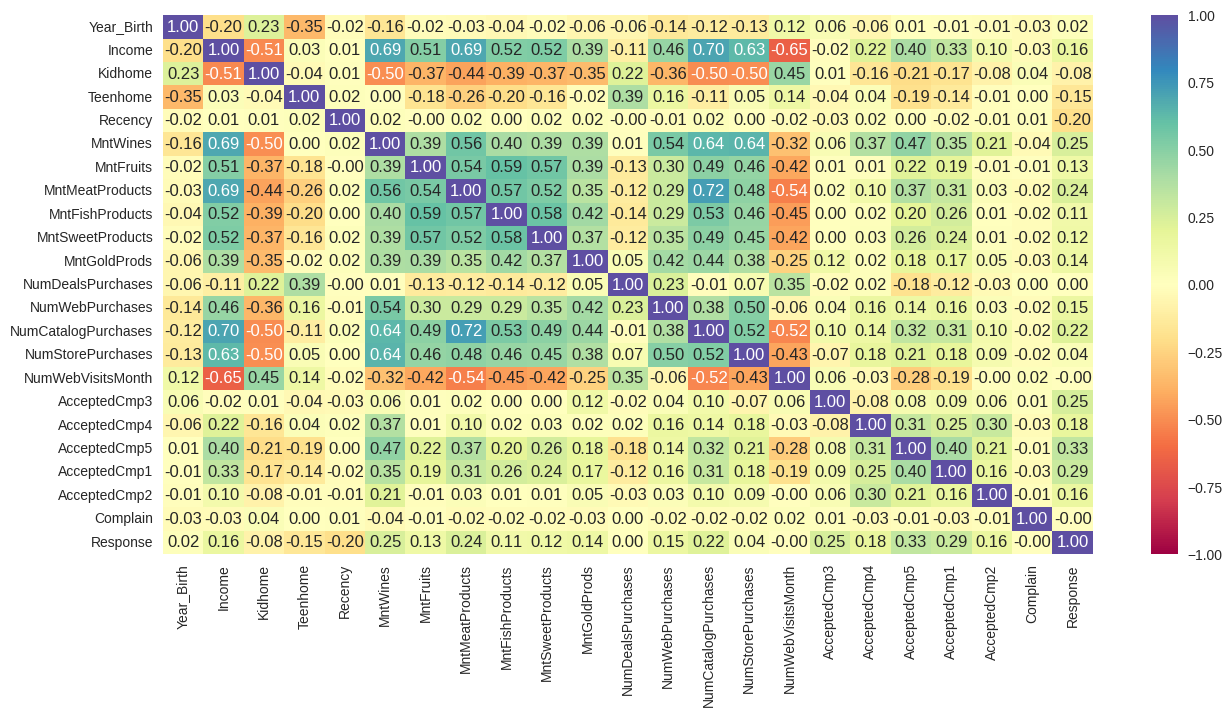

In [ ]:
# Plotting the heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

Observations:

The following variables exhibit **positive** correlation (>0.60):
*  NumCatalogPurchases and MntMeatProducts
*  NumCatalogPurchases and MntWine
*  NumCatalogPurchases and Income
*  NumStorePurchases and MntWines
*  NumStorePurchases and Income
*  MntMeat Products and Income
*  MntWines and Income

Not surprisingly there is a positive correlation between money spent, particularly on wine and meat (the most popular products), and the number of catalog or store purchases made.

The following variables exhibit **negative** correlation (< -0.60):
*  NumWebVisitsMonth and Income



Let's run some additional analysis on categorical variables as well.

Axes(0.125,0.11;0.775x0.77)


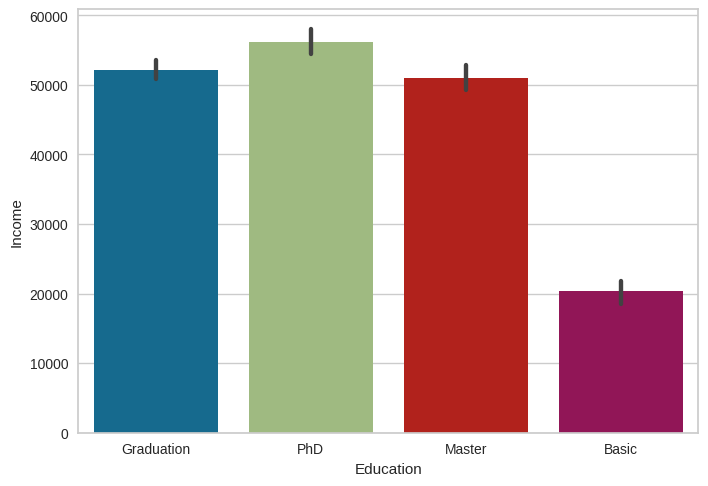

In [ ]:
# What is the relationship between Education and Income?
print(sns.barplot(x='Education', y='Income', data=df))

It seems that those with the highest income are also most likely to have a higher graduate degree like a PhD or Masters.

Axes(0.125,0.11;0.775x0.77)


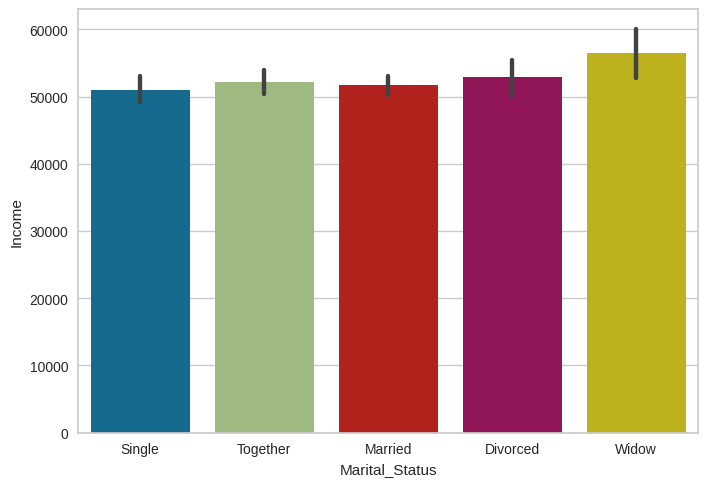

In [ ]:
# What is the relationship between Marital Status and Income?
print(sns.barplot(x='Marital_Status', y='Income', data=df))

Income levels are quite similar across the marital status groups with the widows having the largest amount of income.

Axes(0.125,0.11;0.775x0.77)


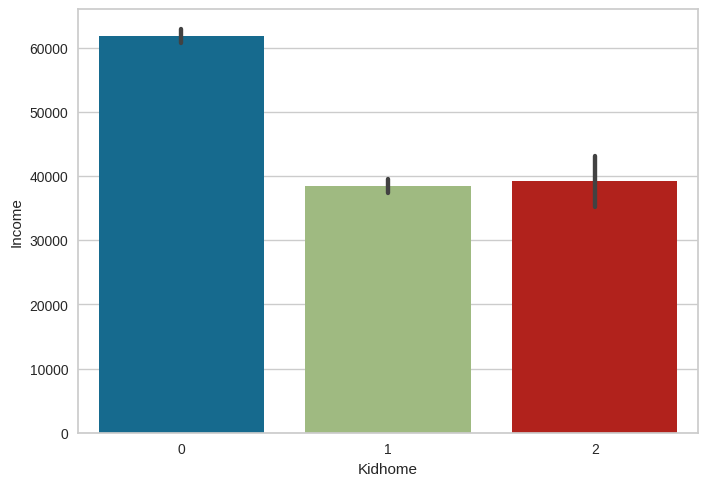

In [ ]:
# What is the relationship between kids at home and income?
print(sns.barplot(x='Kidhome', y='Income', data=df))

The highest earners do not have children at home.

Axes(0.125,0.11;0.775x0.77)


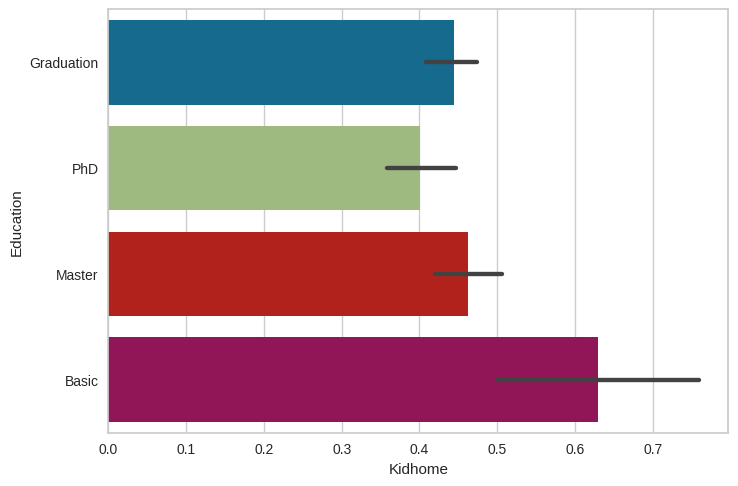

In [ ]:
# What is the relationship between kids at home and education?
print(sns.barplot(x='Kidhome', y='Education', data=df))

Most parents have a basic degree.

Axes(0.125,0.11;0.775x0.77)


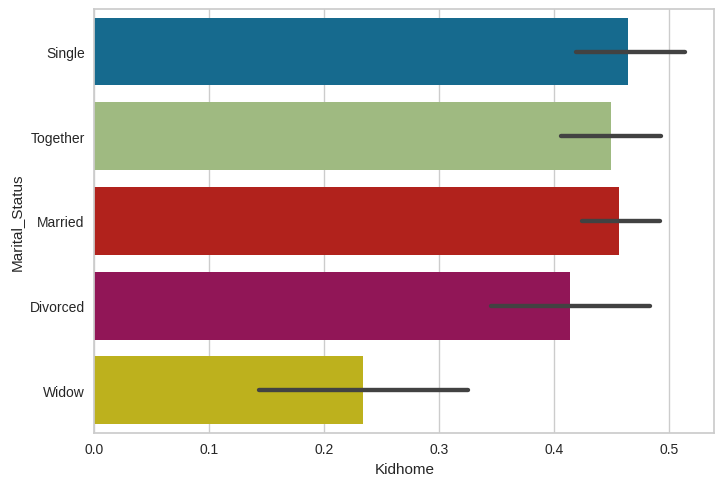

In [ ]:
# What is the relationship between kids at home and marital status?
print(sns.barplot(x='Kidhome', y='Marital_Status', data=df))

There seems to be a lot of single parents in the group. Most others who have kids are either married or together with a partner.

### **Feature Engineering and Data Processing**

In this section, we will first prepare our dataset for analysis.
- Imputing missing values

**Think About It:**

- Can we extract the age of each customer and create a new feature?
- Can we find the total kids and teens in the home?
- Can we find out how many members each family has?
- Can we find the total amount spent by the customers on various products?
- Can we find out how long the customer has been with the company?
- Can we find out how many offers the customers have accepted?
- Can we find out amount spent per purchase?



In [ ]:
# Converting Year_Birth to datetime and adjusting for 2016 data collection year
df["Age"] = 2016 - pd.to_datetime(df.Year_Birth, format="%Y").apply(lambda x: x.year)

# Sorting the values in ascending order
df["Age"].sort_values()

1170     20
46       20
747      21
2213     21
995      21
       ... 
424      75
1950     76
192     116
339     117
239     123
Name: Age, Length: 2239, dtype: int64

A few years seem unreasonable: 116, 117, 123 and we should remove this from our analysis.

In [ ]:
df.drop(index = [192, 339, 239], inplace = True)

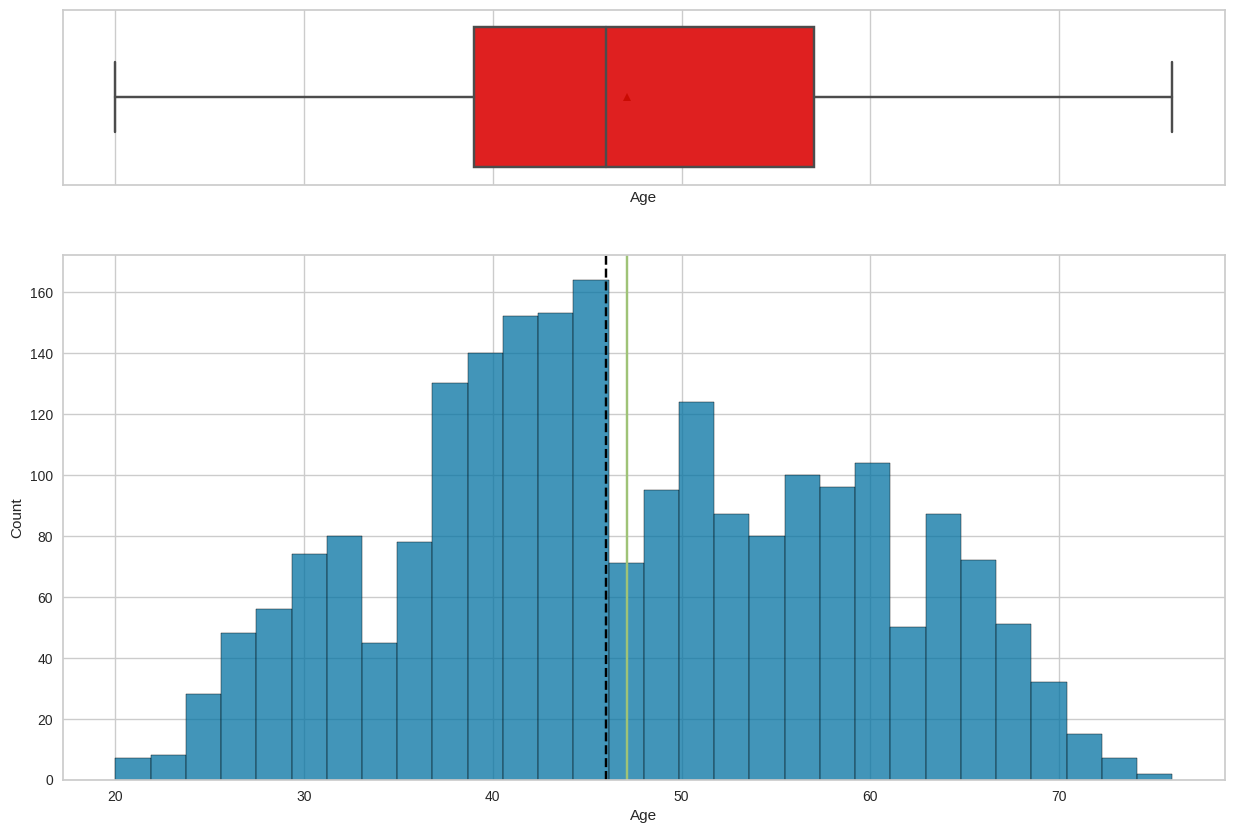

In [ ]:
histogram_boxplot(df.Age, bins = 30)

Most customers are around 47 years old and it's a pretty symmetric distribution.

**Finding the total kids and teens in the home**

In [ ]:
#Adding kids + teens at home
df["Total_Kids"] = df["Kidhome"] + df["Teenhome"]

**Finding out how many members each family has**


In [ ]:
# Further combine Marital_Status categories
df['Marital_Status'].replace(to_replace=["Married", "Together"], value="Relationship", inplace=True)

# Further combine Single categories
df['Marital_Status'].replace(to_replace=["Divorced", "Widow"], value="Single", inplace=True)

In [ ]:
# Sense check
df.describe(exclude = 'number').T

count unique           top  freq
Education       2236      4    Graduation  1126
Marital_Status  2236      2  Relationship  1442
Dt_Customer     2236    663    31-08-2012    12

In [ ]:
# Create a new feature called "Status" and assign numerical values: Single = 1 and Relationship = 2
df["Status"] = df["Marital_Status"].replace({"Single": 1, "Relationship": 2})

In [ ]:
# Add Status and Total_Kids to get the total amount of members in each family
df["Family_Size"] = df["Total_Kids"] + df["Status"]

# Checking to see if new columns were added
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2236 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2236 non-null   int64  
 1   Education            2236 non-null   object 
 2   Marital_Status       2236 non-null   object 
 3   Income               2212 non-null   float64
 4   Kidhome              2236 non-null   int64  
 5   Teenhome             2236 non-null   int64  
 6   Dt_Customer          2236 non-null   object 
 7   Recency              2236 non-null   int64  
 8   MntWines             2236 non-null   int64  
 9   MntFruits            2236 non-null   int64  
 10  MntMeatProducts      2236 non-null   int64  
 11  MntFishProducts      2236 non-null   int64  
 12  MntSweetProducts     2236 non-null   int64  
 13  MntGoldProds         2236 non-null   int64  
 14  NumDealsPurchases    2236 non-null   int64  
 15  NumWebPurchases      2236 non-null   i

**Finding the total amount spent by the customers on various products**


In [ ]:
df["Total_Expenses"] = df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"]

**Finding the total amount of products purchased by customers**

In [ ]:
df["NumTotalPurchases"] = df["NumDealsPurchases"] + df["NumDealsPurchases"] + df["NumCatalogPurchases"] + df["NumStorePurchases"]

**Finding out how long the customer has been with the company**

In [ ]:
# Convert Dt_Customer to date time object
df["Dt_Customer"] = pd.to_datetime(df.Dt_Customer)

# Min of the date when customers have joined
df["Dt_Customer"].min()

Timestamp('2012-01-08 00:00:00')

In [ ]:
# Max of the date when customers have joined
df["Dt_Customer"].max()

Timestamp('2014-12-06 00:00:00')

Customers joined between 01/08/2012 and 12/06/2014. Now let's figure out how long each customers has been with the company in number of days since 2016.

In [ ]:
# Assign a date to a new day variable. The data is from 2016, although we don't know when in 2016, so we can assign a date such as the first of January in 2016 as the engagement period.
df["day"] = "01-01-2016"

df["day"] = pd.to_datetime(df.day)

In [ ]:
df["Engagement_Period"] = (df["day"] - df["Dt_Customer"]).dt.days

**Finding out how many offers the customers have accepted**

In [ ]:
df["Total_AcceptedCmp"] = df["AcceptedCmp1"] + df["AcceptedCmp2"] + df["AcceptedCmp3"] + df["AcceptedCmp4"] + df["AcceptedCmp5"] + df["Response"]

**Finding out the amount spent per purchase**

In [ ]:
df["AmountPerPurchase"] = df["Total_Expenses"] / df["NumTotalPurchases"]

In [ ]:
# Finding the minimum amount of purchase
df["AmountPerPurchase"].min()

0.26666666666666666

In [ ]:
# Finding the maximum amounts per purchase
df["AmountPerPurchase"].max()

inf

Something is off here. The maximum amount per purchase should not be infinite. Let's explore further, perhaps we are dividing by 0 NumTotalPurchases.

In [ ]:
count_zero = df["NumTotalPurchases"].value_counts()
print(count_zero)

5     231
7     199
10    128
12    120
13    112
18    112
15    110
17    108
14    105
19    104
4     101
16     99
9      93
11     86
20     84
8      79
21     62
6      59
22     53
24     40
23     35
25     20
28     17
26     16
27     14
0       8
30      7
1       5
29      4
34      3
36      3
33      3
31      3
37      2
32      2
40      2
2       2
45      1
59      1
52      1
58      1
35      1
Name: NumTotalPurchases, dtype: int64


In [ ]:
# Drop all 0s in NumTotalPurchases
df.drop(df[df['NumTotalPurchases'] == 0].index, inplace = True)

In [ ]:
df[['AmountPerPurchase']].describe()

AmountPerPurchase
count        2228.000000
mean           40.149339
std            51.190490
min             0.266667
25%             9.714286
50%            26.699095
75%            57.679383
max          1679.000000

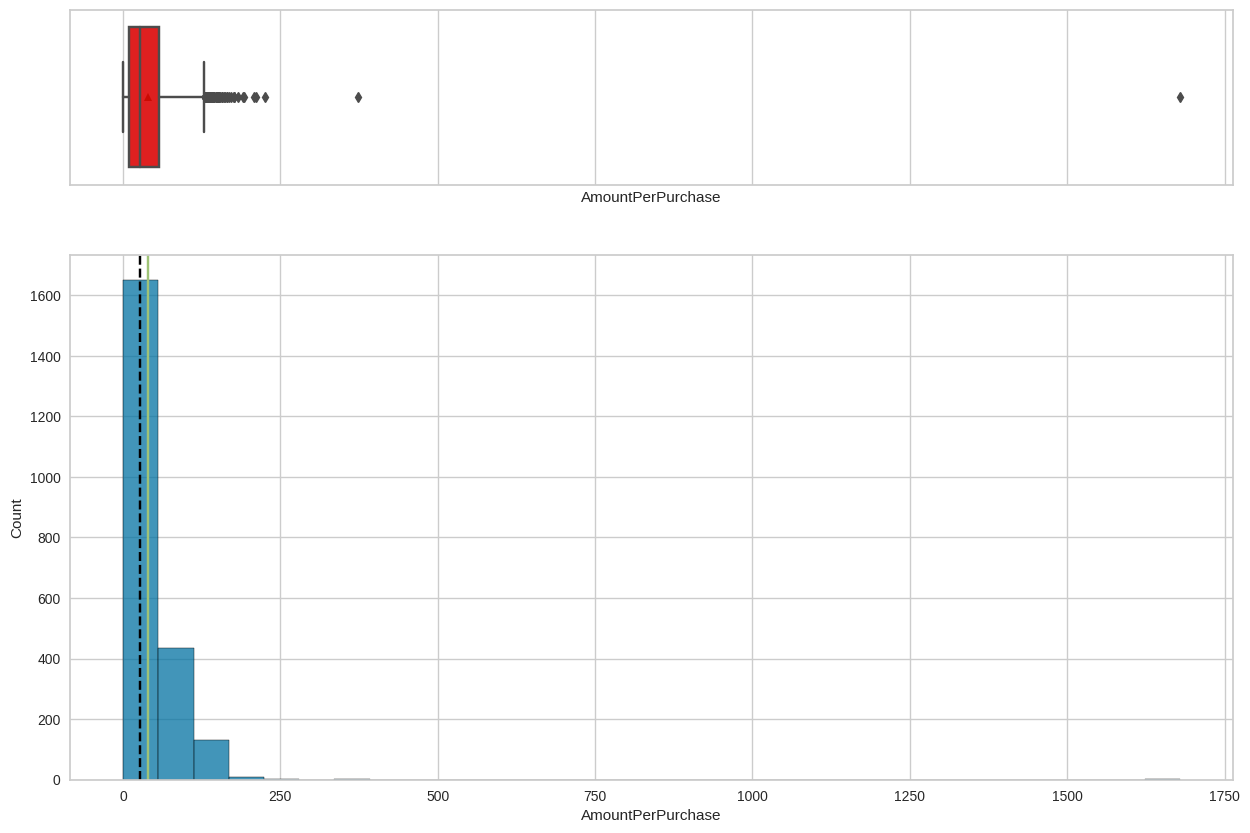

In [ ]:
histogram_boxplot(df.AmountPerPurchase, bins = 30)

The variable is no longer infinite, it is right-skewed with a few outliers. The average amount customers spend per purchase is 40 dollars.

Now let's check for **missing values**

In [ ]:
df.isna().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 23
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
Age                     0
Total_Kids              0
Status                  0
Family_Size             0
Total_Expenses          0
NumTotalPurchases       0
day                     0
Engagement_Period       0
Total_AcceptedCmp       0
AmountPerPurchase       0
dtype: int64

We should impute the Income with the median.

In [ ]:
df['Income'].fillna(value = df.Income.median(), inplace = True)

In [ ]:
df.isna().sum()

Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
Age                    0
Total_Kids             0
Status                 0
Family_Size            0
Total_Expenses         0
NumTotalPurchases      0
day                    0
Engagement_Period      0
Total_AcceptedCmp      0
AmountPerPurchase      0
dtype: int64

Text(0, 0.5, 'Expenses')

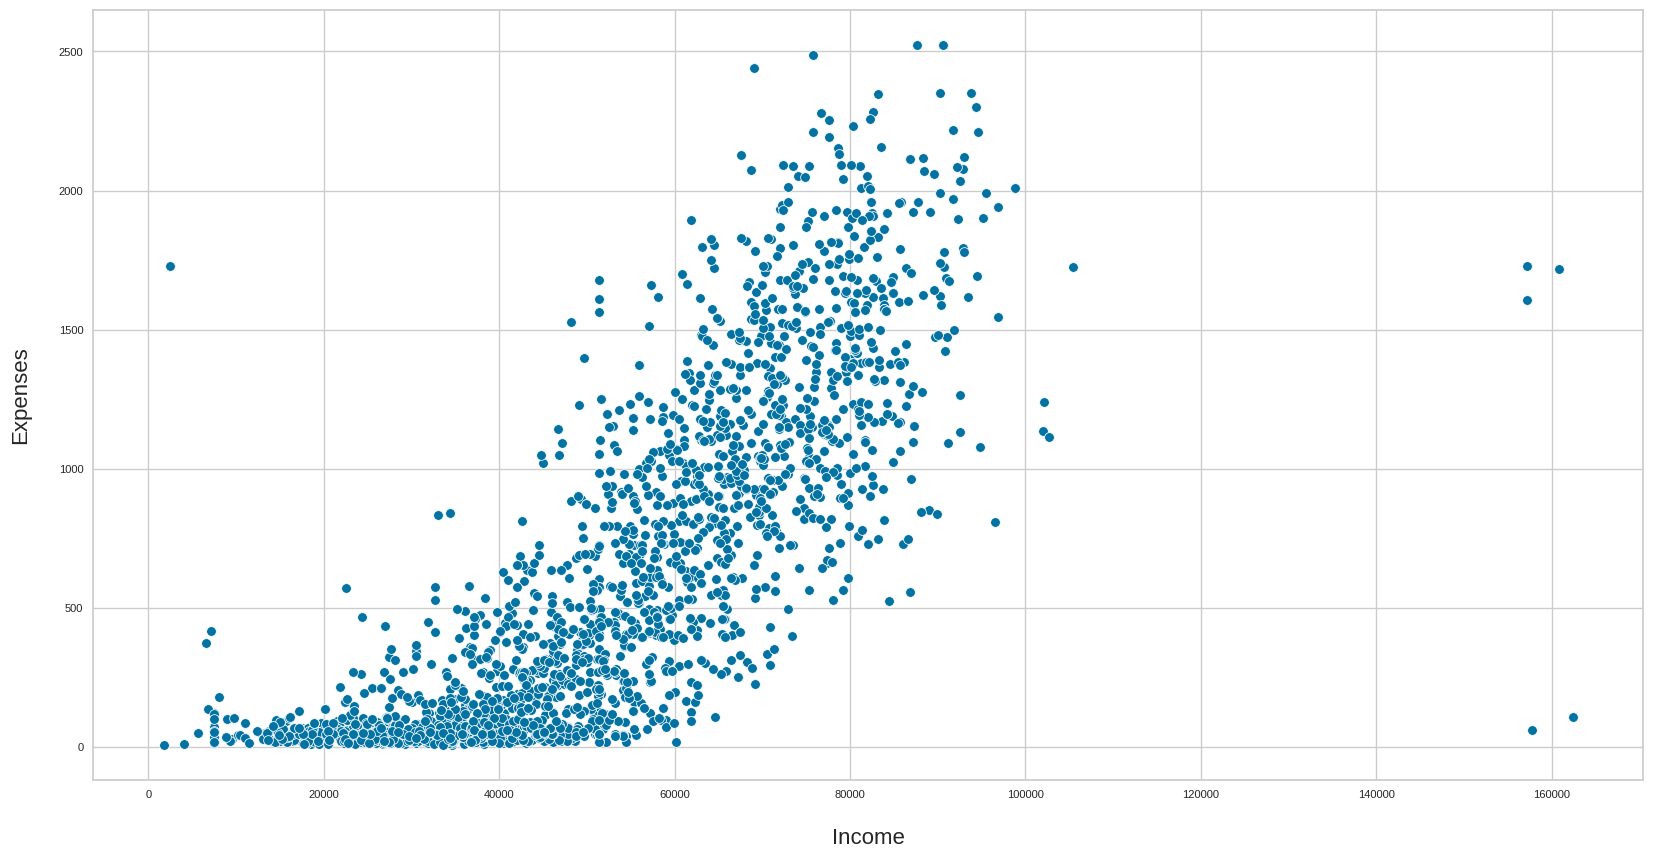

In [ ]:
# Plot the scatter plot with Total_Expenses on Y-axis and Income on X-axis

plt.figure(figsize=(20, 10))                                    # Setting the plot size

sns.scatterplot(data=df, x="Income", y="Total_Expenses")

plt.xticks(fontsize=8)

plt.yticks(fontsize=8)

plt.xlabel("Income", fontsize=16, labelpad=20)

plt.ylabel("Expenses", fontsize=16, labelpad=20)

It looks like **expenses go up with increasing income and that the two variables are positively correlated.** Let's also explore new variable such as Family_Size against Income.

<Axes: xlabel='Family_Size', ylabel='Income'>

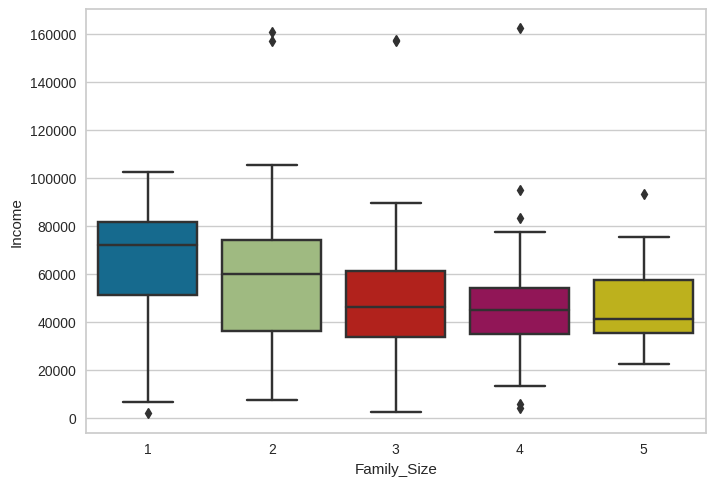

In [ ]:
sns.boxplot(data=df, x="Family_Size", y="Income")


Single customers tend to be the highest earners on average, however there do exist some outliers that we noticed before already.

## **Important Insights from EDA and Data Preprocessing**

What are the the most important observations and insights from the data based on the EDA and Data Preprocessing performed?

*   Single customers, and therefore Family_Size, is positively correlated with income.
*   Expenses increase as income increases also showcasing another positive correlation.
*   Most customers are around 47 years old and it's a pretty symmetric distribution.
*   Wine, followed by meat products, are the products that customers are spending the most money on. On average, customers spend 40 dollars per purchase.
*   It makes sense that income might go up with education levels and exhibits a positive correlation.






## **Data Preparation for Segmentation**

- The decision about which variables to use for clustering is a critically important decision that will have a big impact on the clustering solution. So we need to think carefully about the variables we will choose for clustering. Clearly, this is a step where a lot of contextual knowledge, creativity, and experimentation/iterations are needed.
- Moreover, we often use only a few of the data attributes for segmentation (the segmentation attributes) and use some of the remaining ones (the profiling attributes) only to profile the clusters. For example, in market research and market segmentation, we can use behavioral data for segmentation (to segment the customers based on their behavior like amount spent, units bought, etc.), and then use both demographic as well as behavioral data for profiling the segments found.
- Plot the correlation plot after we've removed the irrelevant variables
- Scale the Data

Let's remind ourselves of the columns we have.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2228 entries, 0 to 2239
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year_Birth           2228 non-null   int64         
 1   Education            2228 non-null   object        
 2   Marital_Status       2228 non-null   object        
 3   Income               2228 non-null   float64       
 4   Kidhome              2228 non-null   int64         
 5   Teenhome             2228 non-null   int64         
 6   Dt_Customer          2228 non-null   datetime64[ns]
 7   Recency              2228 non-null   int64         
 8   MntWines             2228 non-null   int64         
 9   MntFruits            2228 non-null   int64         
 10  MntMeatProducts      2228 non-null   int64         
 11  MntFishProducts      2228 non-null   int64         
 12  MntSweetProducts     2228 non-null   int64         
 13  MntGoldProds         2228 non-nul


For the segmentation, we will use the behavioral attributes and drop the demographic attributes including Income, Year_Birth, Age, Education, Kidhome, Teenhome, Family_Size, Status, Total_Kids, Marital_Status.

* Distance-based algorithms cannot use the default distance like Euclidean to find the distance between categorical and numerical variables hence why we're dropping categorical variables.
* We can also drop categorical variables like `AcceptedCmp1`, `AcceptedCmp2`, `AcceptedCmp3`, `AcceptedCmp4`, `AcceptedCmp5`, and `Response` for which we have created the aggregate 'TotalAcceptedCmp'.
* `Dt_Customer`: We have created the `Engagement_Period` variable using the Dt_Customer variable. Hence, we can drop this variable as it will not help with segmentation.
* `Complain`: About 95% of the customers didn't complain and have the same value for this column so it will not be important to segmentation.
* `day`:  We have created the `Engagement_Period` variable using the 'day' variable and no longer need to utilize this variable.

In [ ]:
# Dropping all aforementioned columns and storing in data_model
data_model = df.drop(
    columns=[
        "Year_Birth",
        "Dt_Customer",
        "day",
        "Complain",
        "Response",
        "AcceptedCmp1",
        "AcceptedCmp2",
        "AcceptedCmp3",
        "AcceptedCmp4",
        "AcceptedCmp5",
        "Marital_Status",
        "Status",
        "Total_Kids",
        'Education',
        'Kidhome',
        'Teenhome',
        'Income',
        'Age',
        'Family_Size'
    ],
    axis=1,
)

In [ ]:
data_model.head(5)

Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0       58       635         88              546              172   
1       38        11          1                6                2   
2       26       426         49              127              111   
3       26        11          4               20               10   
4       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Total_Expenses  \
0                   10                  4                  7            1617   
1                    1                  2                  5              27   
2                    2                 10                  4             776   
3                    0                  4                  6              53   
4                    3                  6                  5             422   

   NumTotalPurchases  Engagement_Period  Total_AcceptedCmp  AmountPerPurchase  
0                 20               1362                  1          80.850000  
1                  7                516                  0           3.857143  
2                 14                863                  0          55.428571  
3                  8                456                  0           6.625000  
4                 19                712                  0          22.210526

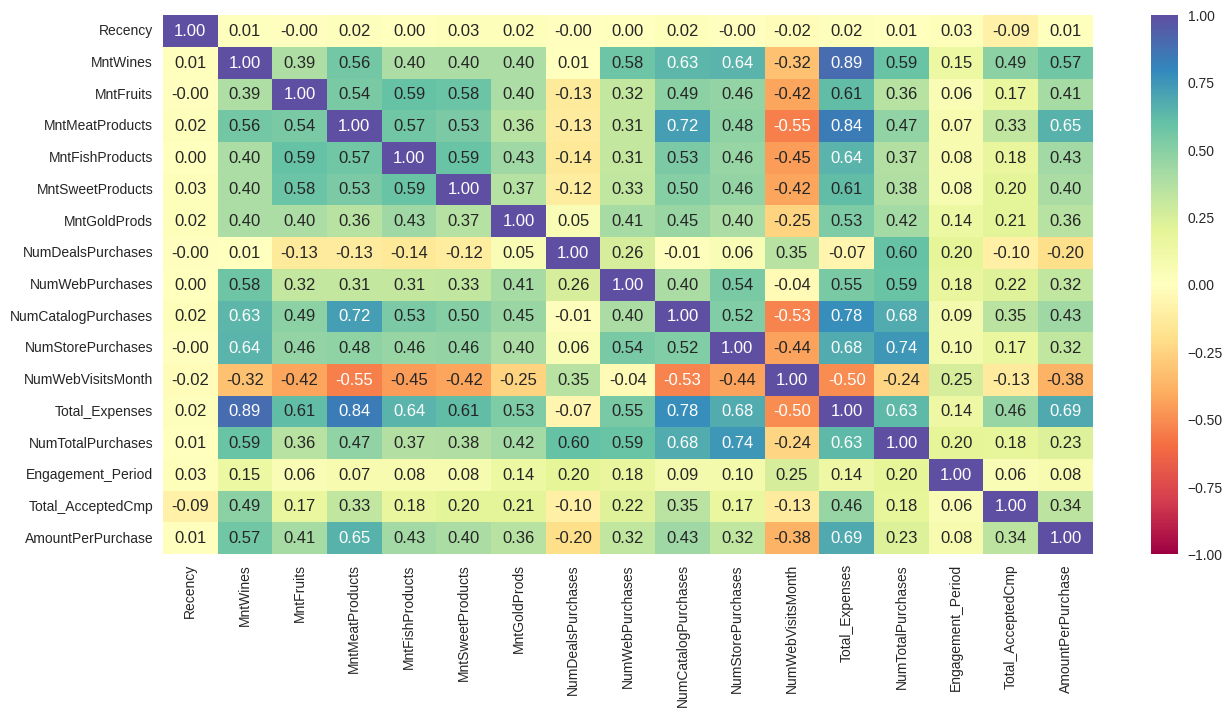

In [ ]:
# Plotting the correlation through a heatmap again
plt.figure(figsize=(15, 7))
sns.heatmap(data_model.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

Observations:

*  We now see a large positive correlation between Total_Expenses and MntWines, MntMeatProducts, and NumCatalogPurchases.
*  NumTotalPurchases and NumStorePurchases are also positively correlated.





**Scaling the data**


In [ ]:
# Scaling the data
scaler = StandardScaler()                                                   # Initialize the Standard Scaler

df_scaled = scaler.fit_transform(data_model)                                # fit_transform the scaler function on new data

df_scaled = pd.DataFrame(df_scaled, columns=data_model.columns)             # Converting the embeddings to a dataframe

df_scaled.head()

Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  0.305365  0.979674   1.550239         1.675722         2.456228   
1 -0.385981 -0.873917  -0.637927        -0.715444        -0.652146   
2 -0.800789  0.358840   0.569337        -0.179645         1.340870   
3 -0.800789 -0.873917  -0.562473        -0.653450        -0.505870   
4  1.549789 -0.392696   0.418429        -0.219498         0.152374   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0          1.498946      0.860605           0.344698         1.481433   
1         -0.636727     -0.737040          -0.173162        -1.154855   
2         -0.145767     -0.035635          -0.691022         1.481433   
3         -0.587631     -0.756524          -0.173162        -0.778242   
4          0.001520     -0.561689           1.380417         0.351595   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Total_Expenses  \
0             2.505779          -0.561042           0.700520        1.676563   
1            -0.572070          -1.178785          -0.132551       -0.964257   
2            -0.230087           1.292186          -0.549086        0.279752   
3            -0.914053          -0.561042           0.283984       -0.921074   
4             0.111897           0.056700          -0.132551       -0.308204   

   NumTotalPurchases  Engagement_Period  Total_AcceptedCmp  AmountPerPurchase  
0           1.020179           1.973536           0.619746           0.795261  
1          -0.918188          -1.668210          -0.503765          -0.709123  
2           0.125548          -0.174492          -0.503765           0.298545  
3          -0.769083          -1.926490          -0.503765          -0.655041  
4           0.871074          -0.824496          -0.503765          -0.350511

In [ ]:
df.shape

(2228, 36)

## **Applying T-SNE and PCA to the data to visualize the data distributed in 2 dimensions**

### **Applying T-SNE**

<Axes: xlabel='0', ylabel='1'>

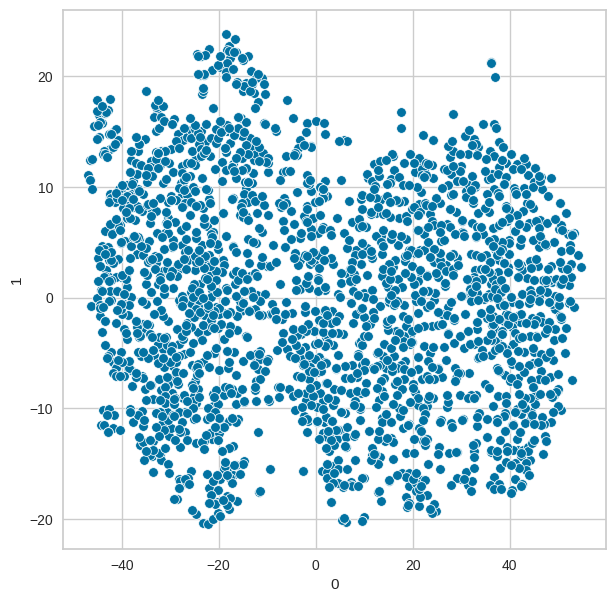

In [ ]:
# Fitting T-SNE with number of components equal to 2 to visualize how data is distributed

tsne = TSNE(n_components = 2, random_state=1, perplexity=65)                  # Initializing T-SNE with number of component equal to 2, random_state=1, and perplexity=65

data_tsne = tsne.fit_transform(df_scaled)                                     # fit_transform T-SNE on new data

data_tsne = pd.DataFrame(data_tsne, columns=[0, 1])                           # Converting the embeddings to a dataframe

plt.figure(figsize=(7, 7))                                                    # Scatter plot for two components

sns.scatterplot(x=0, y=1, data=data_tsne)                                     # Plotting T-SNE

**Observation and Insights:**

*   We increased the perplexity to create the two distinct groups.
*   We now must use PCA to reduce the multicollinearity between the 36 variables that we have.



### **Applying PCA**

**Think about it:**
- Should we apply clustering algorithms on the current data or should we apply PCA on the data before applying clustering algorithms? How would this help?

In [ ]:
# Defining the number of principal components to generate
n = data_model.shape[1]                                        # Storing the number of variables in the data

pca = PCA(n_components = 2, random_state = 1)                  # Initialize PCA with n_components = n and random_state=1

data_pca = pd.DataFrame(pca.fit_transform(df_scaled))           # fit_transform PCA on the scaled data

# The percentage of variance explained by each principal component is stored
exp_var = pca.explained_variance_ratio_

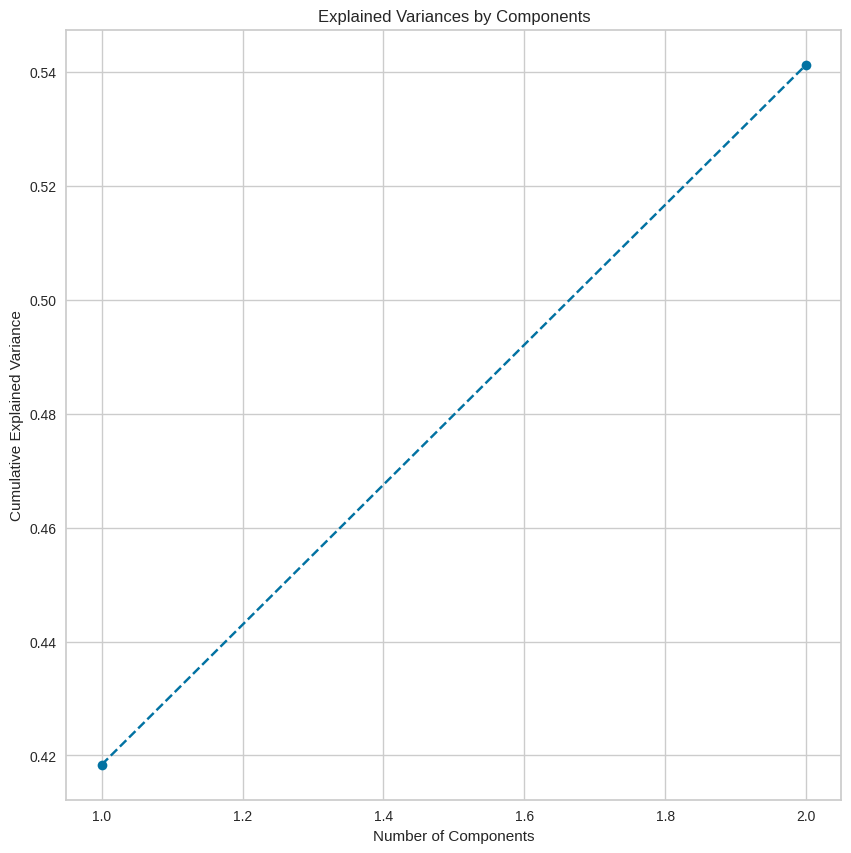

In [ ]:
# Visualize the explained variance by individual components
plt.figure(figsize = (10, 10))

plt.plot(range(1, 3), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')

plt.title("Explained Variances by Components")

plt.xlabel("Number of Components")

plt.ylabel("Cumulative Explained Variance")

plt.show()

**Observation and Insights:**

## **K-Means**

**Think About It:**

- How do we determine the optimal K value from the elbow curve?
- Which metric can be used to determine the final K value?

In [ ]:
distortions = []                                                  # Create an empty list

K = range(2, 10)                                                  # Setting the K range from 2 to 10

for k in K:
    kmeanModel = KMeans(n_clusters=k,random_state=4)              # Initialize K-Means
    kmeanModel.fit(data_pca)                                      # Fit K-Means on the data
    distortions.append(kmeanModel.inertia_)                       # Append distortion values to the empty list created above

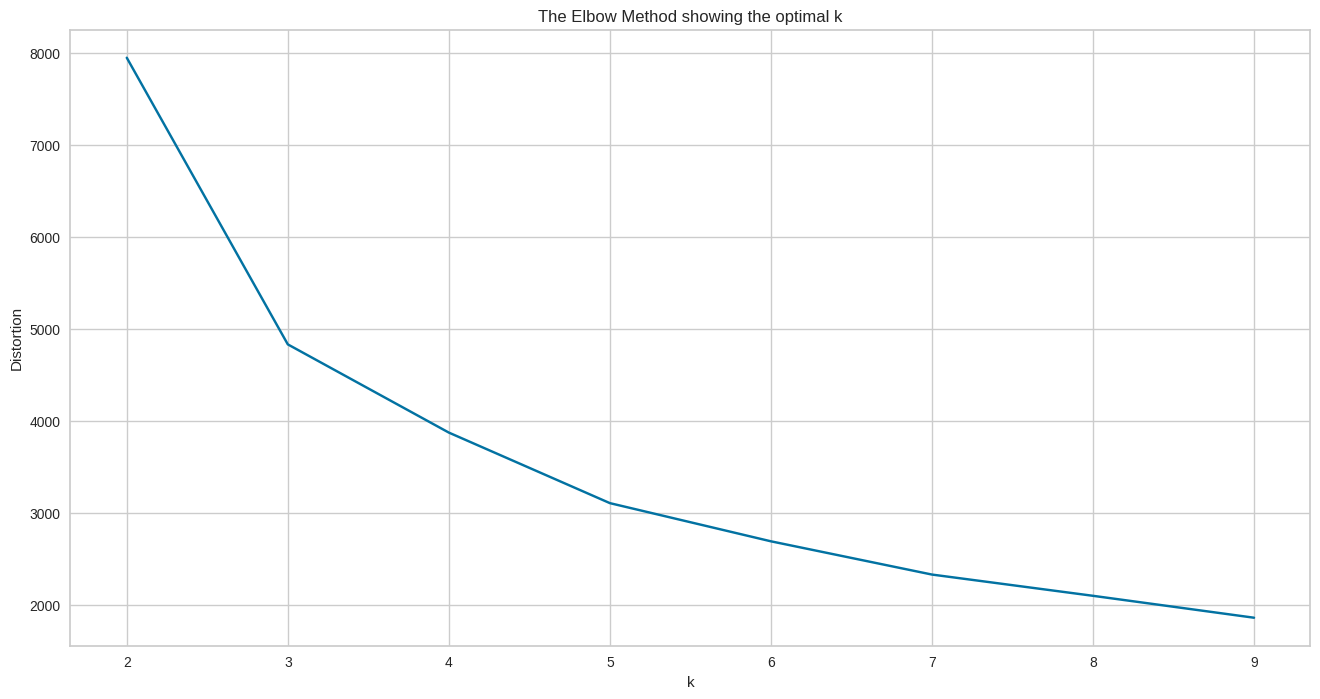

In [ ]:
# Plotting the elbow plot
plt.figure(figsize=(16, 8))                                            # Setting the plot size

plt.plot(K, distortions, "bx-")                                        # Plotting the K on X-axis and distortions on y-axis

plt.xlabel("k")                                                        # Title of x-axis

plt.ylabel("Distortion")                                               # Title of y-axis

plt.title("The Elbow Method showing the optimal k")                    # Title of the plot
plt.show()

**In the above plot, the elbow is seen for K=3 and K=5 as there is some drop in distortion at K=3 and K=5.**

We must now use silhouette score as a metric for different K values to make a better decision about picking the number of clusters(K).

In [ ]:
sil_score = []                                                             # Creating empty list
cluster_list = range(3, 7)                                                 # Creating a range from 3 to 7
for n_clusters in cluster_list:

    # Initialize K-Means with number of clusters equal to n_clusters and random_state=1
    clusterer = KMeans(n_clusters = 3, random_state = 1)

    # Fit and predict on the pca data
    preds = clusterer.fit(data_pca)

    # Calculate silhouette score - Hint: Use silhouette_score() function
    score = silhouette_score(data_pca, clusterer.labels_, metric='euclidean')

    # Append silhouette score to empty list created above
    sil_score.append(score)

    # Print the silhouette score
    print( "For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

For n_clusters = 3, the silhouette score is 0.5202601161184902)
For n_clusters = 4, the silhouette score is 0.5202601161184902)
For n_clusters = 5, the silhouette score is 0.5202601161184902)
For n_clusters = 6, the silhouette score is 0.5202601161184902)


Silhouette coefficients near +1 indicate that the clusters are dense and well separated. Kmeans = 3 gets us closer to +1 so let's build **KMeans using K=3.**

### **Applying KMeans on the PCA data and visualize the clusters**

In [ ]:
kmeans = KMeans(n_clusters = 3, random_state = 1)

kmeans.fit(data_pca)

KMeans(n_clusters=3, random_state=1)

In [ ]:
data_pca["K_means_segments_3"] = kmeans.labels_                    # Adding K-Means cluster labels to the data_pca data

df["K_means_segments_3"] = kmeans.labels_                        # Adding K-Means cluster labels to the whole data

data_model["K_means_segments_3"] = kmeans.labels_                  # Adding K-Means cluster labels to data_model

In [ ]:
# Let's check the distribution
data_model["K_means_segments_3"].value_counts()

0    1064
1     591
2     573
Name: K_means_segments_3, dtype: int64

### **Cluster Profiling**

In [ ]:
# Function to visualize PCA data with clusters formed
def PCA_PLOT(X, Y, PCA, cluster):
    sns.scatterplot(x=X, y=1, data=PCA, hue=cluster)

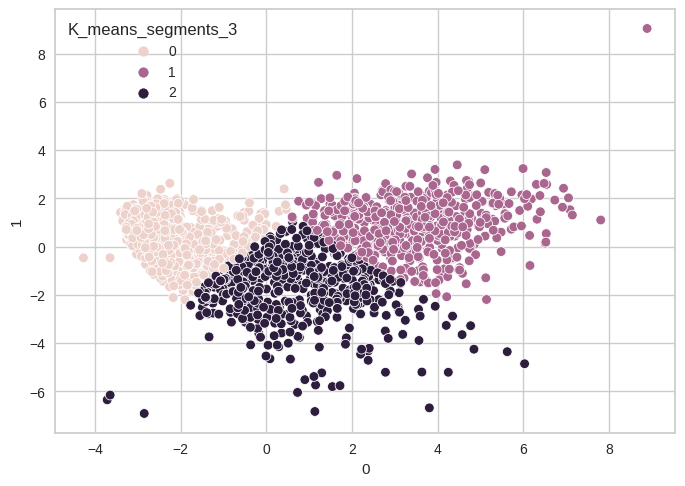

In [ ]:
PCA_PLOT(0, 1, data_pca, "K_means_segments_3")

In [ ]:
# Taking the cluster-wise mean of all the variables.
cluster_profile_KMeans_3 = df.groupby('K_means_segments_3').mean()

In [ ]:
# Highlighting the maximum average value among all the clusters for each of the variables
cluster_profile_KMeans_3.style.highlight_max(color="lightgreen", axis=0)

In [ ]:
# Columns to use in boxplot
col_for_box = ['Income','Kidhome','Teenhome','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','Complain','Age','Family_Size','Total_Expenses','NumTotalPurchases','Engagement_Period','Total_AcceptedCmp','AmountPerPurchase']

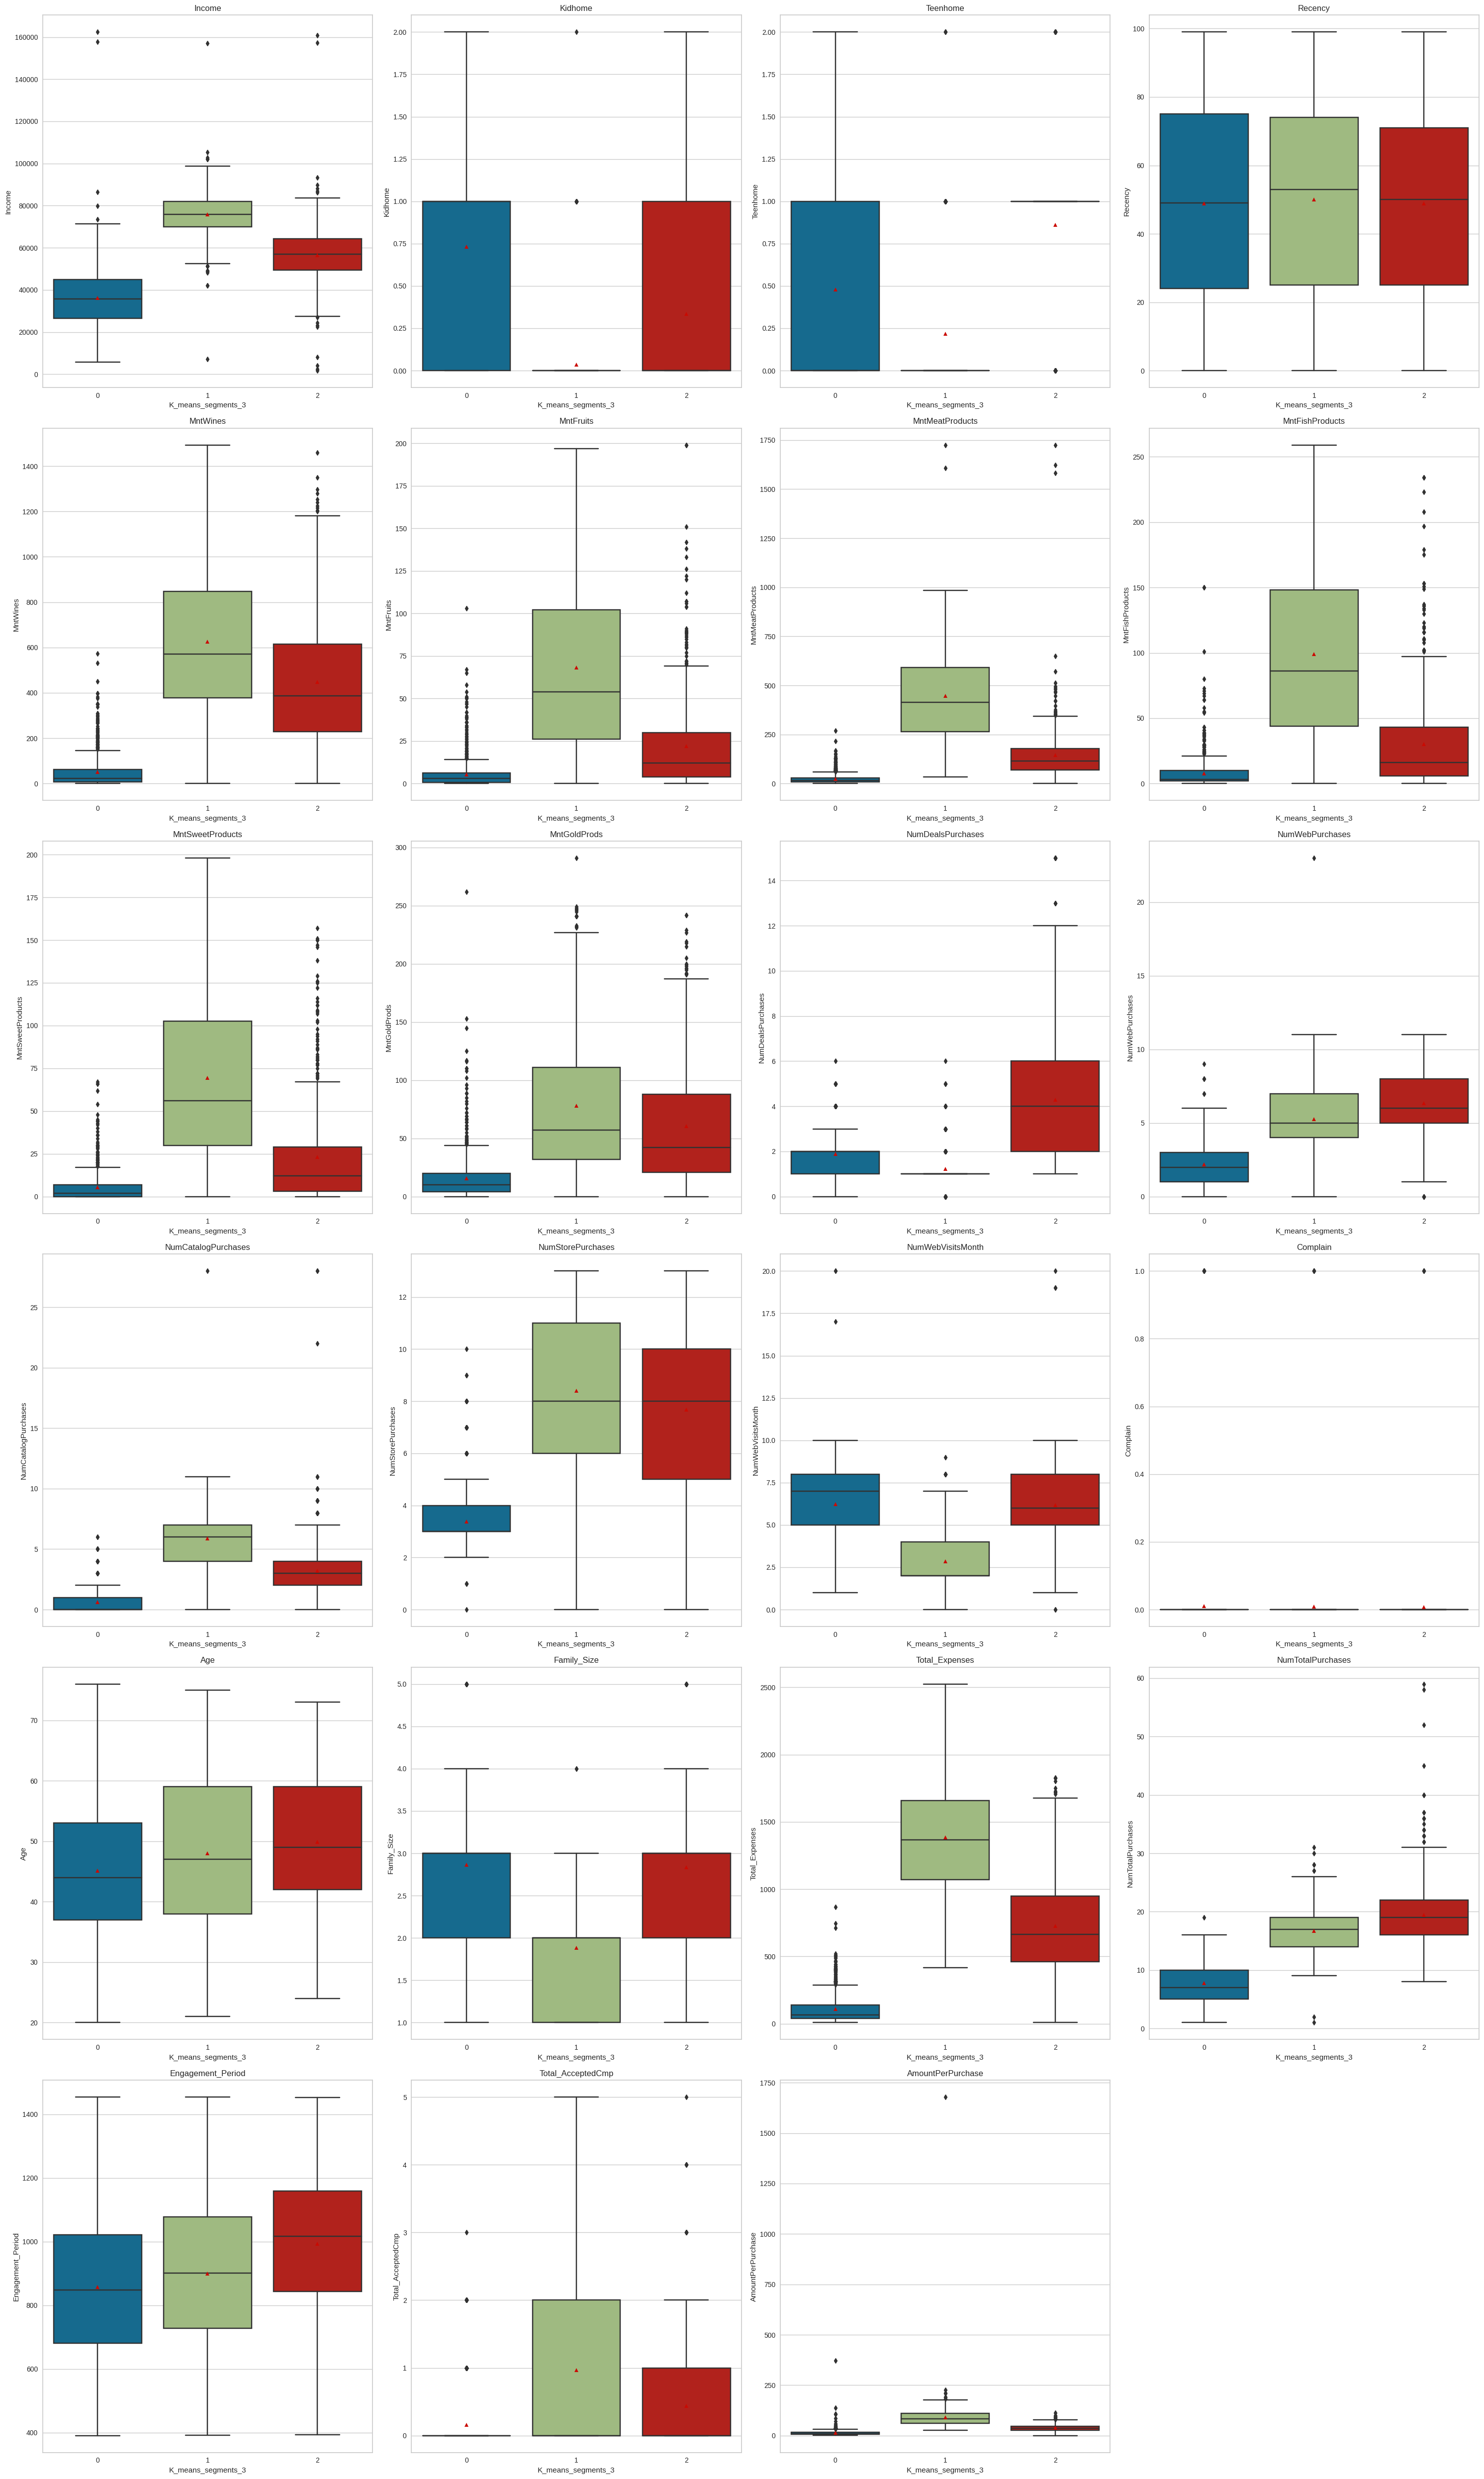

In [ ]:
# Creating boxplot for each of the variables
all_col = col_for_box

plt.figure(figsize = (30, 50))

for i, variable in enumerate(all_col):
    plt.subplot(6, 4, i + 1)

    sns.boxplot(y=df[variable], x=df['K_means_segments_3'],showmeans=True)

    plt.tight_layout()

    plt.title(variable)

plt.show()

**Observations and Insights:**

*   **Cluster 0** has the most amount of observations: 1064. It comprises the **lowest income group with the fewest amount of purchases**. They don't have any kids at home. **They do seem to make the most web visit per month but that doesn't seem to translate to any purchases made online or otherwise.**
*   **Cluster 1 is the highest income bracket that has the most purchases across all products and the largest expenses overall**, close to 1400. This cluster is also the smallest in terms of family size and kids at home - these customers are likely in the single category. **They also make the smallest amount of purchases using a discount, which is not surprising as they have the largest income and likely are not as concerned with discount offers. They also spend the most in terms of amount per purchase, close to 90 dollars, therefore they are less concerned with price per item.** Two customers from the group accepted offers in past campaigns but that number is not significant enough to matter.
*   Cluster 2 falls somwhere in the **middle income bracket** between Cluster 0 and 1. This cluster comprises of the longest-standing customers with **the most amount of web purchases. This cluster might be a great target for campaigns.**  





**Let's use K=5 now to run the same analysis to see if we can further segment the group beyond income.**

In [ ]:
# Dropping K-3
data_pca.drop(columns = ["K_means_segments_3"], axis=1, inplace=True)
data_pca["K_means_segments_3"].drop(axis=1, inplace=True)

In [ ]:
kmeans = KMeans(n_clusters = 5, random_state = 0)

kmeans.fit(data_pca)

KMeans(n_clusters=5, random_state=0)

In [ ]:
data_pca["K_means_segments_5"] = kmeans.labels_                    # Adding K-Means cluster labels to the data_pca data

df["K_means_segments_5"] = kmeans.labels_                        # Adding K-Means cluster labels to the whole data

data_model["K_means_segments_5"] = kmeans.labels_                  # Adding K-Means cluster labels to data_model

In [ ]:
# Let's check the distribution
data_model["K_means_segments_5"].value_counts()

4    908
2    376
3    373
0    347
1    224
Name: K_means_segments_5, dtype: int64

In [ ]:
# Function to visualize PCA data with clusters formed
def PCA_PLOT(X, Y, PCA, cluster):
    sns.scatterplot(x=X, y=1, data=PCA, hue=cluster)

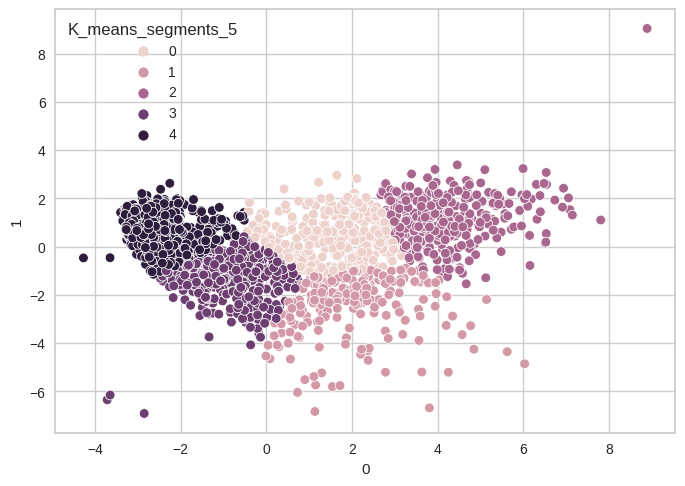

In [ ]:
PCA_PLOT(0, 1, data_pca, "K_means_segments_5")

In [ ]:
cluster_profile_KMeans_5 = df.groupby('K_means_segments_5').mean()

In [ ]:
cluster_profile_KMeans_5.style.highlight_max(color="lightgreen", axis=0)

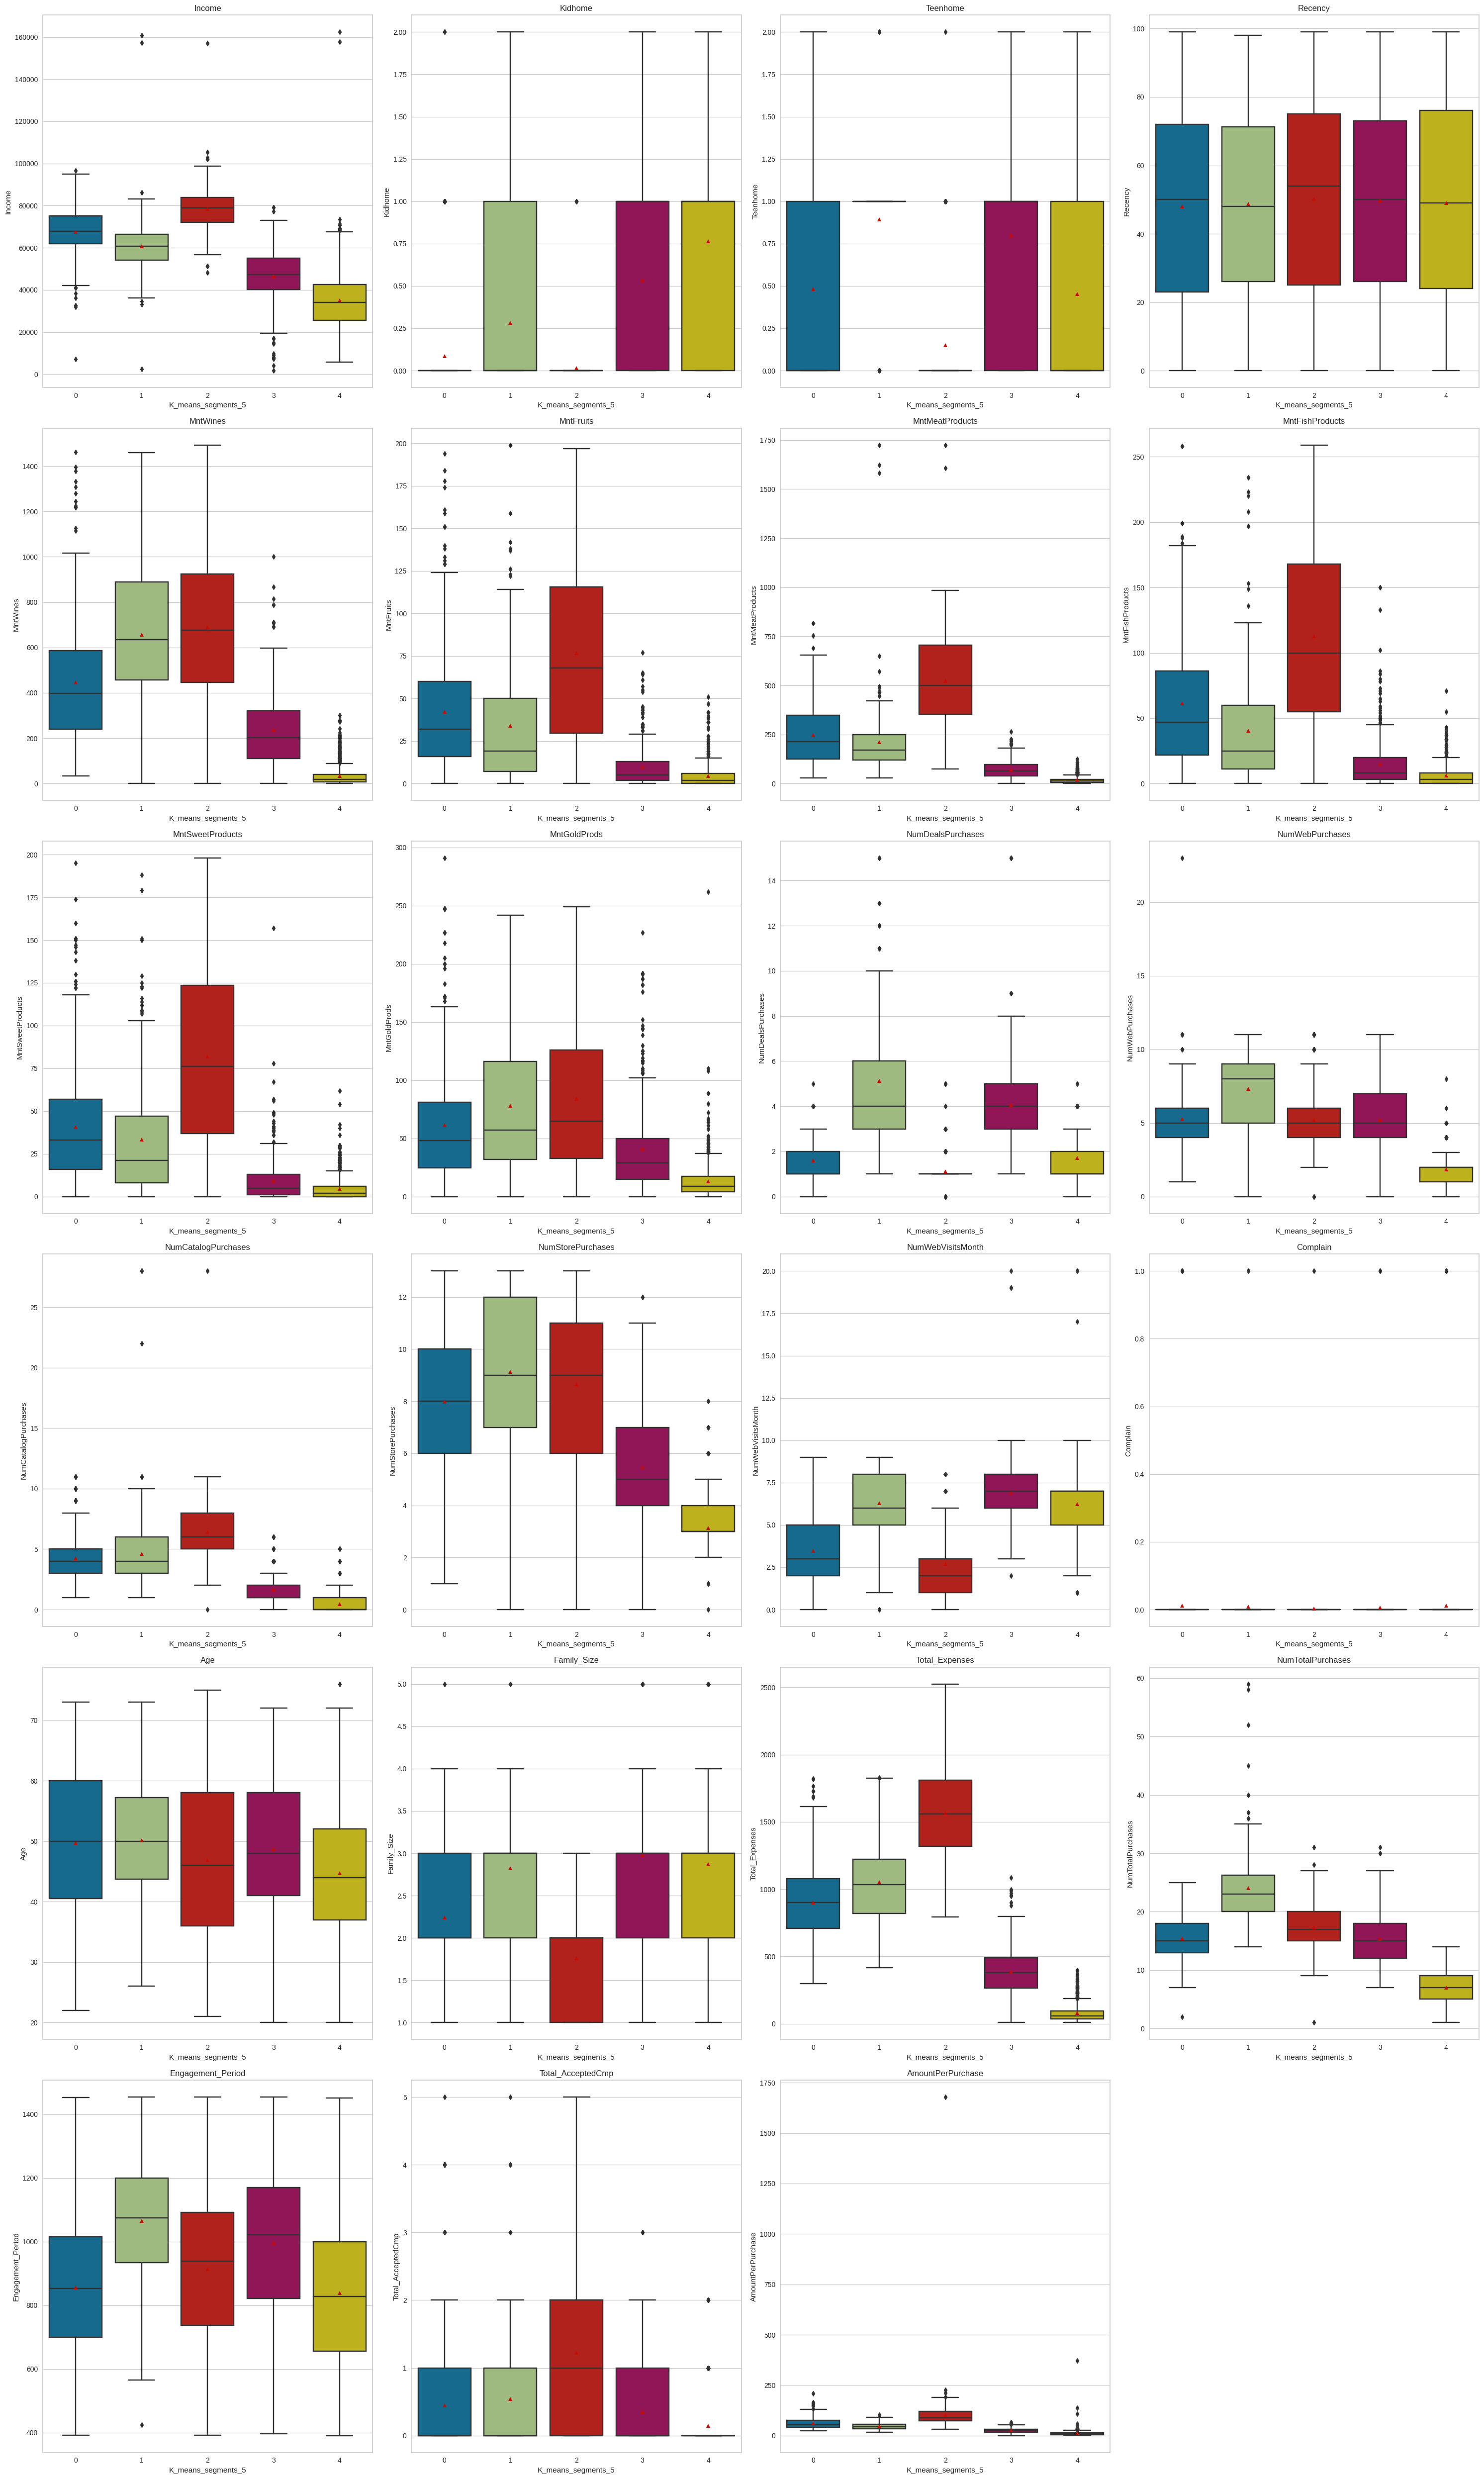

In [ ]:
# Creating boxplot for each of the variables
all_col = col_for_box

plt.figure(figsize = (30, 50))

for i, variable in enumerate(all_col):
    plt.subplot(6, 4, i + 1)

    sns.boxplot(y=df[variable], x=df['K_means_segments_5'],showmeans=True)

    plt.tight_layout()

    plt.title(variable)

plt.show()

### **Describe the characteristics of each cluster**

**Think About It:**
- Are the K-Means profiles providing any deep insights into customer purchasing behavior or which channels they are using?
- What is the next step to get more meaningful insights?

**Observations:**

Overall, using K=5 is to our advantage as we were able to see some additional trends when it came to age as well as the types of products being bought by each cluster.

**Summary of each cluster:**

*  **Cluster 0 is the second highest income group and the second biggest spender when it comes to sweets, fruits, fish, and meat products.** They are third when it comes to total expenses but tied with Cluster 3 for the number of total purchases made.
*   **Cluster 1 are the longest-standing customers and have the largest total number of purchases. They are the second highest income group.** They make a decent amount of website visits and the second most catalog purchases. However **they are the biggest spenders in store and on the web. They have utilized discounts the most when making purchasing decisions.**
*   **Cluster 2 is the highest income bracket, has the largest expenses, and spends the most amount per purchase.** Has the smallest family size, which likely means they are single. They buy the most from catalogs and make the least amount of website visits. Although not a lot, they have accepted the most offers in the past. **Given they spend the most per purchase, they are likely to be more easily persuaded to buy more expensive products and may be interested in higher-end products like organic fruits, wild caught seafood, or imported wine. They spend the most on sweets as well.**
*   Cluster 3 is the fourth highest income group. **They make the most amount of website visits and also like utilizing discounts similar to Cluster 1.**
*   **Cluster 4 is the smallest income group. They spend the least amount per purchase and in general spend the least on total purchases. This is also the youngest age bracket.** They make the least amount of purchases online and prefer the store. Both them and Cluster 4 seem to have more kids or teens at home but not convinced that this is prohibiting them from making more purchases.








## **K-Medoids**

In [ ]:
data_pca.drop(columns = ["K_means_segments_5"], axis=1, inplace=True)
df.drop(columns = "K_means_segments_5", axis=1, inplace=True)

In [ ]:
kmedo = KMedoids(n_clusters = 5, random_state = 1)           # Initializing K-Medoids with number of clusters as 5 and random_state=1

preds = clusterer.fit(data_pca)

score = silhouette_score(data_pca, clusterer.labels_, metric='euclidean')

print(score)

0.5202601161184902


In [ ]:
kmedo.fit(data_pca)

df["K_medo_segments_5"] = kmedo.predict(data_pca)                   # Predicting on data_pca and ddding K-Medoids cluster labels to the whole data

data_model["K_medo_segments_5"] = kmedo.predict(data_pca)                        # Predicting on data_pca and ddding K-Medoids cluster labels to data_model

data_pca["K_medo_segments_5"] = kmedo.predict(data_pca)                 # Predicting on data_pca and ddding K-Medoids cluster labels to data_pca

In [ ]:
data_model["K_medo_segments_5"].value_counts()

3    969
2    495
4    312
1    249
0    203
Name: K_medo_segments_5, dtype: int64

### **Visualize the clusters using PCA**

In [ ]:
# Function to visualize PCA data with clusters formed
def PCA_PLOT(X, Y, PCA, cluster):
    sns.scatterplot(x=X, y=1, data=PCA, hue=cluster)

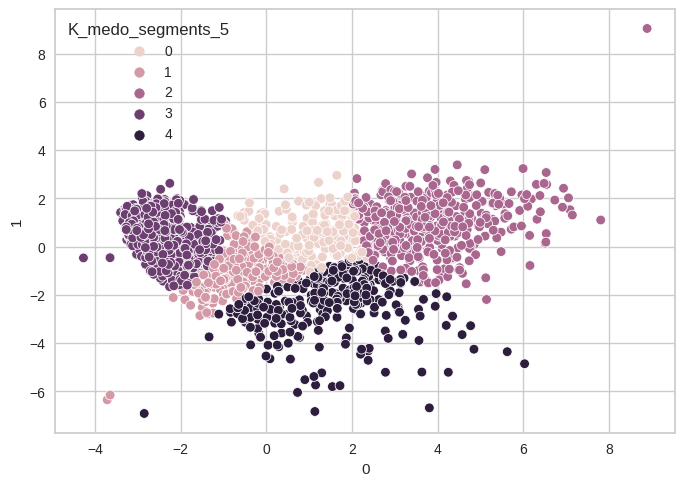

In [ ]:
PCA_PLOT(0, 1, data_pca, "K_medo_segments_5")

### **Cluster Profiling**

In [ ]:
cluster_profile_KMedo_5 = df.groupby('K_medo_segments_5').mean()

In [ ]:
cluster_profile_KMedo_5.style.highlight_max(color="lightgreen", axis=0)

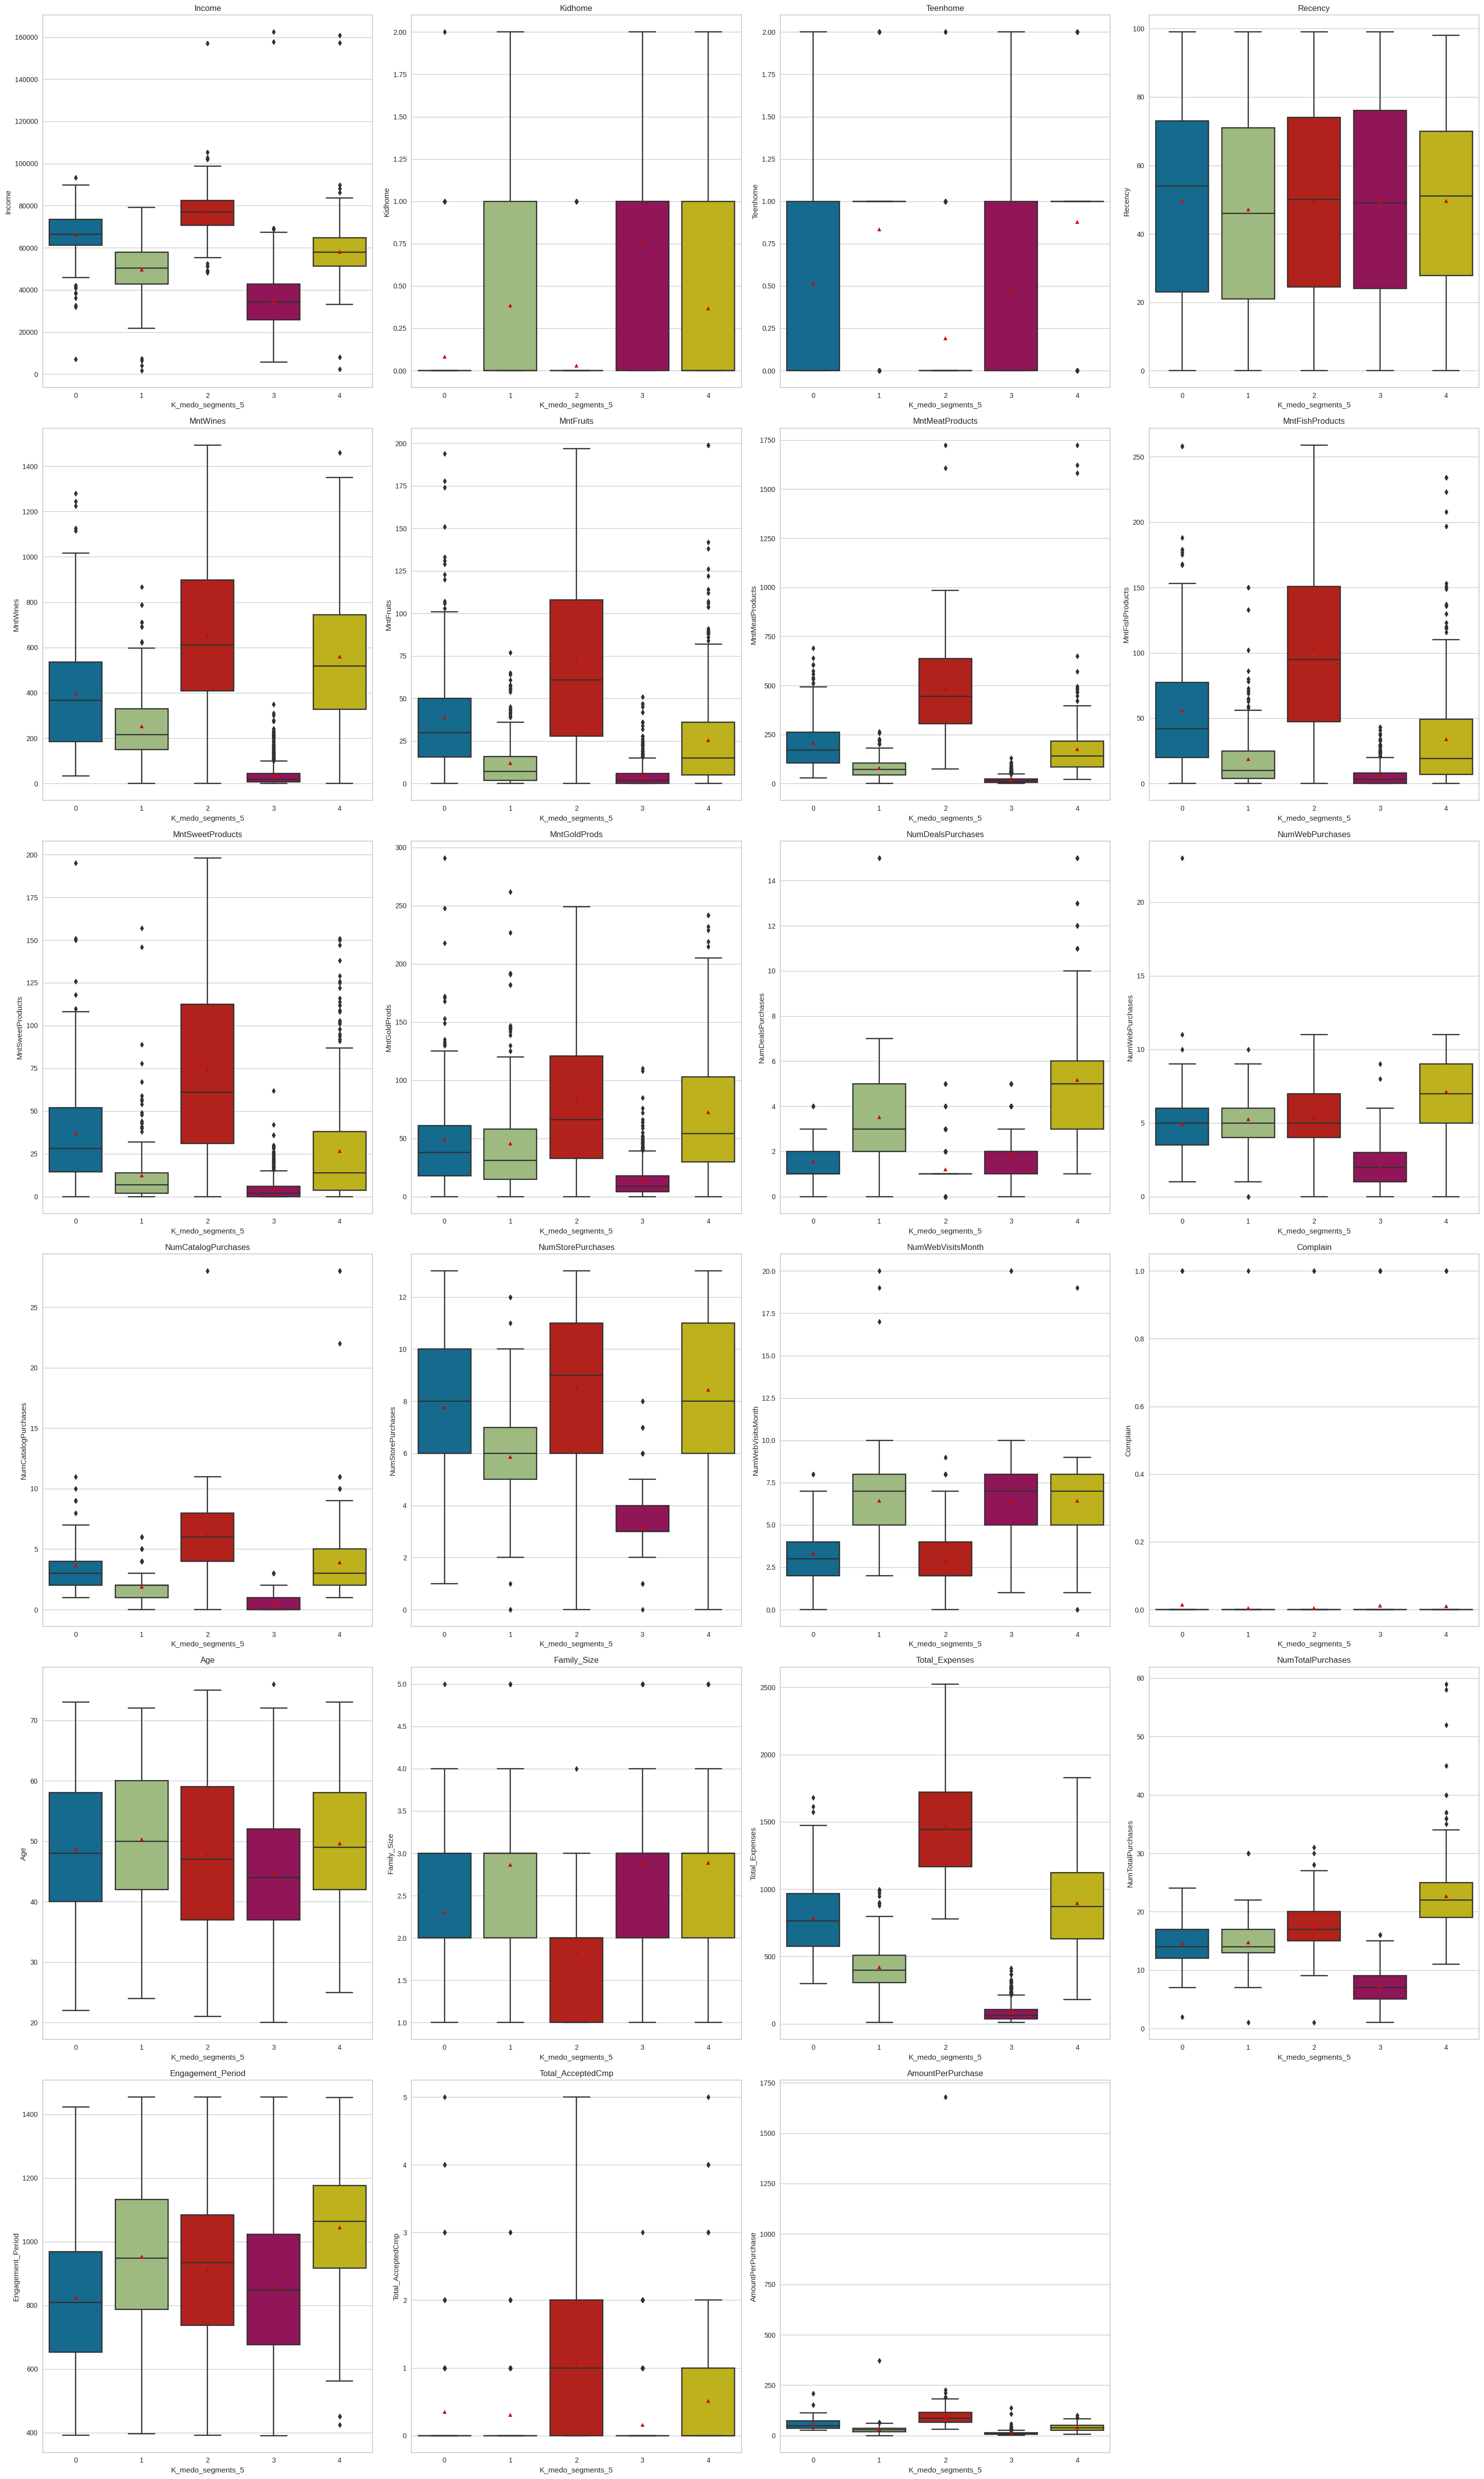

In [ ]:
# Creating boxplot for each of the variables
all_col = col_for_box

plt.figure(figsize = (30, 50))

for i, variable in enumerate(all_col):
    plt.subplot(6, 4, i + 1)

    sns.boxplot(y=df[variable], x=df['K_medo_segments_5'],showmeans=True)

    plt.tight_layout()

    plt.title(variable)

plt.show()

### **Characteristics of each cluster**

**Summary for each cluster:**

*  **Cluster 0 is the second highest income group and the second biggest spender when it comes to sweets, fruits, wine, fish, and meat products.** They are second when it comes to total expenses.
*   Cluster 1 is the fourth highest in income and come in second in terms of utilizing discounts. They also make some website visits.
*   **Cluster 2 has the highest expenses and is the highest income group. They buy the most out of all product categories but utilize the least discounts. They are much more likely to buy at store or via catalog and have the least amount of website visits.** They seem most likely to accept the first advertisement shown and have the smallest family size.
*   **Cluster 3 is the youngest in age and spend the least.**
*   **Cluster 4 is the third highest income group. They have the largest number of total purchases and come second in total expenses.** They are more likely to buy **online** and utilize the **most discounts.**




**Observations and Insights:**

## **Hierarchical Clustering**

- Find the Cophenetic correlation for different distances with different linkage methods.
- Create the dendrograms for different linkages
- Explore different linkages with each distance metric

In [ ]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average"]

high_cophenet_corr = 0                                                 # Creating a variable by assigning 0 to it
high_dm_lm = [0, 0]                                                    # Creating a list by assigning 0's to it

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(data_pca, metric=dm, method=lm)                    # Applying different linkages with different distance on data_pca
        c, coph_dists = cophenet(Z, pdist(data_pca))                   # Calculating cophenetic correlation
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:                                     # Checking if cophenetic correlation is higher than previous score
            high_cophenet_corr = c                                     # Appending to high_cophenet_corr list if it is higher
            high_dm_lm[0] = dm                                         # Appending its corresponding distance
            high_dm_lm[1] = lm                                         # Appending its corresponding method or linkage

Cophenetic correlation for Euclidean distance and single linkage is 0.786600162678354.
Cophenetic correlation for Euclidean distance and complete linkage is 0.8083275948003183.
Cophenetic correlation for Euclidean distance and average linkage is 0.8345401079514871.
Cophenetic correlation for Chebyshev distance and single linkage is 0.7350919864040056.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.6897169651180693.
Cophenetic correlation for Chebyshev distance and average linkage is 0.829607812837386.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.7678102849027534.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7249183478928031.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.7594055194726085.
Cophenetic correlation for Cityblock distance and single linkage is 0.7872430986183643.
Cophenetic correlation for Cityblock distance and complete linkage is 0.77843686368725.
Cophenetic correlat

In [ ]:
# Printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.8345401079514871, which is obtained with Euclidean distance and average linkage.


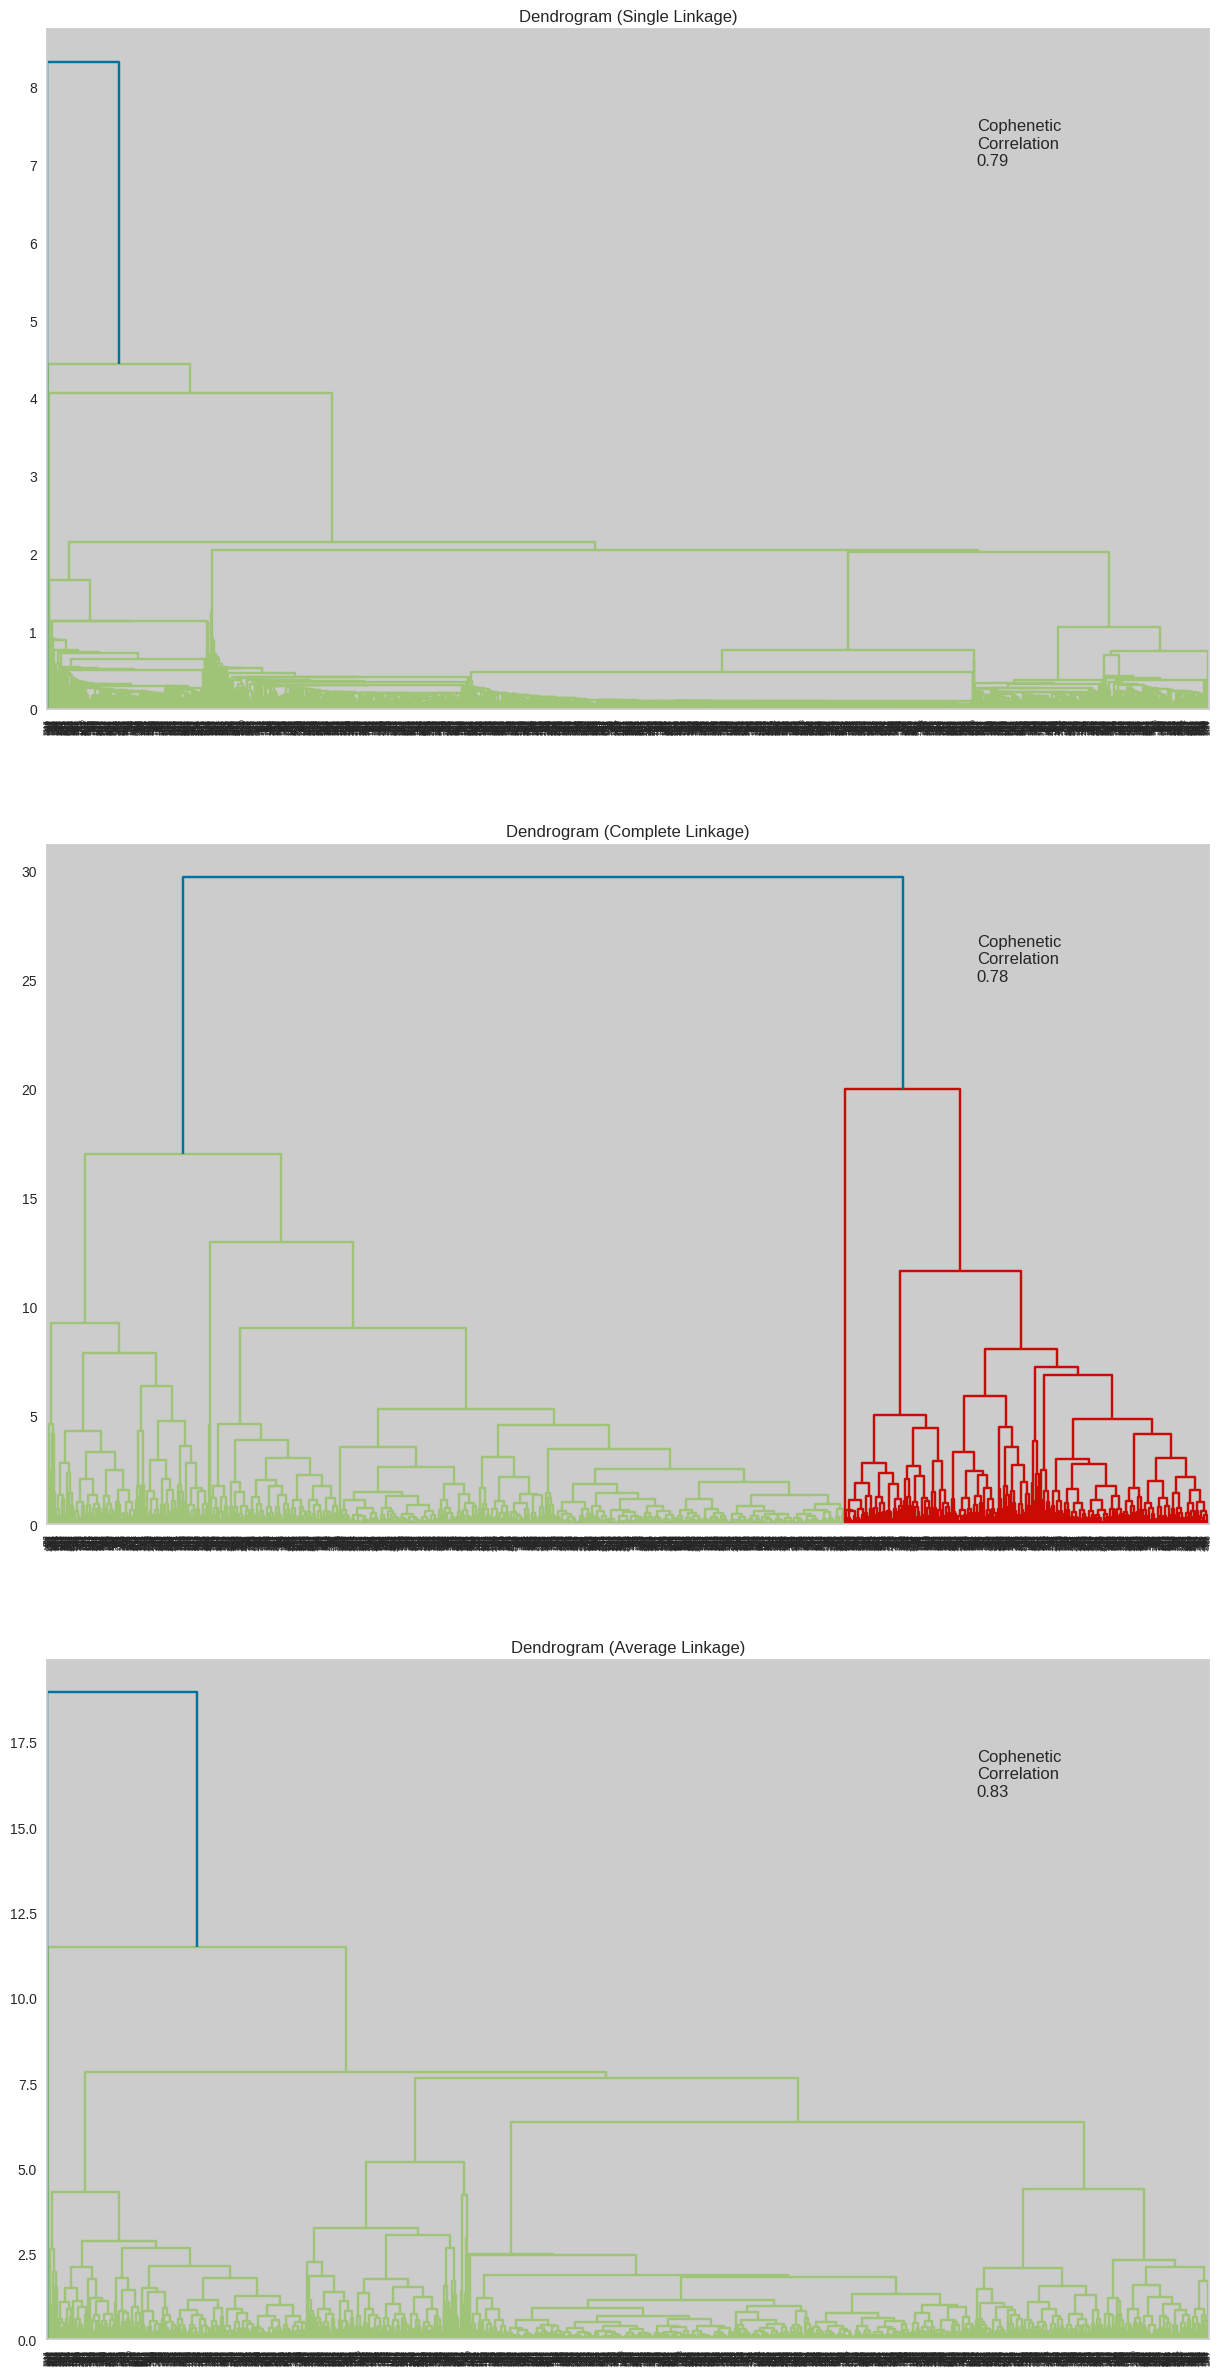

In [ ]:
# List of linkage methods
linkage_methods = ["single", "complete", "average"]

# Lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# To create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))            # Setting the plot size

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(data_pca, metric="Cityblock", method=method)                  # Measures the distances between two clusters

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")           # Title of dendrogram

    coph_corr, coph_dist = cophenet(Z, pdist(data_pca))                       # Finding cophenetic correlation for different linkages with city block distance
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

**Think about it:**

- Can we clearly decide the number of clusters based on where to cut the dendrogram horizontally?
- What is the next step in obtaining number of clusters based on the dendrogram?
- Are there any distinct clusters in any of the dendrograms?

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

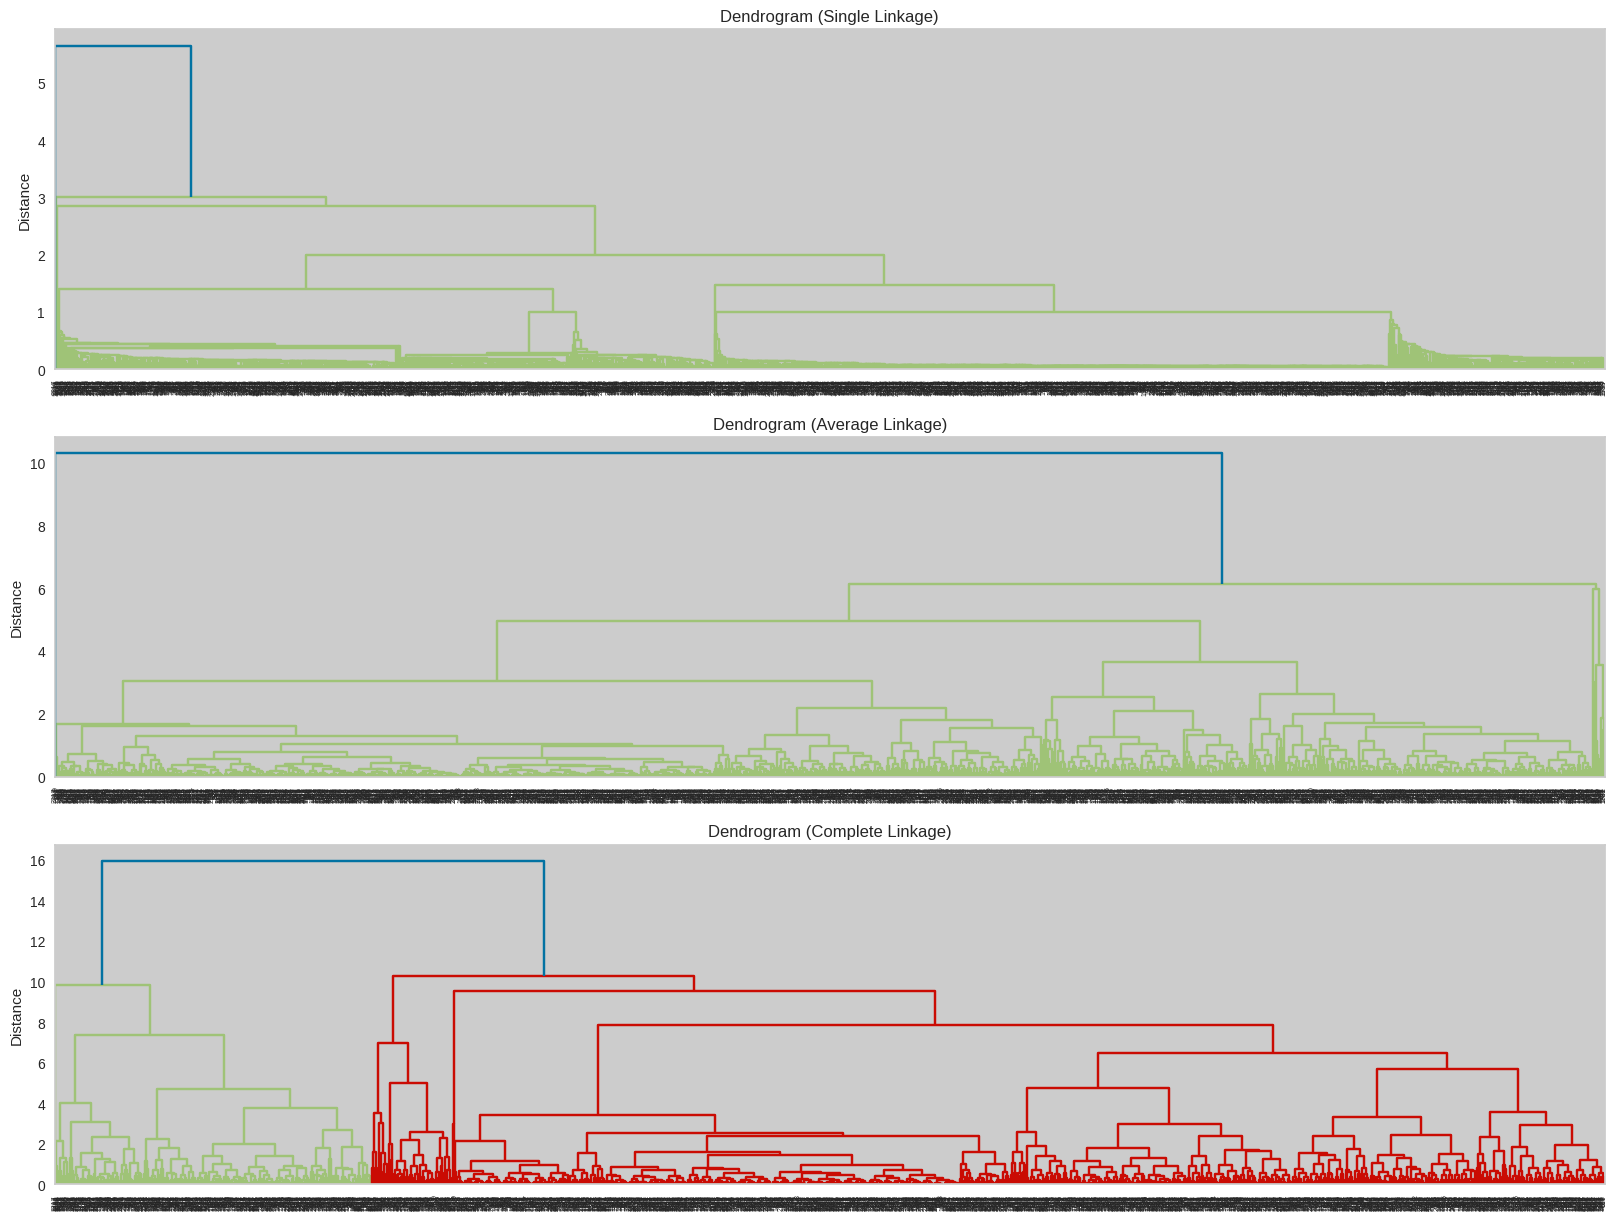

In [ ]:
# The List of all linkage methods to check
methods = ['single',
           'average',
           'complete']

# Create a subplot image
fig, axs = plt.subplots(len(methods), 1, figsize = (20, 15))

# Enumerate through the list of all methods above, get linkage and plot dendrogram
for i, method in enumerate(methods):
    Z = linkage(data_pca, metric = 'chebyshev', method = method)

    dendrogram(Z, ax = axs[i]);

    axs[i].set_title(f'Dendrogram ({method.capitalize()} Linkage)')

    axs[i].set_ylabel('Distance')

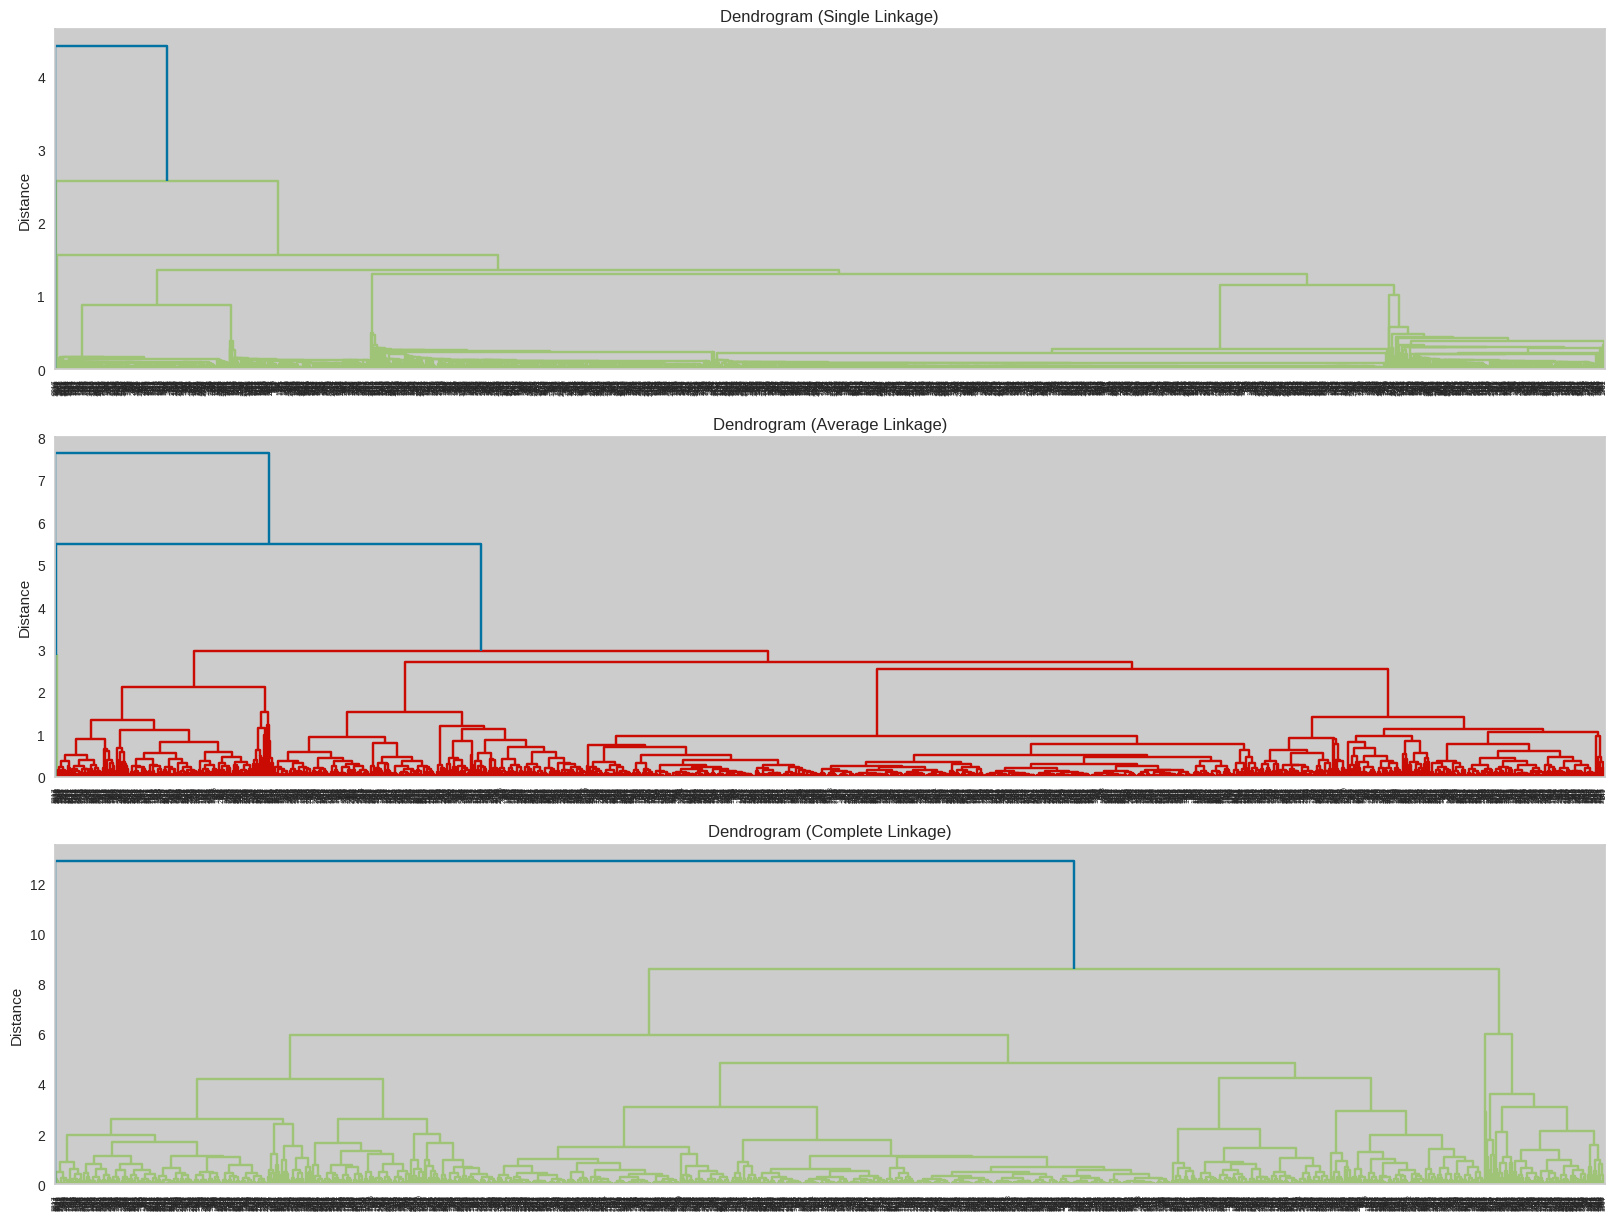

In [ ]:
# The List of all linkage methods to check
methods = ['single',
           'average',
           'complete']

# Create a subplot image
fig, axs = plt.subplots(len(methods), 1, figsize = (20, 15))

# Enumerate through the list of all methods above, get linkage and plot dendrogram
for i, method in enumerate(methods):
    Z = linkage(data_pca, metric = 'mahalanobis', method = method)

    dendrogram(Z, ax = axs[i]);

    axs[i].set_title(f'Dendrogram ({method.capitalize()} Linkage)')

    axs[i].set_ylabel('Distance')

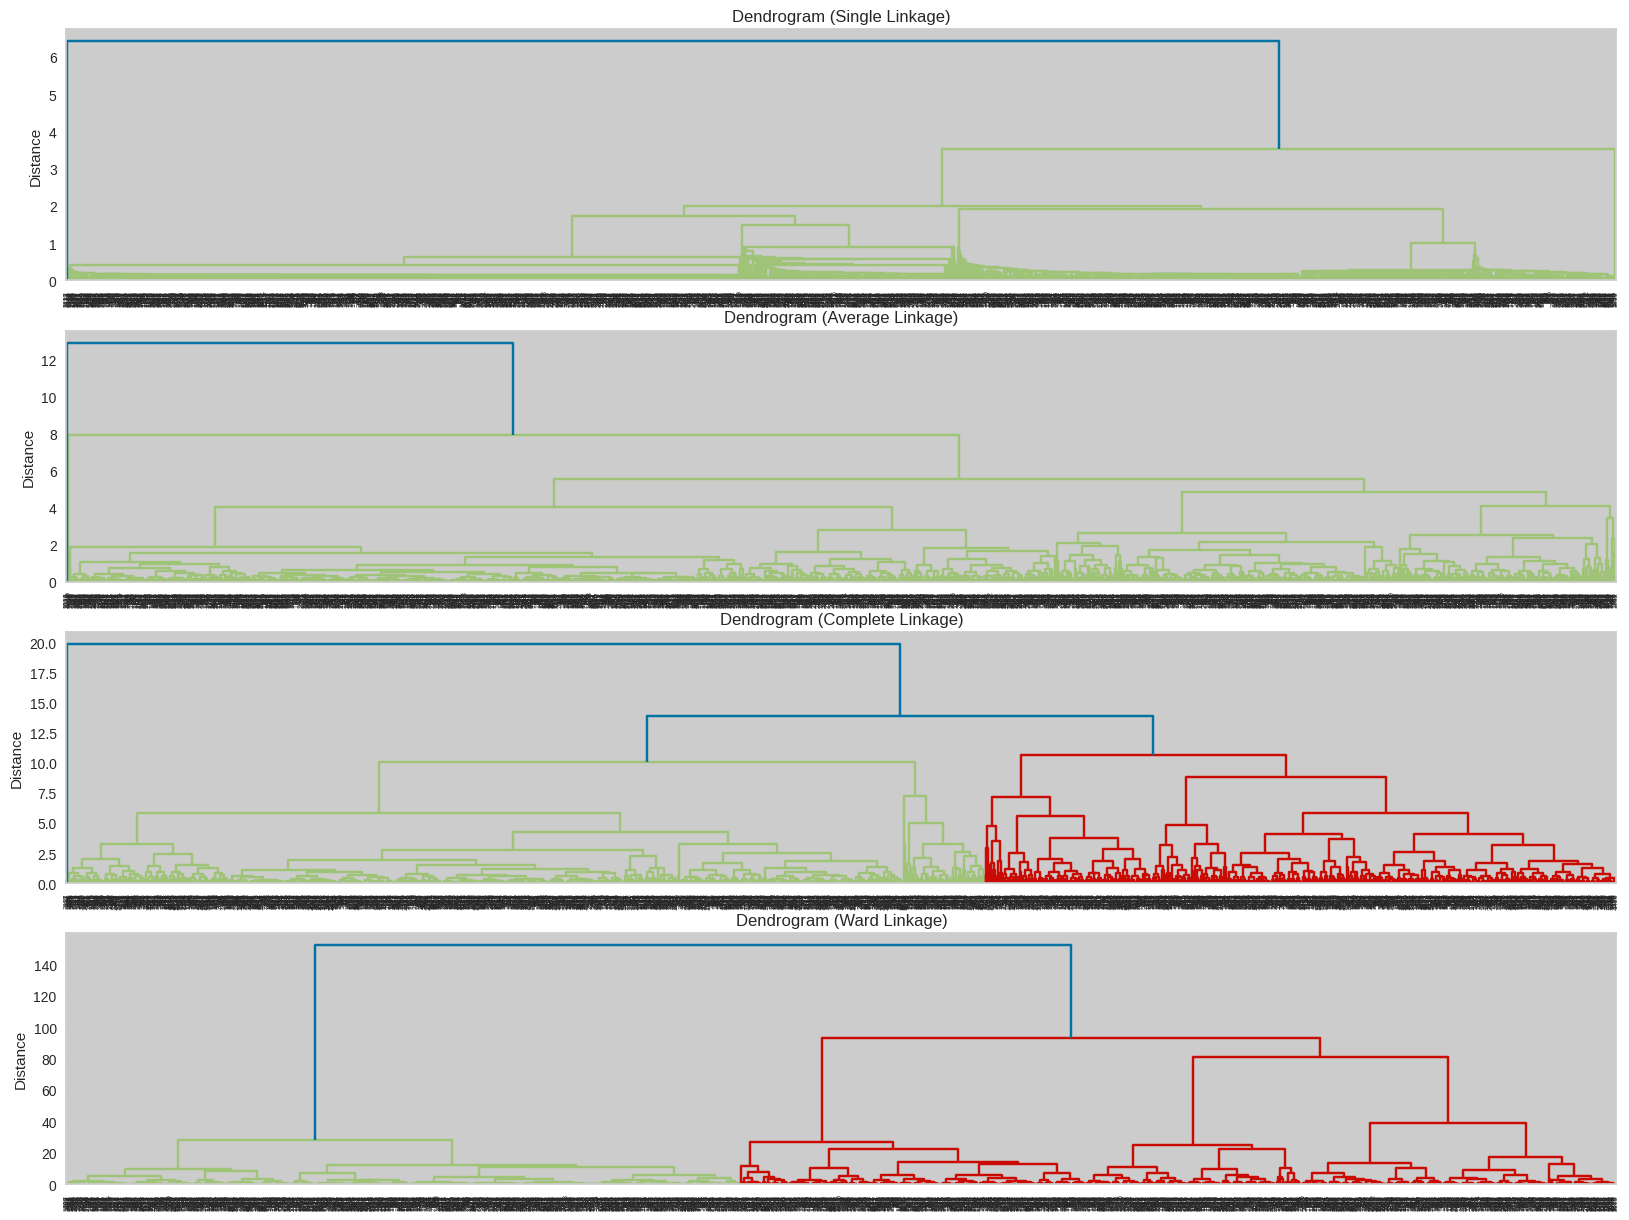

In [ ]:
# The List of all linkage methods to check
methods = ['single',
           'average',
           'complete',
           'ward']

# Create a subplot image
fig, axs = plt.subplots(len(methods), 1, figsize = (20, 15))

# Enumerate through the list of all methods above, get linkage and plot dendrogram
for i, method in enumerate(methods):
    Z = linkage(data_pca, metric = 'euclidean', method = method)

    dendrogram(Z, ax = axs[i]);

    axs[i].set_title(f'Dendrogram ({method.capitalize()} Linkage)')

    axs[i].set_ylabel('Distance')

Complete linkage gives better separated clusters. And the Ward linkage gives us the best result. **We should use Ward linkage for our affinity, if we were to draw a horizontal line through it, we'd get 4 different clusters.**

In [ ]:
data_pca.drop(columns = ["K_medo_segments_5"], axis=1, inplace=True)
df.drop(columns = "K_medo_segments_5", axis=1, inplace=True)

In [ ]:
# Initialize Agglomerative Clustering with affinity (distance) as Euclidean, linkage as 'Ward' with clusters=3
HCmodel = AgglomerativeClustering(n_clusters=3, affinity= 'euclidean', linkage='ward',)

# Fit on data_pca
HCmodel.fit(data_pca)

AgglomerativeClustering(affinity='euclidean', n_clusters=3)

In [ ]:
HCmodel.fit(data_pca)

data_pca["HCLabels"] = HCmodel.labels_

df["HCLabels"] = HCmodel.labels_

data_model["HCLabels"] = HCmodel.labels_

In [ ]:
data_model.HCLabels.value_counts()

0    1188
1     561
2     479
Name: HCLabels, dtype: int64

### **Visualize the clusters using PCA**

In [ ]:
# Function to visualize PCA data with clusters formed
def PCA_PLOT(X, Y, PCA, cluster):
    sns.scatterplot(x=X, y=1, data=PCA, hue=cluster)

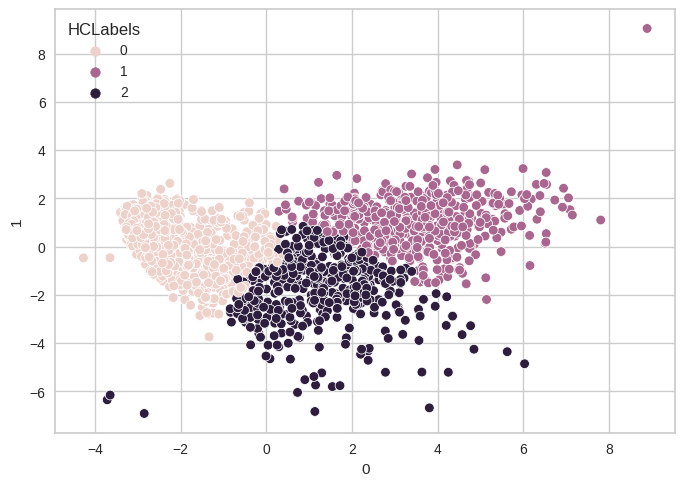

In [ ]:
PCA_PLOT(0, 1, data_pca, "HCLabels")

In [ ]:
cluster_profile_HCLabels = df.groupby('HCLabels').mean()

In [ ]:
cluster_profile_HCLabels.style.highlight_max(color="lightgreen", axis=0)

### **Cluster Profiling**

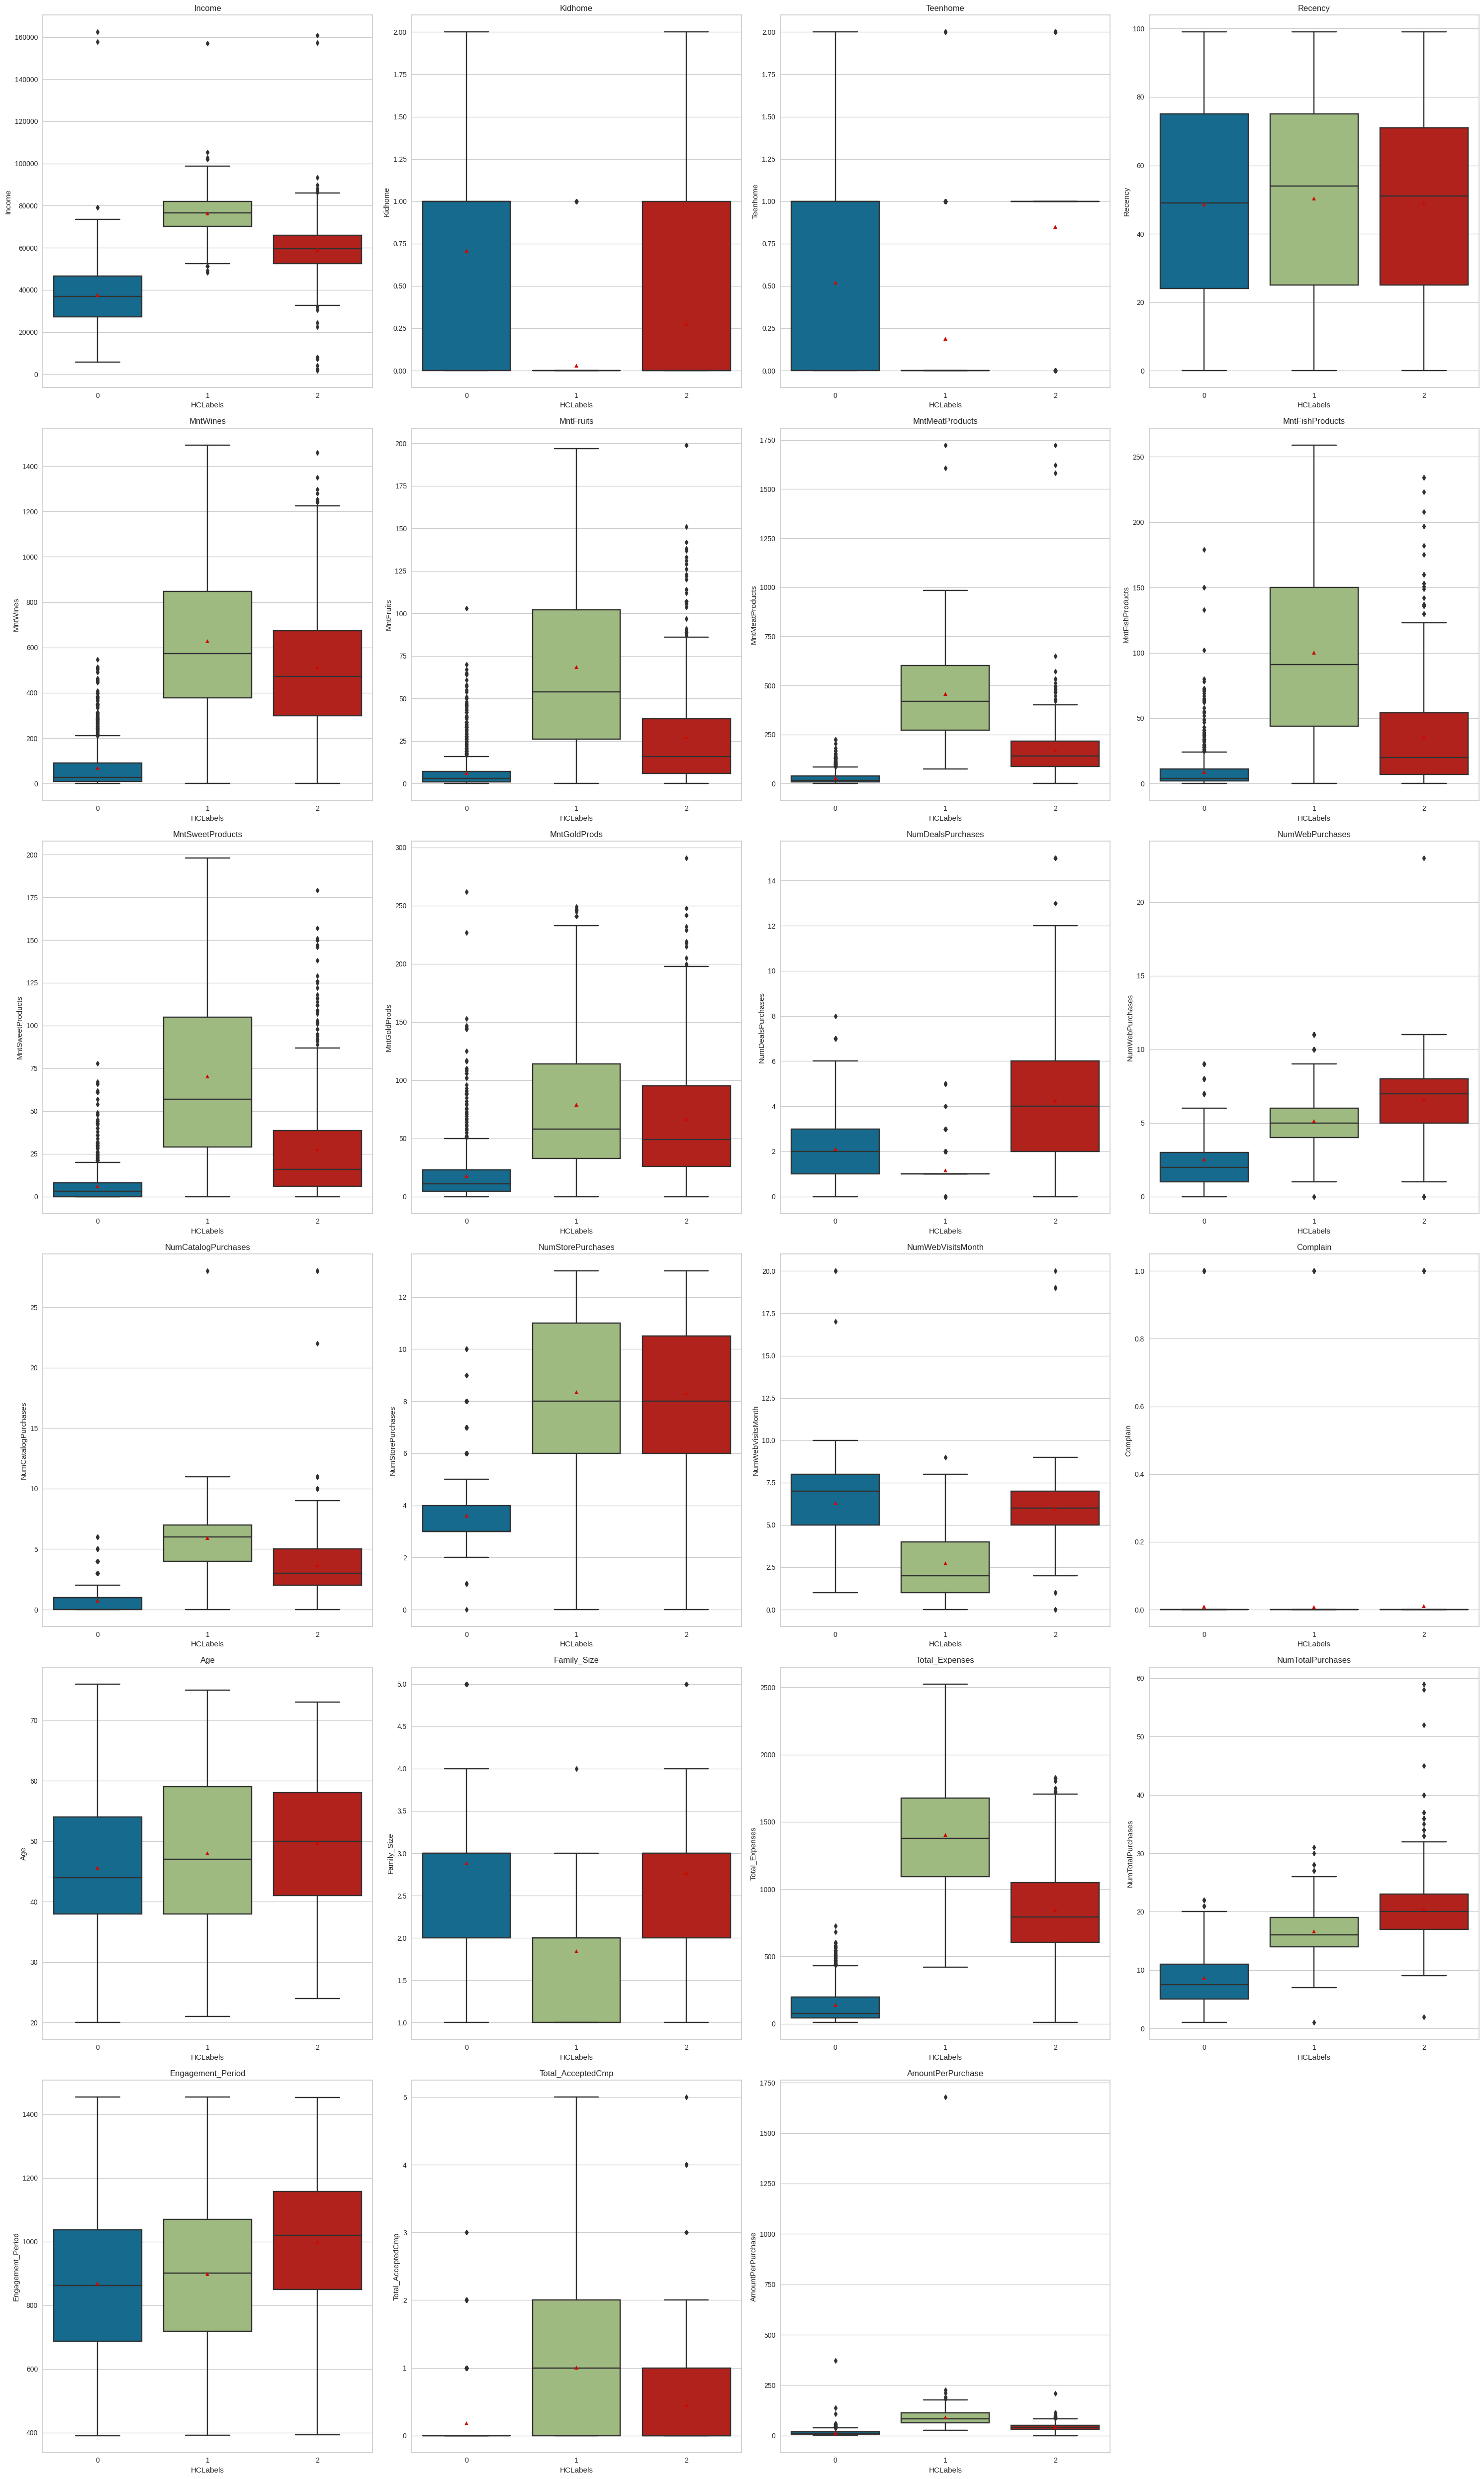

In [ ]:
# Creating boxplot for each of the variables
all_col = col_for_box

plt.figure(figsize = (30, 50))

for i, variable in enumerate(all_col):
    plt.subplot(6, 4, i + 1)

    sns.boxplot(y=df[variable], x=df['HCLabels'],showmeans=True)

    plt.tight_layout()

    plt.title(variable)

plt.show()

### **Characteristics of each cluster**

**Summary of each cluster:**

*   Cluster 0 has the **smallest income** and are the **youngest** bracket group.
*   **Cluster 1 is the largest income with the largest total expenses across all products, smallest family size, and little website presence.** They are least likely to utilize discounts.
*   **Cluster 2 is in the middle income bracket. They have the largest total number of purchases and come second in terms of expenses.** They are much more to utilize discounts and make web purchases.


## **DBSCAN**

DBSCAN is a very powerful algorithm for finding high-density clusters, but the problem is determining the best set of hyperparameters to use with it. It includes two hyperparameters, `eps`, and `min samples`.

Since it is an unsupervised algorithm, you have no control over it, unlike a supervised learning algorithm, which allows you to test your algorithm on a validation set. The approach we can follow is basically trying out a bunch of different combinations of values and finding the silhouette score for each of them.

In [ ]:
data_pca.drop(columns = ["HCLabels"], axis=1, inplace=True)
df.drop(columns = "HCLabels", axis=1, inplace=True)

In [ ]:
# Initializing lists
eps_value = [2,3]                       # Taking random eps value
min_sample_values = [6,20]              # Taking random min_sample value

# Creating a dictionary for each of the values in eps_value with min_sample_values
res = {eps_value[i]: min_sample_values for i in range(len(eps_value))}

In [ ]:
# Finding the silhouette_score for each of the combinations
high_silhouette_avg = 0                                               # Assigning 0 to the high_silhouette_avg variable
high_i_j = [0, 0]                                                     # Assigning 0's to the high_i_j list
key = res.keys()                                                      # Assigning dictionary keys to a variable called key
for i in key:
    z = res[i]                                                        # Assigning dictionary values of each i to z
    for j in z:
        db = DBSCAN(eps=i, min_samples=j).fit(data_pca)               # Applying DBSCAN to each of the combination in dictionary
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_
        silhouette_avg = silhouette_score(data_pca, labels)           # Finding silhouette score
        print(
            "For eps value =" + str(i),
            "For min sample =" + str(j),
            "The average silhoutte_score is :",
            silhouette_avg,                                          # Printing the silhouette score for each of the combinations
        )
        if high_silhouette_avg < silhouette_avg:                     # If the silhouette score is greater than 0 or the previous score, it will get appended to the high_silhouette_avg list with its combination of i and j
            high_i_j[0] = i
            high_i_j[1] = j

For eps value =2 For min sample =6 The average silhoutte_score is : 0.5943701101872357
For eps value =2 For min sample =20 The average silhoutte_score is : 0.5943701101872357
For eps value =3 For min sample =6 The average silhoutte_score is : 0.5943701101872357
For eps value =3 For min sample =20 The average silhoutte_score is : 0.5943701101872357


In [ ]:
# Printing the highest silhouette score
print("Highest_silhoutte_avg is {} for eps = {} and min sample = {}".format(high_silhouette_avg, high_i_j[0], high_i_j[1]))

Highest_silhoutte_avg is 0 for eps = 3 and min sample = 20


### **Apply DBSCAN for the best hyperparameter and visualize the clusters from PCA**

In [ ]:
dbs = DBSCAN(eps = 1)

df['DBSLabels'] = dbs.fit_predict(data_pca)

data_model['DBSLabels'] = dbs.fit_predict(data_pca)

data_pca['DBSLabels'] = dbs.fit_predict(data_pca)

In [ ]:
data_model['DBSLabels'].value_counts()

 0    2220
-1       8
Name: DBSLabels, dtype: int64

In [ ]:
# Function to visualize PCA data with clusters formed
def PCA_PLOT(X, Y, PCA, cluster):
    sns.scatterplot(x=X, y=1, data=PCA, hue=cluster)

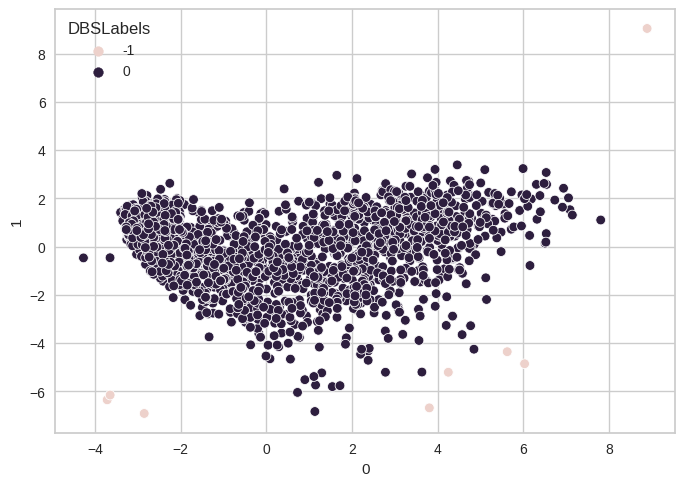

In [ ]:
PCA_PLOT(0, 1, data_pca, "DBSLabels")

In [ ]:
cluster_profile_DBSLabels = df.groupby('DBSLabels').mean()

In [ ]:
cluster_profile_DBSLabels.style.highlight_max(color="lightgreen", axis=0)

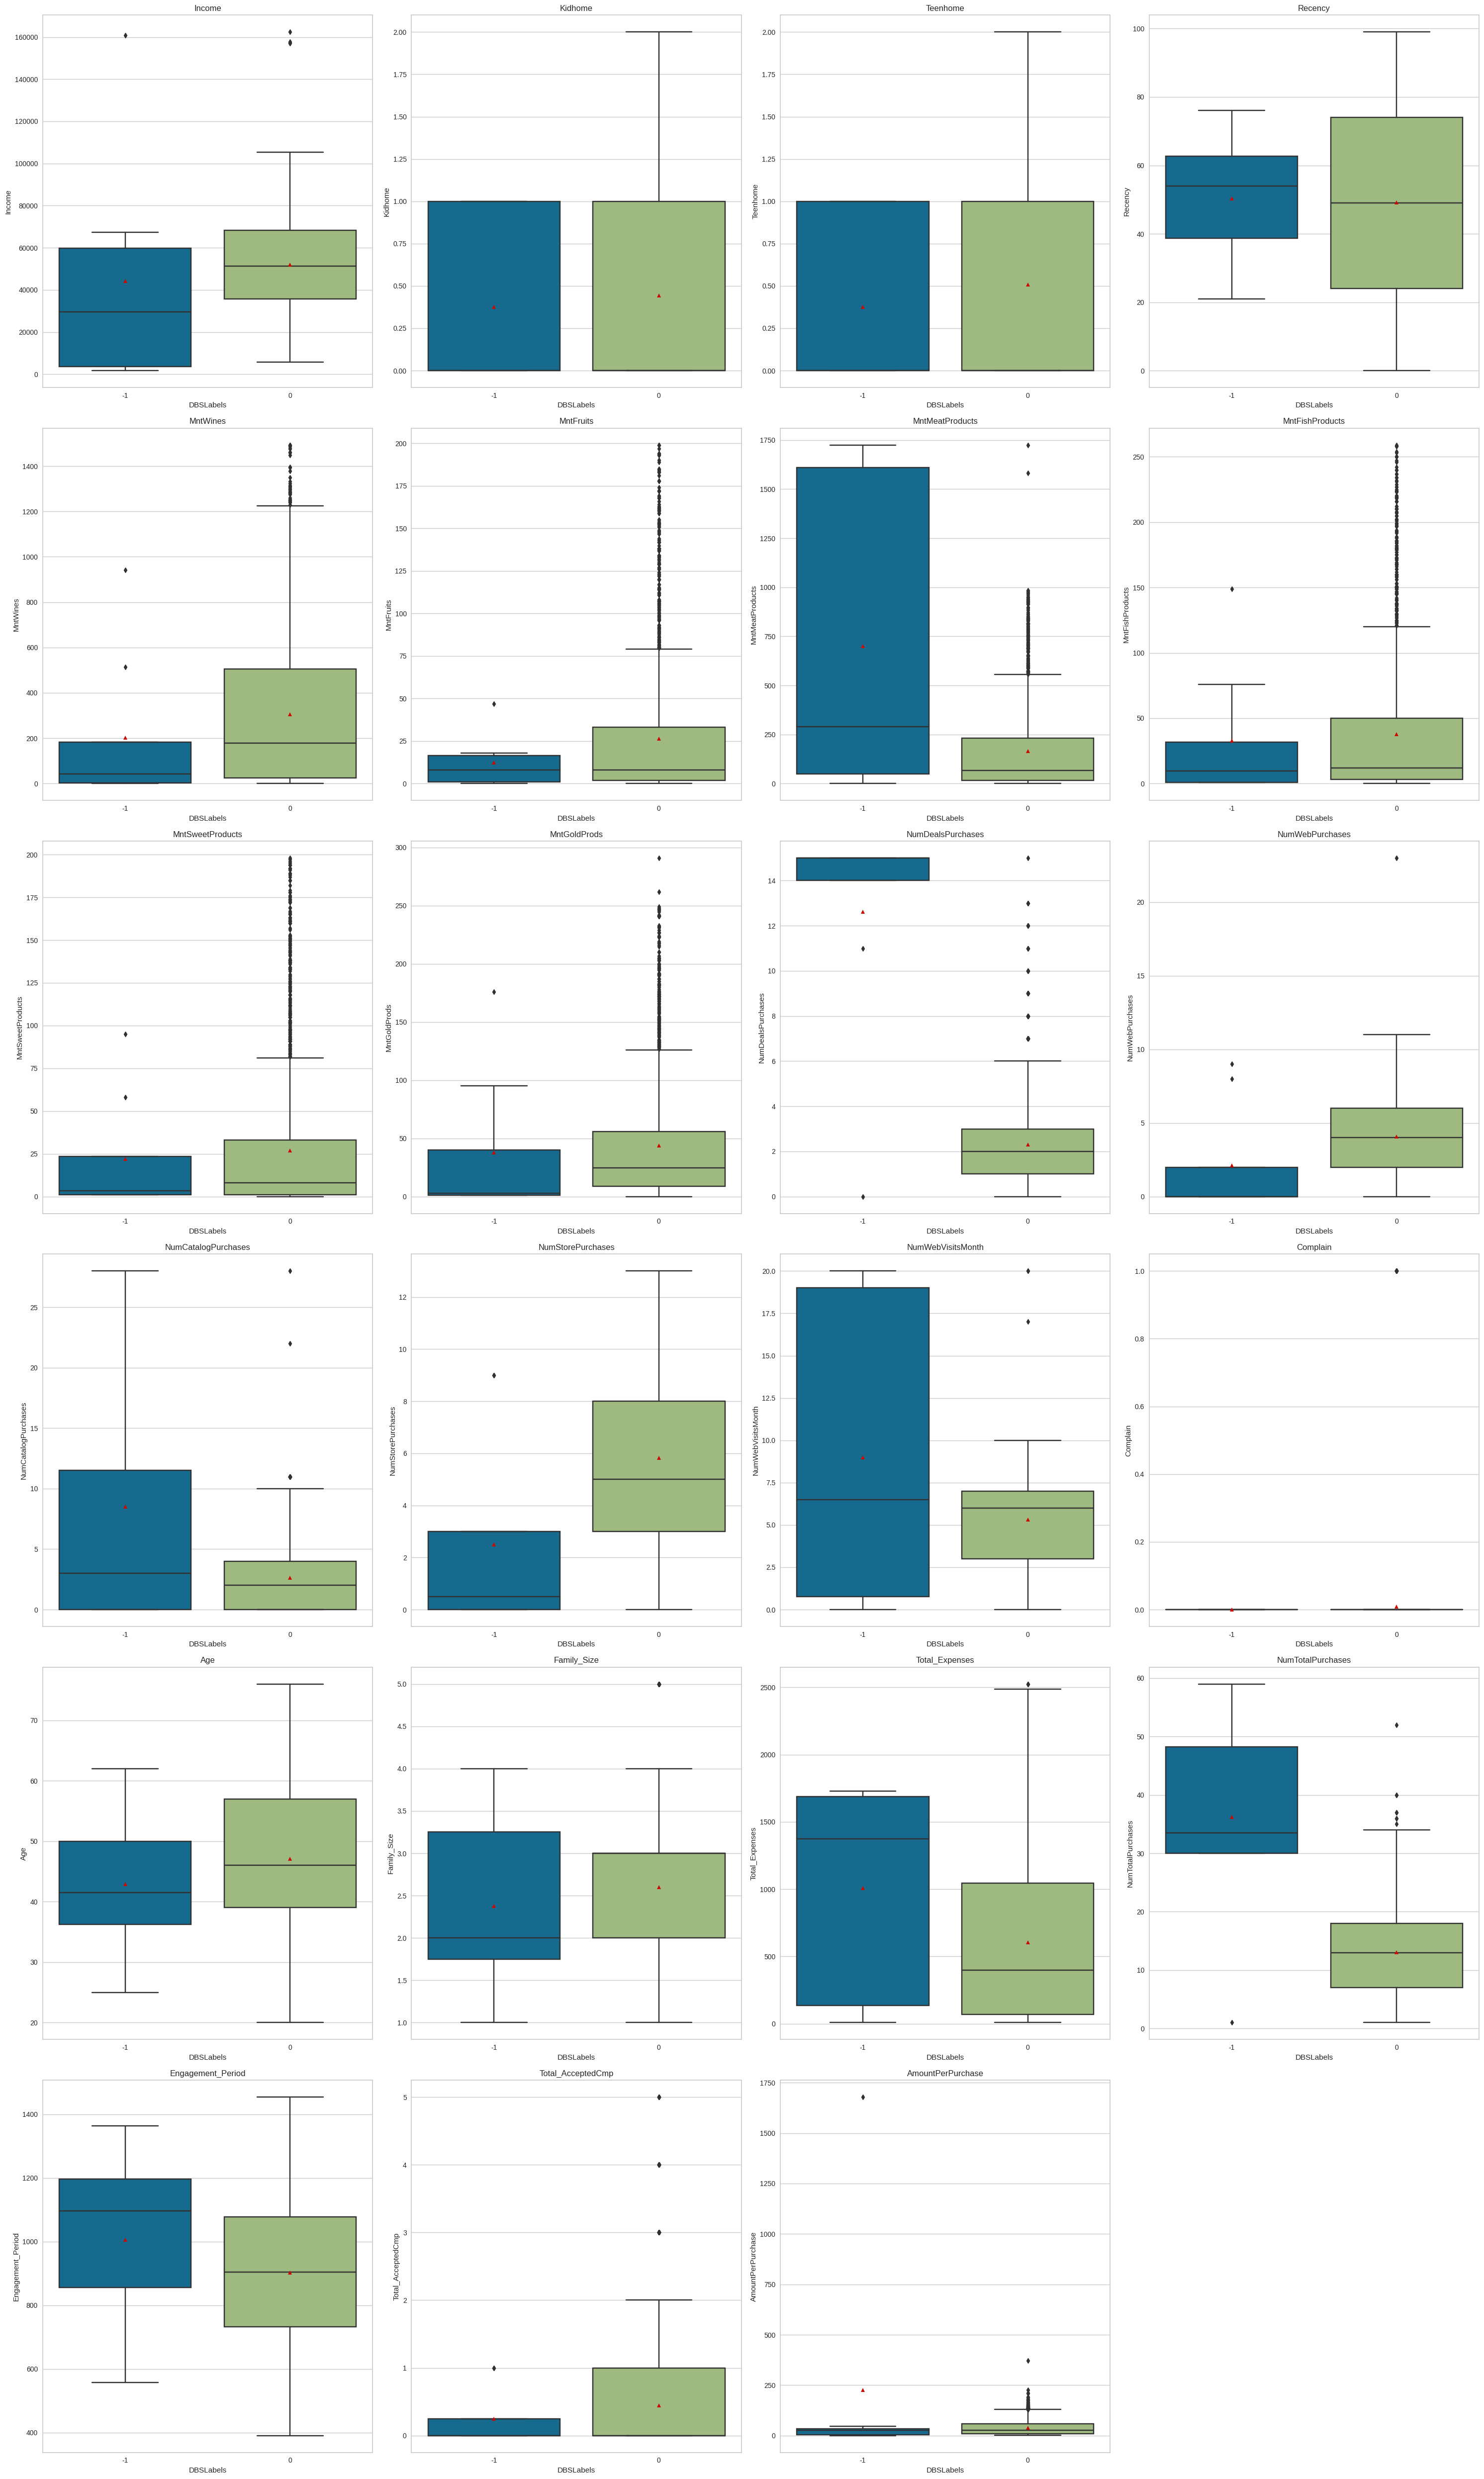

In [ ]:
# Creating boxplot for each of the variables
all_col = col_for_box

plt.figure(figsize = (30, 50))

for i, variable in enumerate(all_col):
    plt.subplot(6, 4, i + 1)

    sns.boxplot(y=df[variable], x=df['DBSLabels'],showmeans=True)

    plt.tight_layout()

    plt.title(variable)

plt.show()

**Observations and Insights:**

**Think about it:**

- Changing the eps and min sample values will result in different DBSCAN results? Can we try more value for eps and min_sample?

### **Characteristics of each cluster**

**Summary of each cluster:**

We would have to experiment with different eps or min sample values to see if DBSCAN could produce a better distribution of cluster profiles. The two current clusters do not provide concrete information.



## **Gaussian Mixture Model**

In [ ]:
data_pca.drop(columns = ["DBSLabels"], axis=1, inplace=True)
df.drop(columns = "DBSLabels", axis=1, inplace=True)

In [ ]:
gmm = GaussianMixture(n_components = 5, random_state = 1)

gmm.fit(data_pca)

GaussianMixture(n_components=5, random_state=1)

In [ ]:
df["GmmLabels"] = gmm.predict(data_pca)

data_model["GmmLabels"] = gmm.predict(data_pca)

data_pca["GmmLabels"] = gmm.predict(data_pca)

In [ ]:
data_model.GmmLabels.value_counts()

1    805
4    505
3    395
2    361
0    162
Name: GmmLabels, dtype: int64

**Observations and Insights:**

### **Visualize the clusters using PCA**

In [ ]:
# Function to visualize PCA data with clusters formed
def PCA_PLOT(X, Y, PCA, cluster):
    sns.scatterplot(x=X, y=1, data=PCA, hue=cluster)

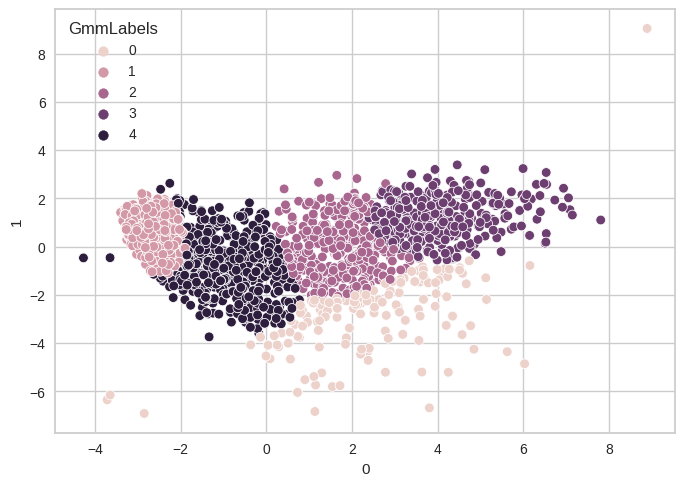

In [ ]:
PCA_PLOT(0, 1, data_pca, "GmmLabels")

In [ ]:
cluster_profile_GmmLabels = df.groupby('GmmLabels').mean()

In [ ]:
cluster_profile_GmmLabels.style.highlight_max(color="lightgreen", axis=0)

### **Cluster Profiling**

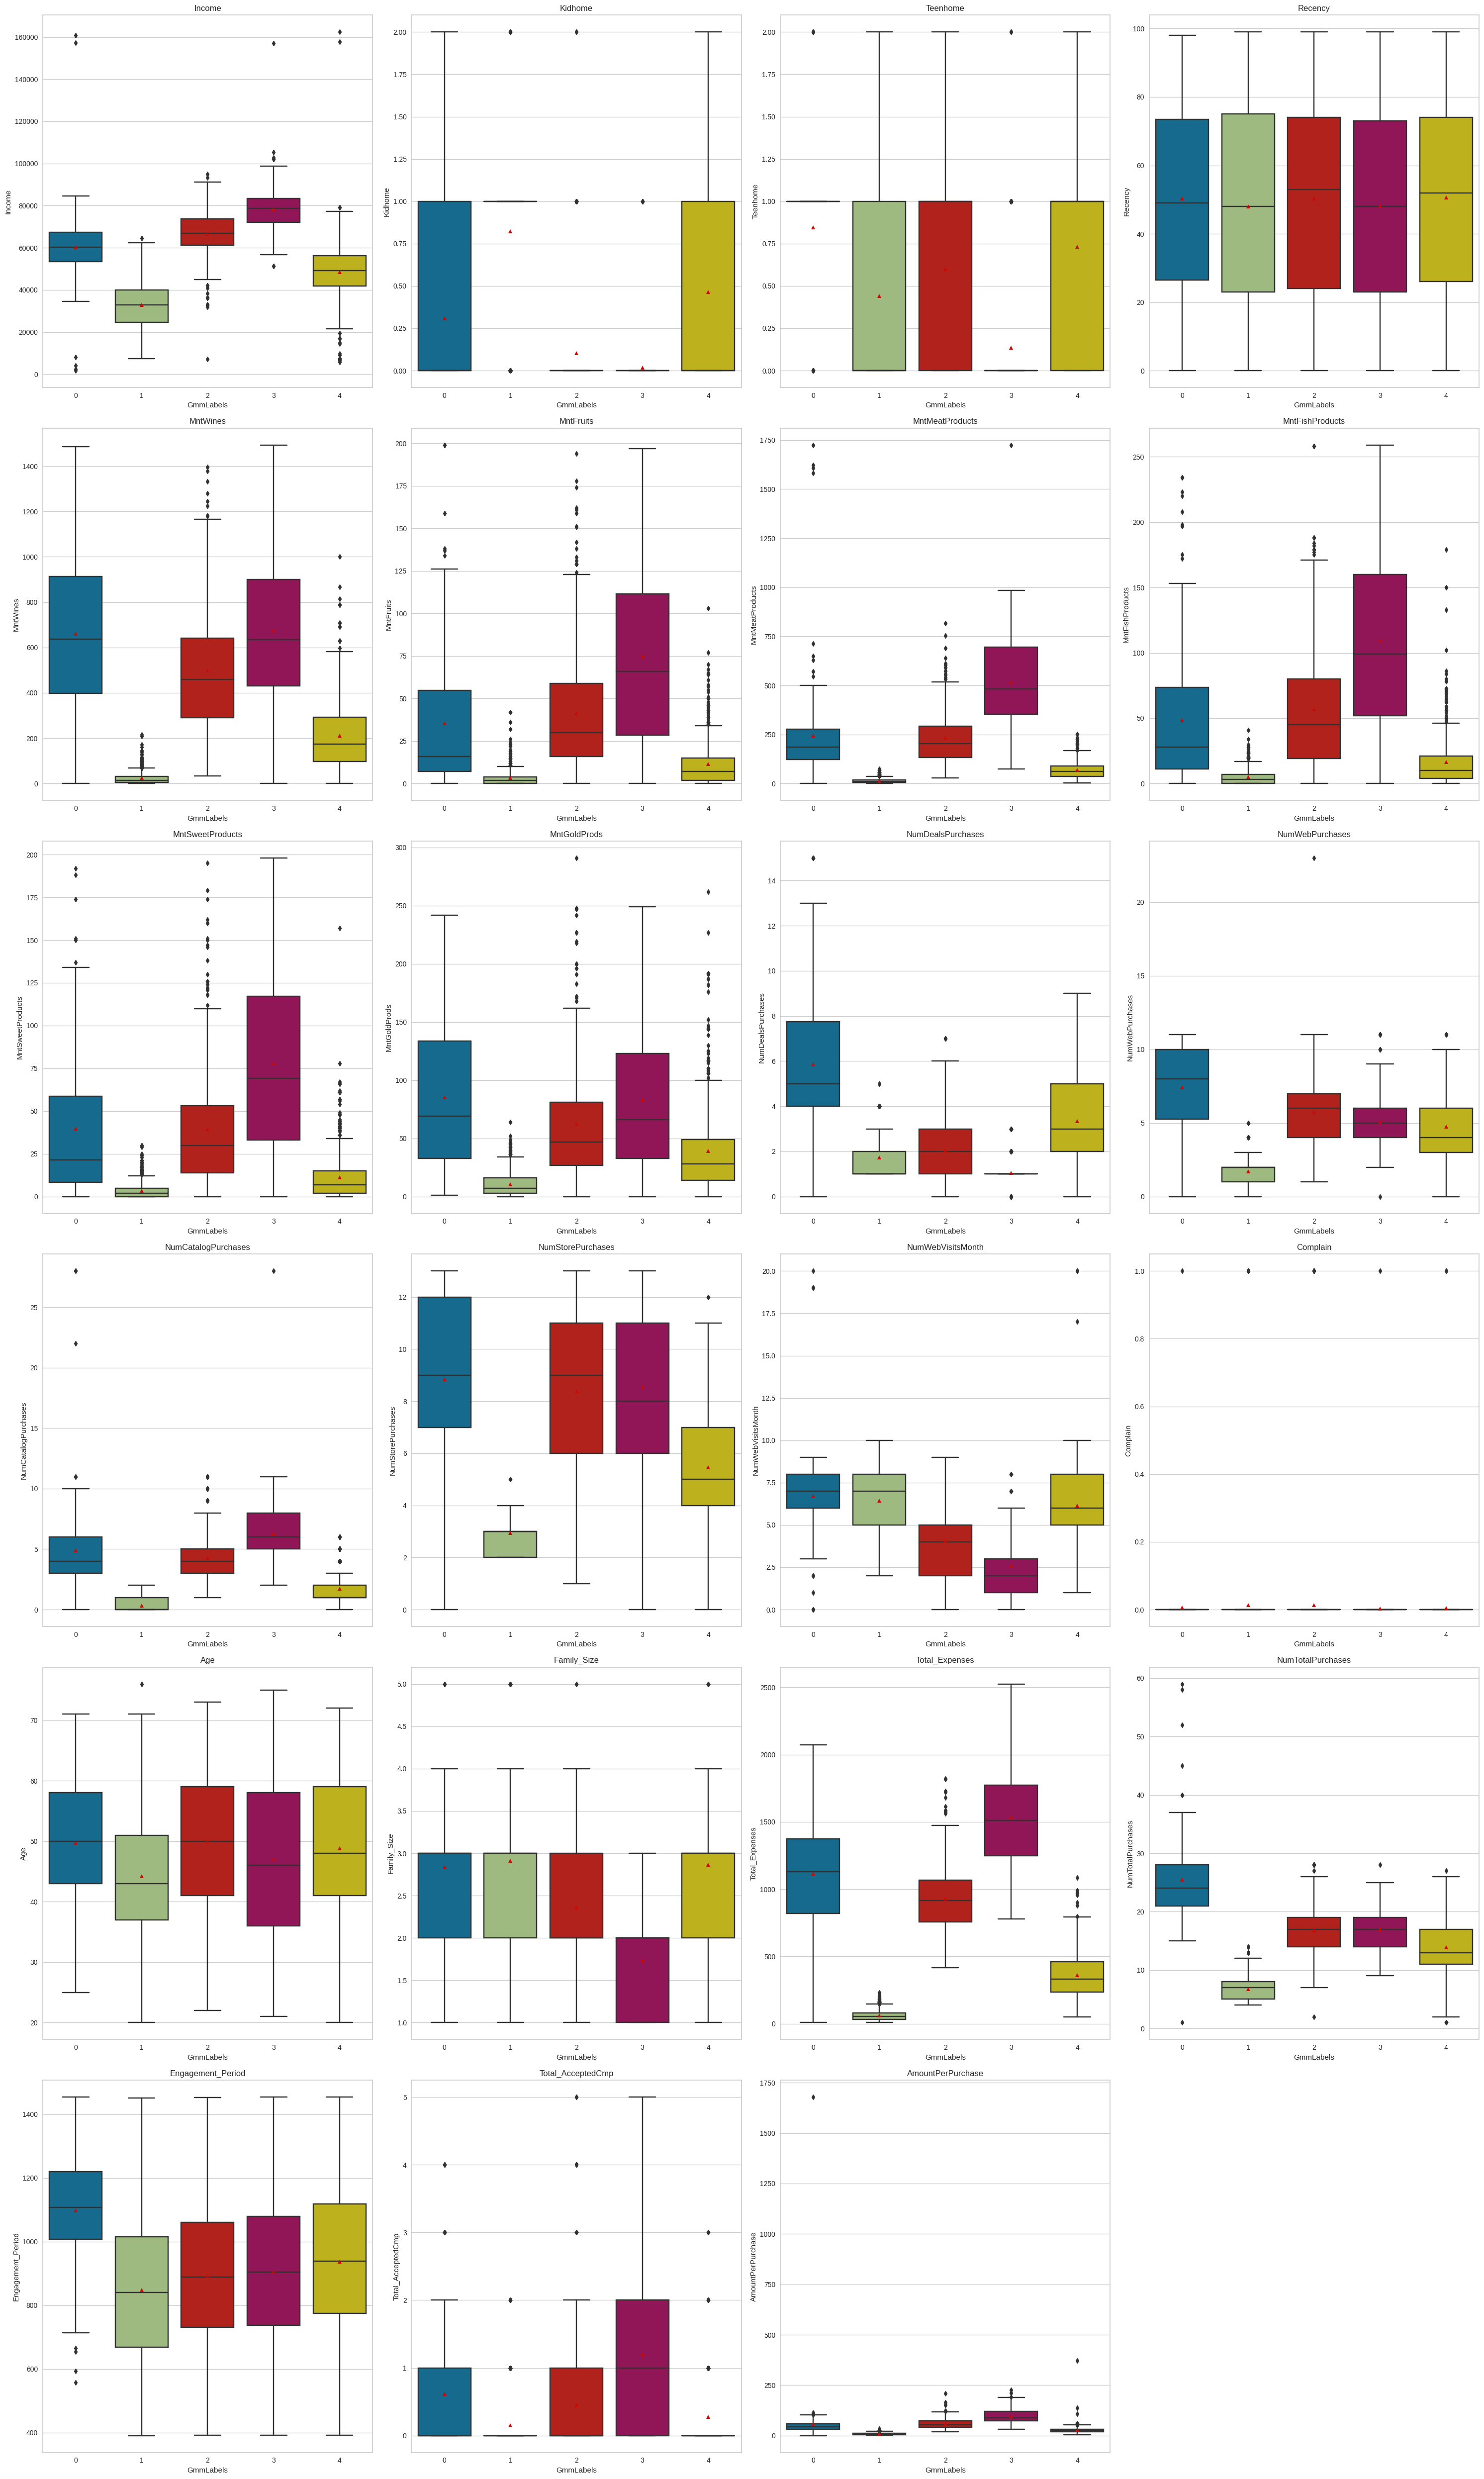

In [ ]:
# Creating boxplot for each of the variables
all_col = col_for_box

plt.figure(figsize = (30, 50))

for i, variable in enumerate(all_col):
    plt.subplot(6, 4, i + 1)

    sns.boxplot(y=df[variable], x=df['GmmLabels'],showmeans=True)

    plt.tight_layout()

    plt.title(variable)

plt.show()

### **Characteristics of each cluster**

**Summary of each cluster:**

*   Cluster 0 utilizes the **most discounts**. They have the **second highest expenses and the highest number of total purchases**. They have the longest engagement period as well. They perfer to shop in store. They buy the most wine and also tie closesly with Cluster 3 for the most gold products bought.
*   Cluster 1 is the **lowest income** bracket and **spend the least.**
*   Cluster 2 is the **second highest income.**
*   Cluster 3 is the **highest income** bracket and **spend the most across all products except for wine.** They have the least amount of kids. This cluster has responded the most to offers and prefer to buy in catalog.
*   Cluster 4 is the **second lowest income.** They are the second highest utilizers of discounts and make the most web visits.

## **Conclusion and Recommendations**

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success)**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

KMeans (with K-5 clustering albeit with some outliers), KMedoids, and the Gaussian models performed the best. KMeans (K = 3) and hierarchical clustering produced similar results. DBSCAN produced the least conclusive results however given more time, we would have to experiment with different eps or min sample values to see if DBSCAN could produce a better distribution of cluster profiles.

**2. Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?

Currently, there is a low response rate and **very low acceptance on the existing marketing campaigns** so the company can definitely benefit from some analysis and a revised strategy. No customers seem to be complaining but it's always in the company's best interest to provide the best customer experience and offer products the customer wants and needs at the best prices.

In most of the models, we saw a distinction between the **highest and lowest income groups. The highest income groups were, not surprinsgly, the ones with the biggest expenses across most products.** They were typically the smallest in terms of family size indicating no kids and potentially single. They were also more likely to be of a higher education level. **Given their indispensible income, they utilized the least amount of discounts.** The company could differentiate how they sell certain proucts as well. E.g., you could sell more organic fruits, imported wines, grass-fed beef, etc. to the higher income brackets. They may not use the discounts but they could be persuaded to buy new and interesting products, particularly with in-store ads or catalog campaigns.

We found that the **lowest income group was usually the youngest in age which makes sense. They tend to buy online and utilize more discounts than those with a higher income. Knowing that they shopped more online, campaigns could be targeted there rather than with in store ads.** They also seemed to have more kids but it's inconclusive to say that contributed to what/if they were purchasing products.


**3. Proposal for the final solution design:**
- What model do you propose to be adopted? Why is this the best solution to adopt?

KMedoids would be the best model to adopt and refine further as it has more extreme clusters that are more distinct from one another. This gave the most granular results with nuances into age brackets and the types of products the clusters were purchasing more often. KMeans (K=5) also gave interesting results but is more sensitive to outliers and does not allow us to dive into categorical data.


